# AUC Ranking for inputs
### Raw, Noise, FGSM in comparison

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep

import coffea.hist as hist

import time
import random
import gc

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [4]:
NUM_DATASETS = 49

In [5]:
mini = [2*i for i in range(32)] + ['64']
maxi = [2*i +1 for i in range(32)] + ['66']

In [6]:
def plot_ranking(df,mode,param=None):
    f, ax = plt.subplots(figsize=(24, 32))
    #hep.cms.label(loc=0)

    ax.barh(df['input_name'], df['auc_bvl'], alpha=0.5, label='b vs light')
    ax.barh(df['input_name'], df['auc_bvc'], alpha=0.5, label='b vs c')
    ax.set_xlim(left=0,right=1)
    ax.set_xbound(lower=0,upper=1)
    #ax.set_aspect('auto')
    plt.legend()
    plt.xlabel('AUC')
    plt.ylabel('deepCSV input')
    
    if mode == 'raw':
        plt.title(f'AUC ranking (raw)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_PARAM_0.0.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'noise':
        plt.title(f'AUC ranking (Noise with $\sigma={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'FGSM':
        plt.title(f'AUC ranking (FGSM with $\epsilon={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_fgsm_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    
    plt.show()

In [7]:
def plot_sorted(sorted_df,mode,sort,param=None):
    f, ax = plt.subplots(figsize=(20, 20))

    ax.barh(sorted_df['input_name'][-20:], sorted_df['auc_bvl'][-20:], alpha=0.5, label='b vs light')
    ax.barh(sorted_df['input_name'][-20:], sorted_df['auc_bvc'][-20:], alpha=0.5, label='b vs c')
    ax.set_xlim(left=0,right=1)
    plt.legend()
    plt.xlabel('AUC')
    plt.ylabel('deepCSV input')
    
    if mode == 'raw':
        plt.title(f'AUC ranking (raw)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_SORT_{sort}_PARAM_0.0.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'noise':
        plt.title(f'AUC ranking (Noise with $\sigma={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_noise_SORT_{sort}_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'FGSM':
        plt.title(f'AUC ranking (FGSM with $\epsilon={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_fgsm_SORT_{sort}_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    
    plt.show()

In [9]:
df_raw = pd.concat([pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_PARAM_0.0_PARALLELTEST_v2_{mini[k]}_to_{maxi[k]}.pkl') for k in range(len(mini))], ignore_index=True, sort=False)

In [10]:
df_raw

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501539  0.500260
1                   Jet $p_T$  0.692864  0.587898
2      Flight Distance 2D Sig  0.857469  0.757580
3      Flight Distance 2D Val  0.847413  0.727910
4      Flight Distance 3D Sig  0.857558  0.757824
..                        ...       ...       ...
62                Vertex Mass  0.862591  0.751961
63   Jet N Secondary Vertices  0.833707  0.699847
64      Jet N Selected Tracks  0.688868  0.577620
65  Jet N Tracks $\eta_{rel}$  0.865151  0.748158
66            Vertex N Tracks  0.865151  0.748158

[67 rows x 3 columns]

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


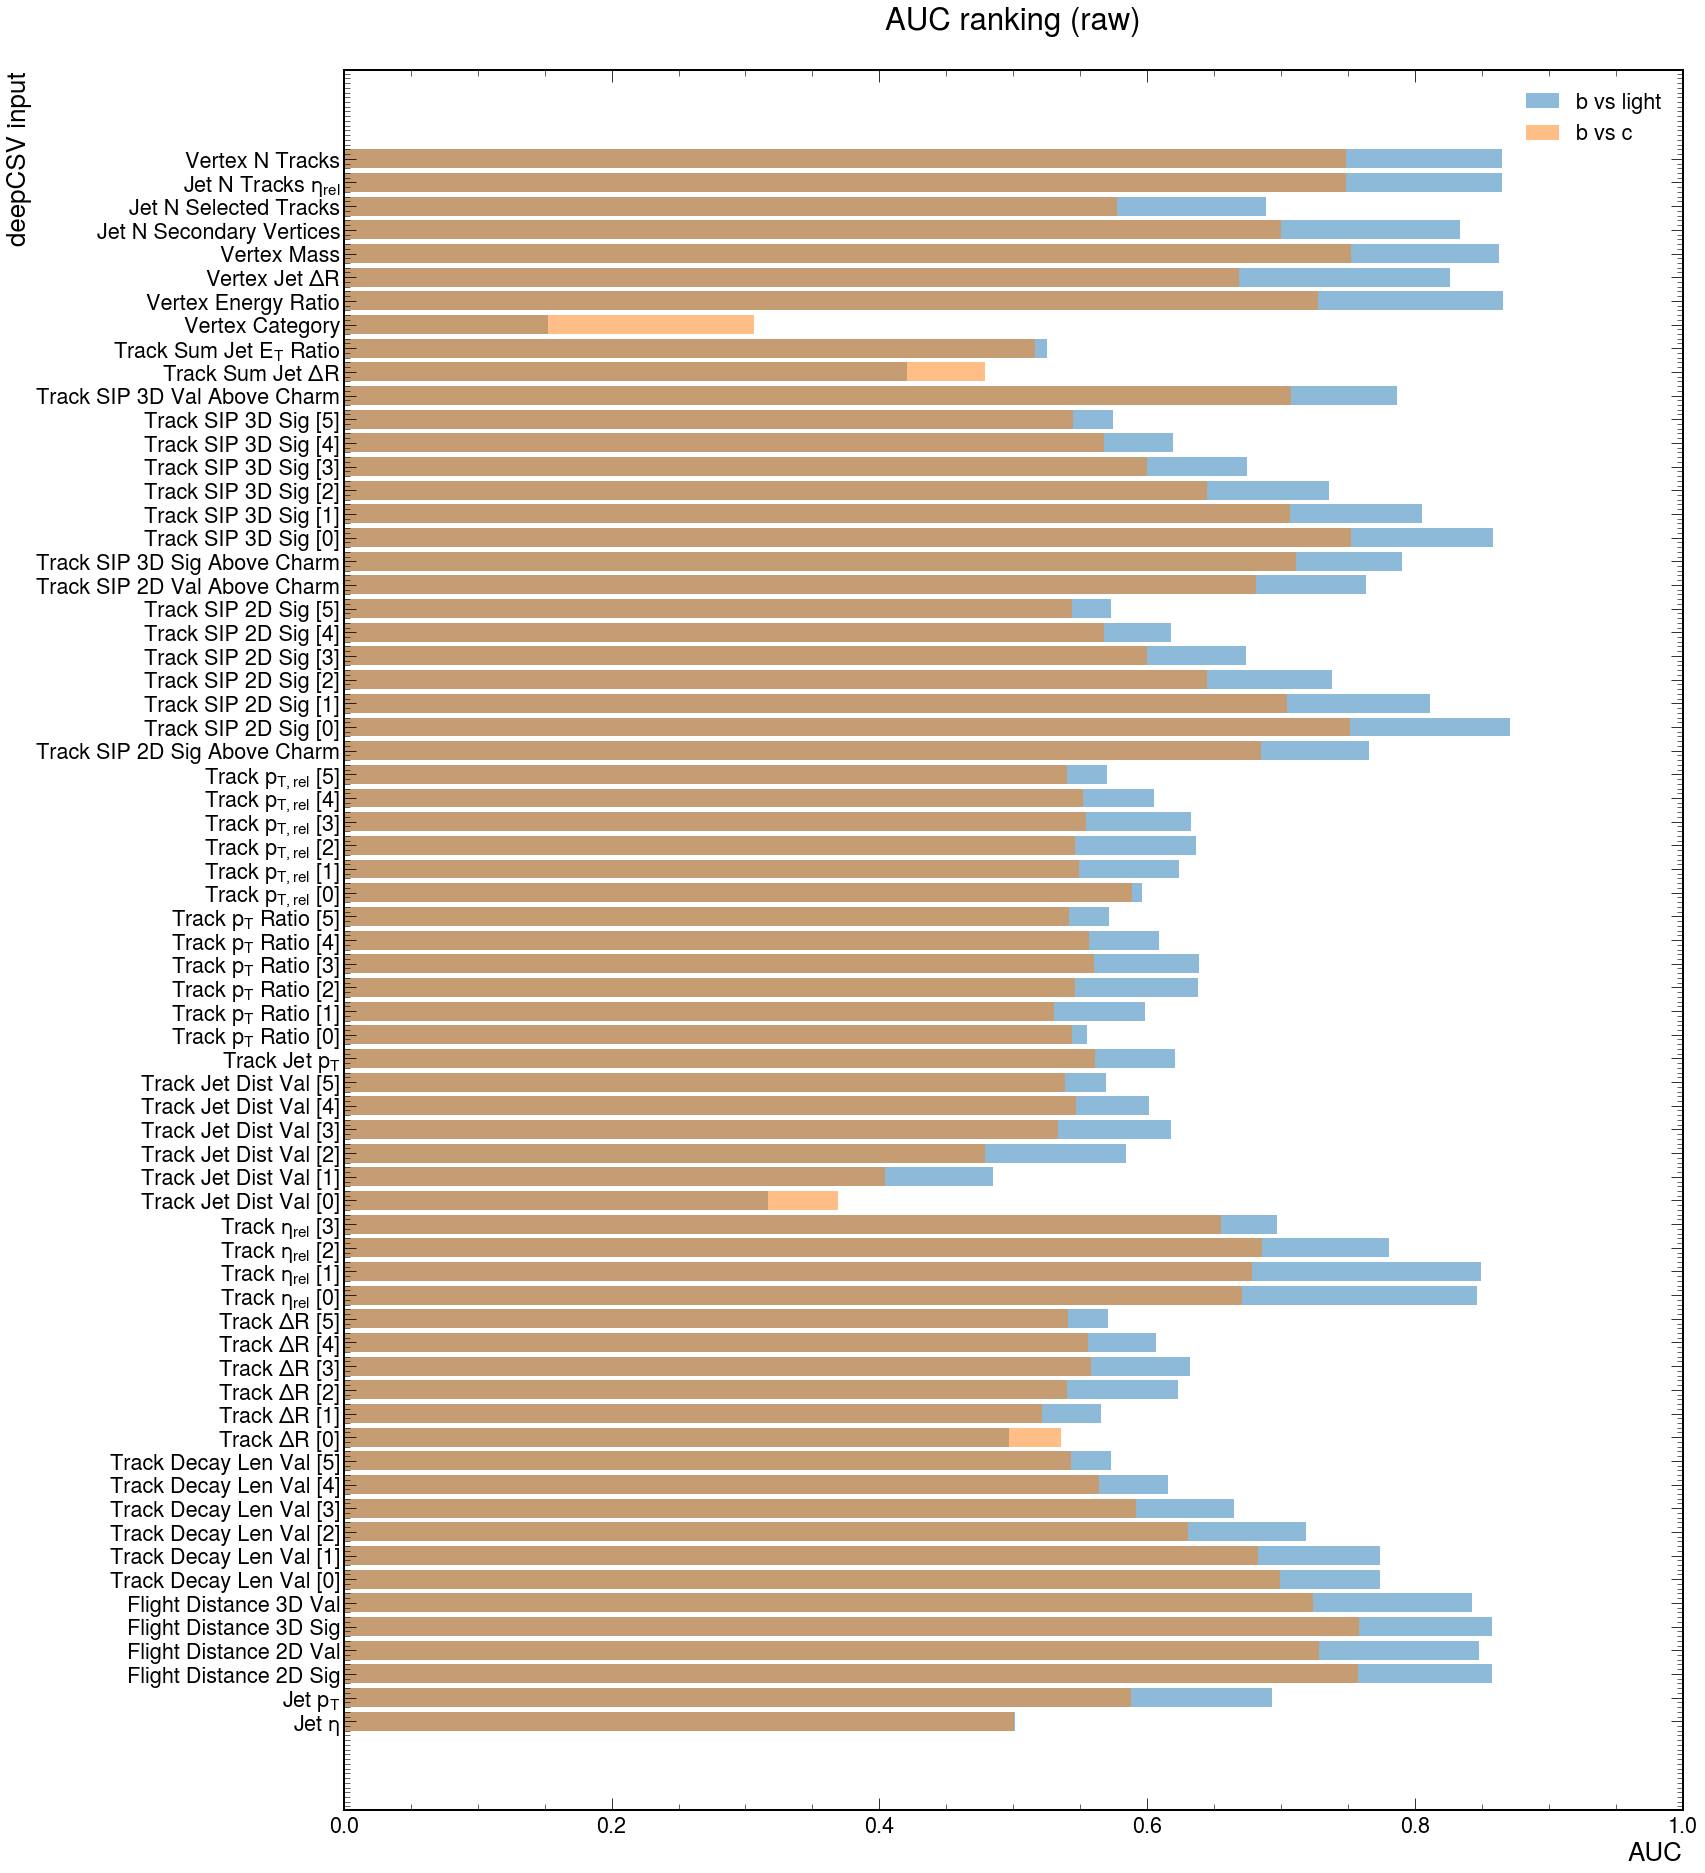

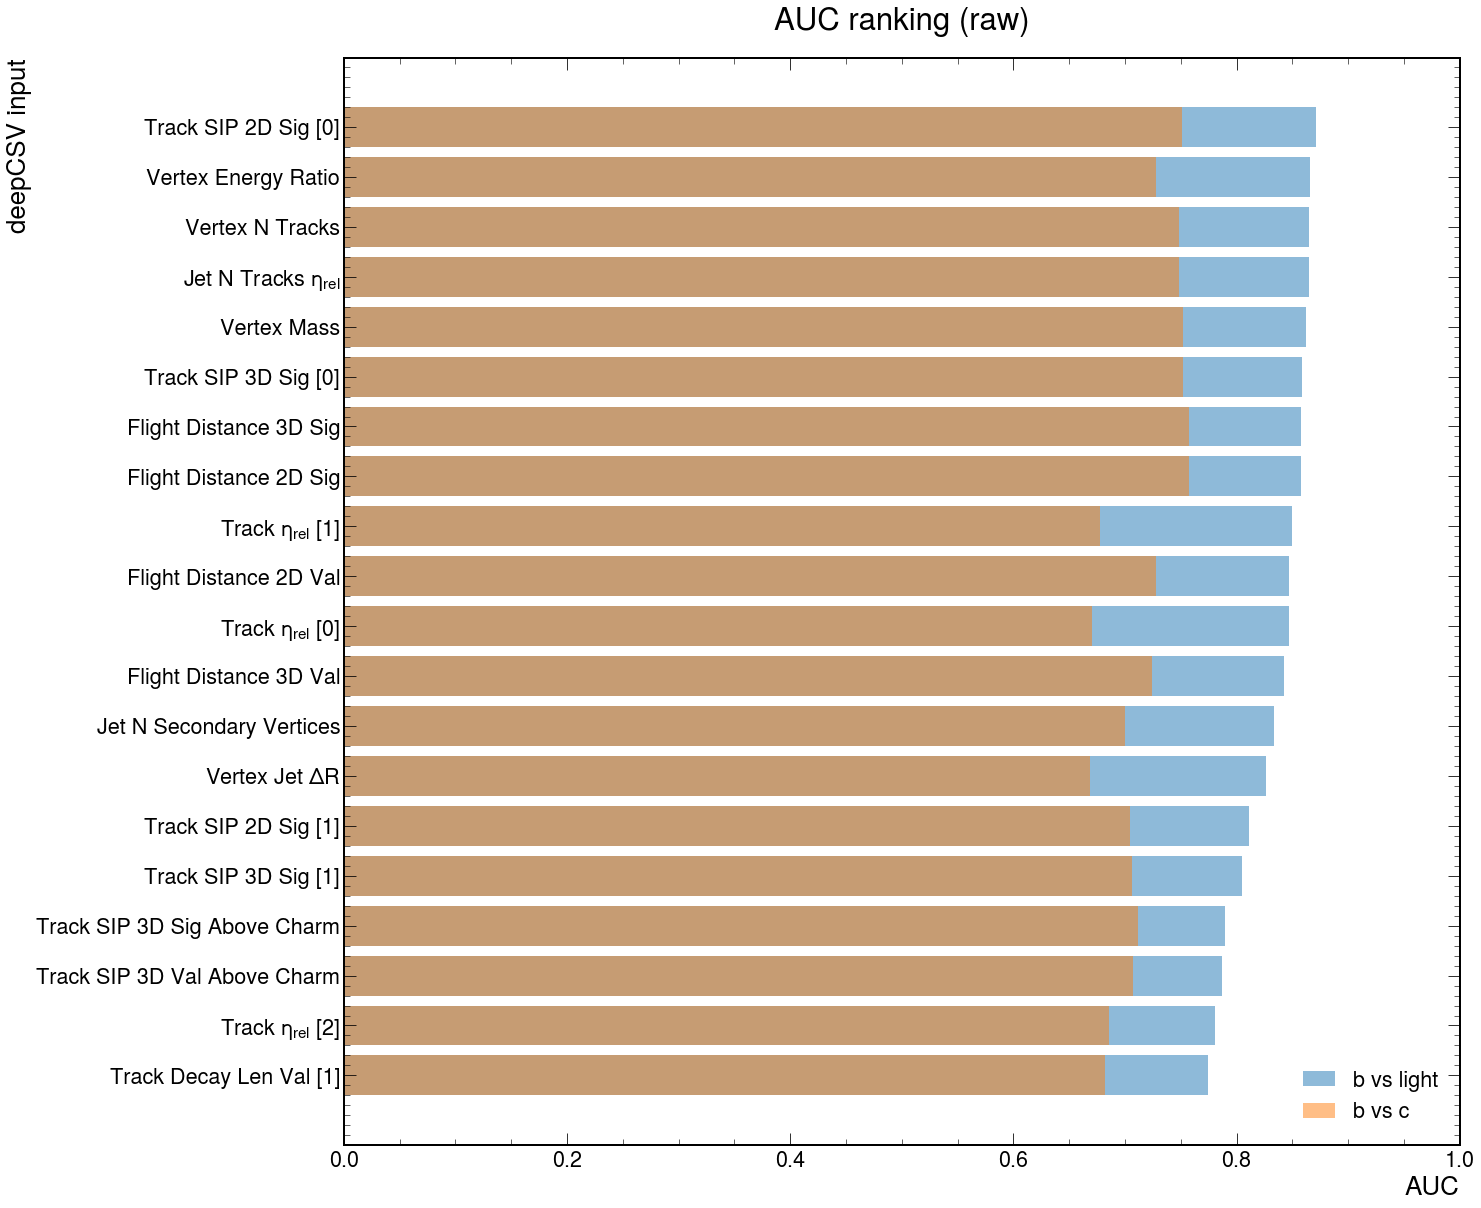

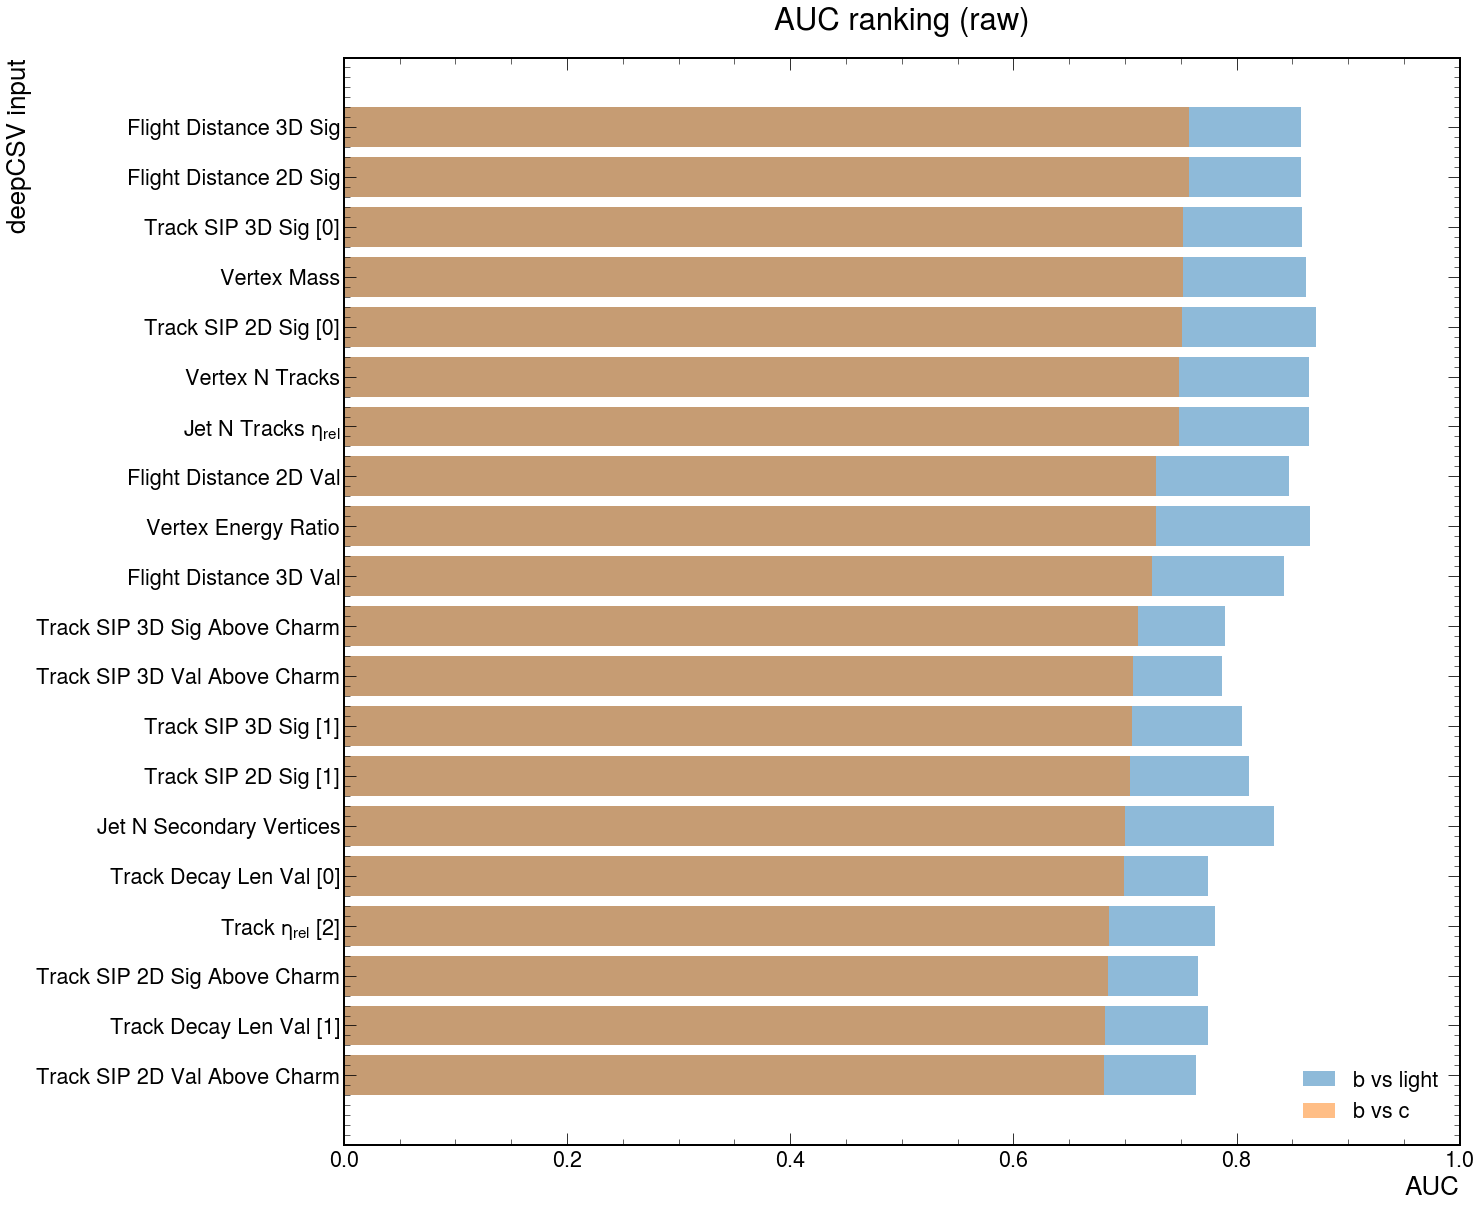

In [11]:
plot_ranking(df_raw,'raw')
plot_sorted(df_raw.sort_values('auc_bvl'),'raw','bvl')
plot_sorted(df_raw.sort_values('auc_bvc'),'raw','bvc')

In [12]:
dfs_noise = {}

In [13]:
param = [0.005,
         0.01,
         0.05,
         0.1]
for p in param:
    dfs_noise[p] = pd.concat([pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_noise/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_{p}_PARALLELTEST_v2_{mini[k]}_to_{maxi[k]}.pkl') for k in range(len(mini))], ignore_index=True, sort=False)

In [14]:
dfs_noise[0.05]

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501538  0.500261
1                   Jet $p_T$  0.691426  0.587362
2      Flight Distance 2D Sig  0.856098  0.755675
3      Flight Distance 2D Val  0.847121  0.727512
4      Flight Distance 3D Sig  0.856177  0.755904
..                        ...       ...       ...
62                Vertex Mass  0.862187  0.750415
63   Jet N Secondary Vertices  0.833658  0.699819
64      Jet N Selected Tracks  0.688864  0.577624
65  Jet N Tracks $\eta_{rel}$  0.865145  0.748165
66            Vertex N Tracks  0.865145  0.748165

[67 rows x 3 columns]

In [15]:
dfs_fgsm = {}

In [16]:
paramFGSM = [0.005,
         0.01,
         0.05,
         0.1]
for p in paramFGSM:
    dfs_fgsm[p] = pd.concat([pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_TT180/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_FGSM_PARAM_{p}_PARALLELTEST_v2_{mini[k]}_to_{maxi[k]}.pkl') for k in range(len(mini))], ignore_index=True, sort=False)

In [17]:
dfs_fgsm[0.01]

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501476  0.499856
1                   Jet $p_T$  0.693544  0.587514
2      Flight Distance 2D Sig  0.856587  0.755257
3      Flight Distance 2D Val  0.847243  0.728260
4      Flight Distance 3D Sig  0.856983  0.755300
..                        ...       ...       ...
62                Vertex Mass  0.862260  0.749847
63   Jet N Secondary Vertices  0.833658  0.699819
64      Jet N Selected Tracks  0.688864  0.577624
65  Jet N Tracks $\eta_{rel}$  0.865145  0.748165
66            Vertex N Tracks  0.865145  0.748165

[67 rows x 3 columns]

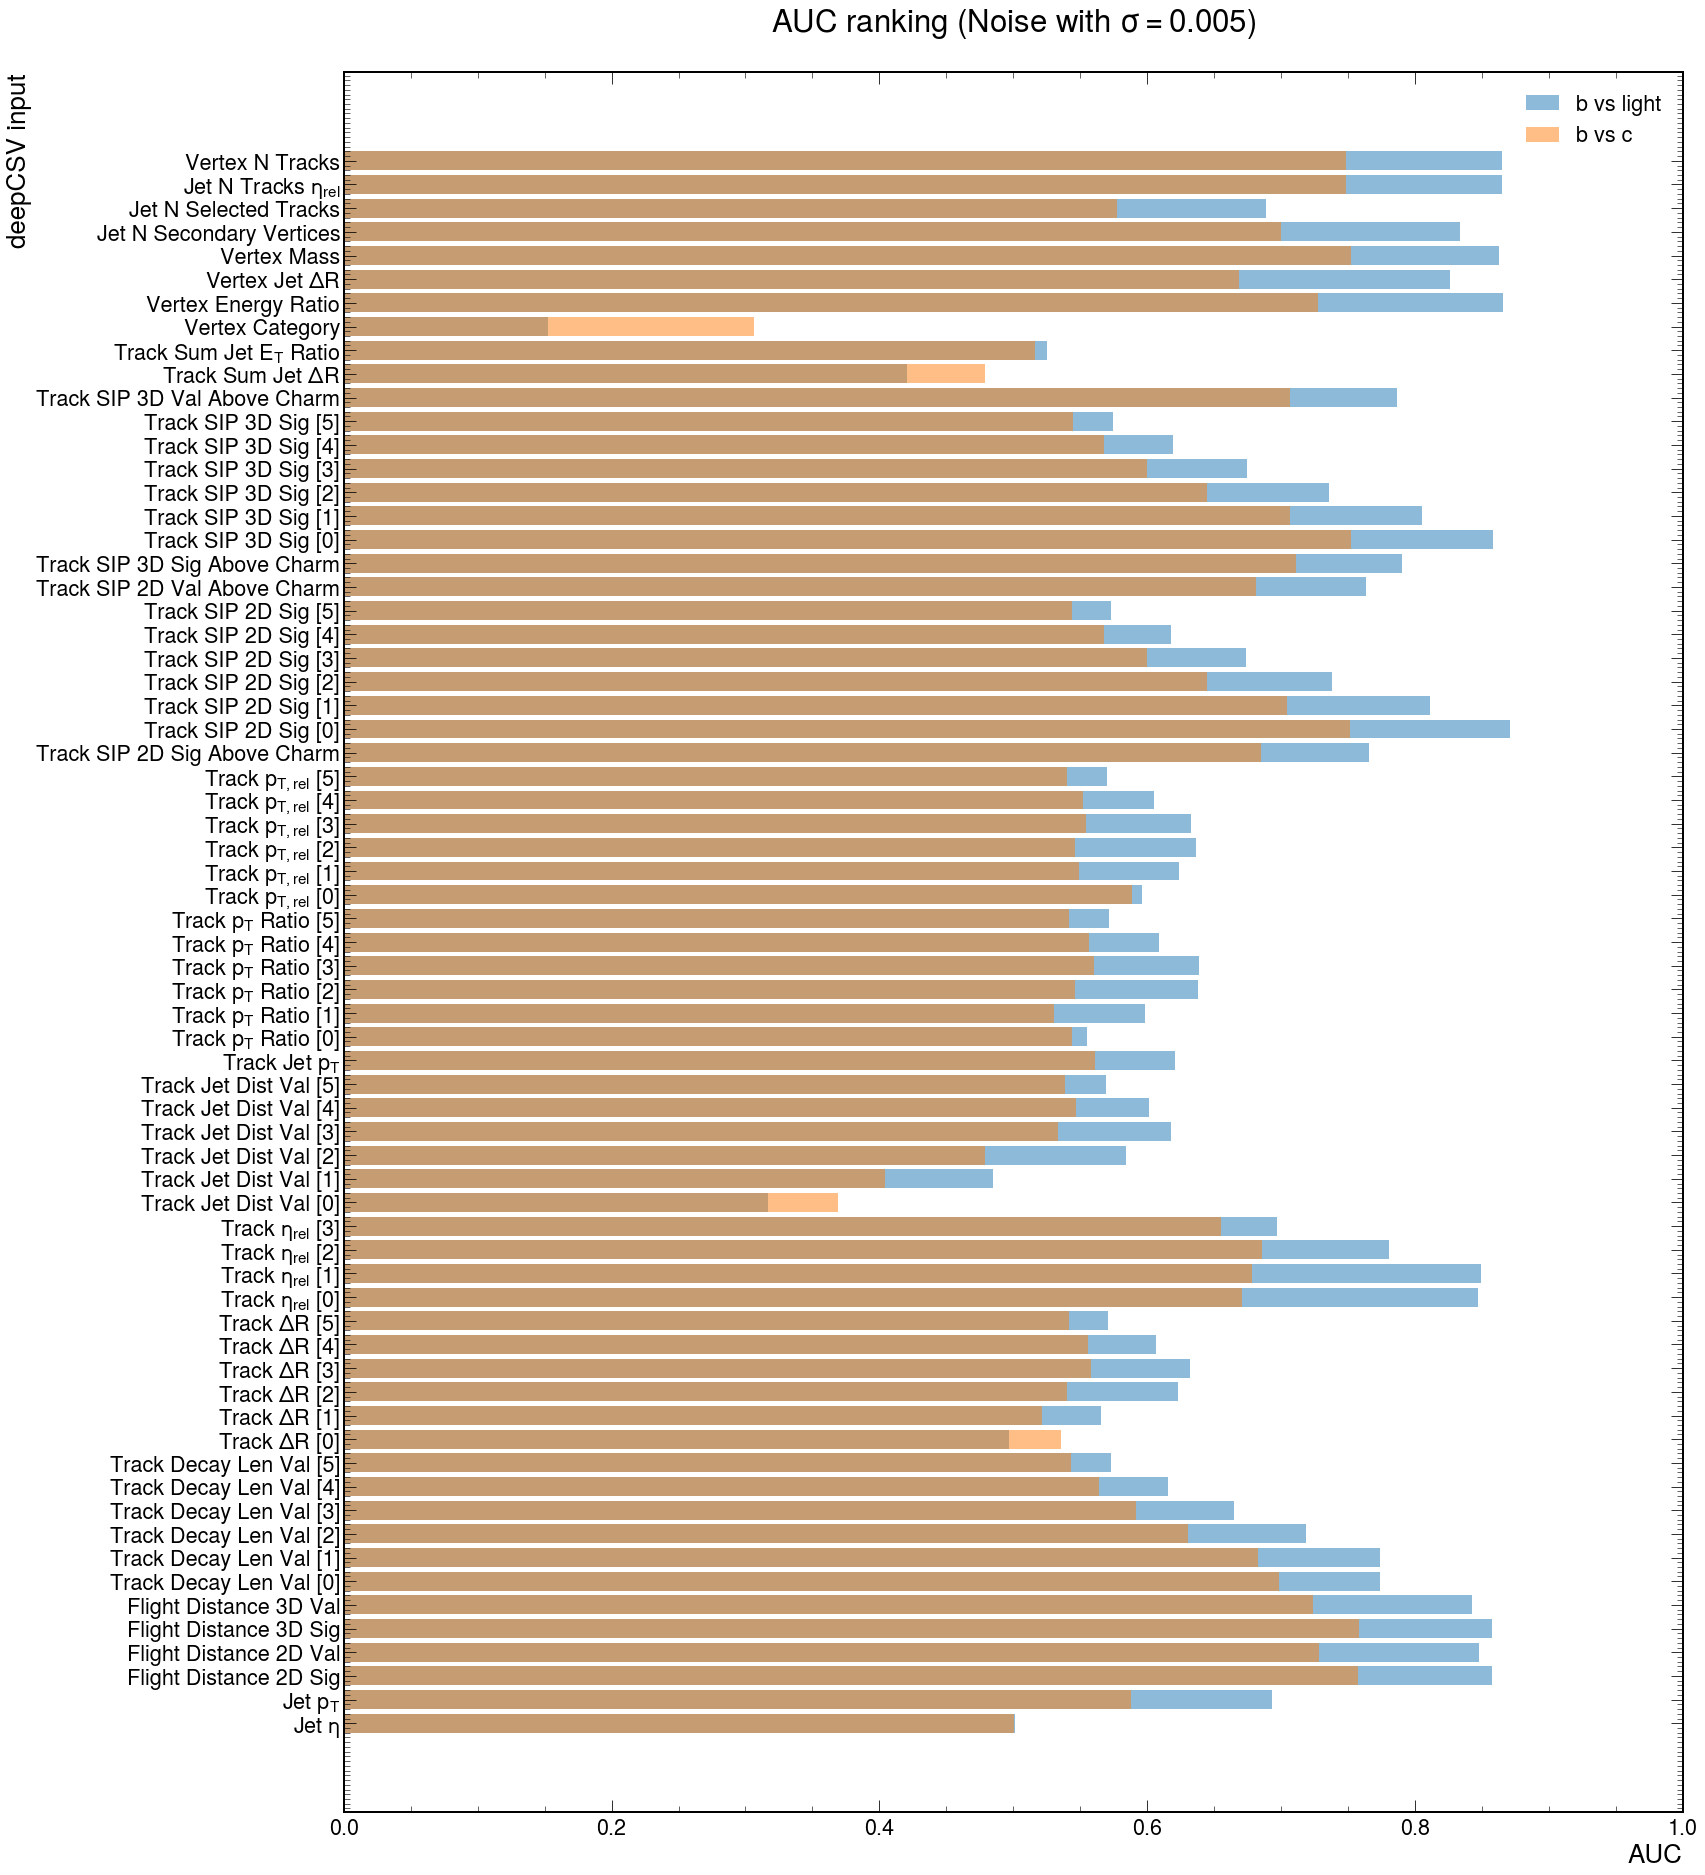

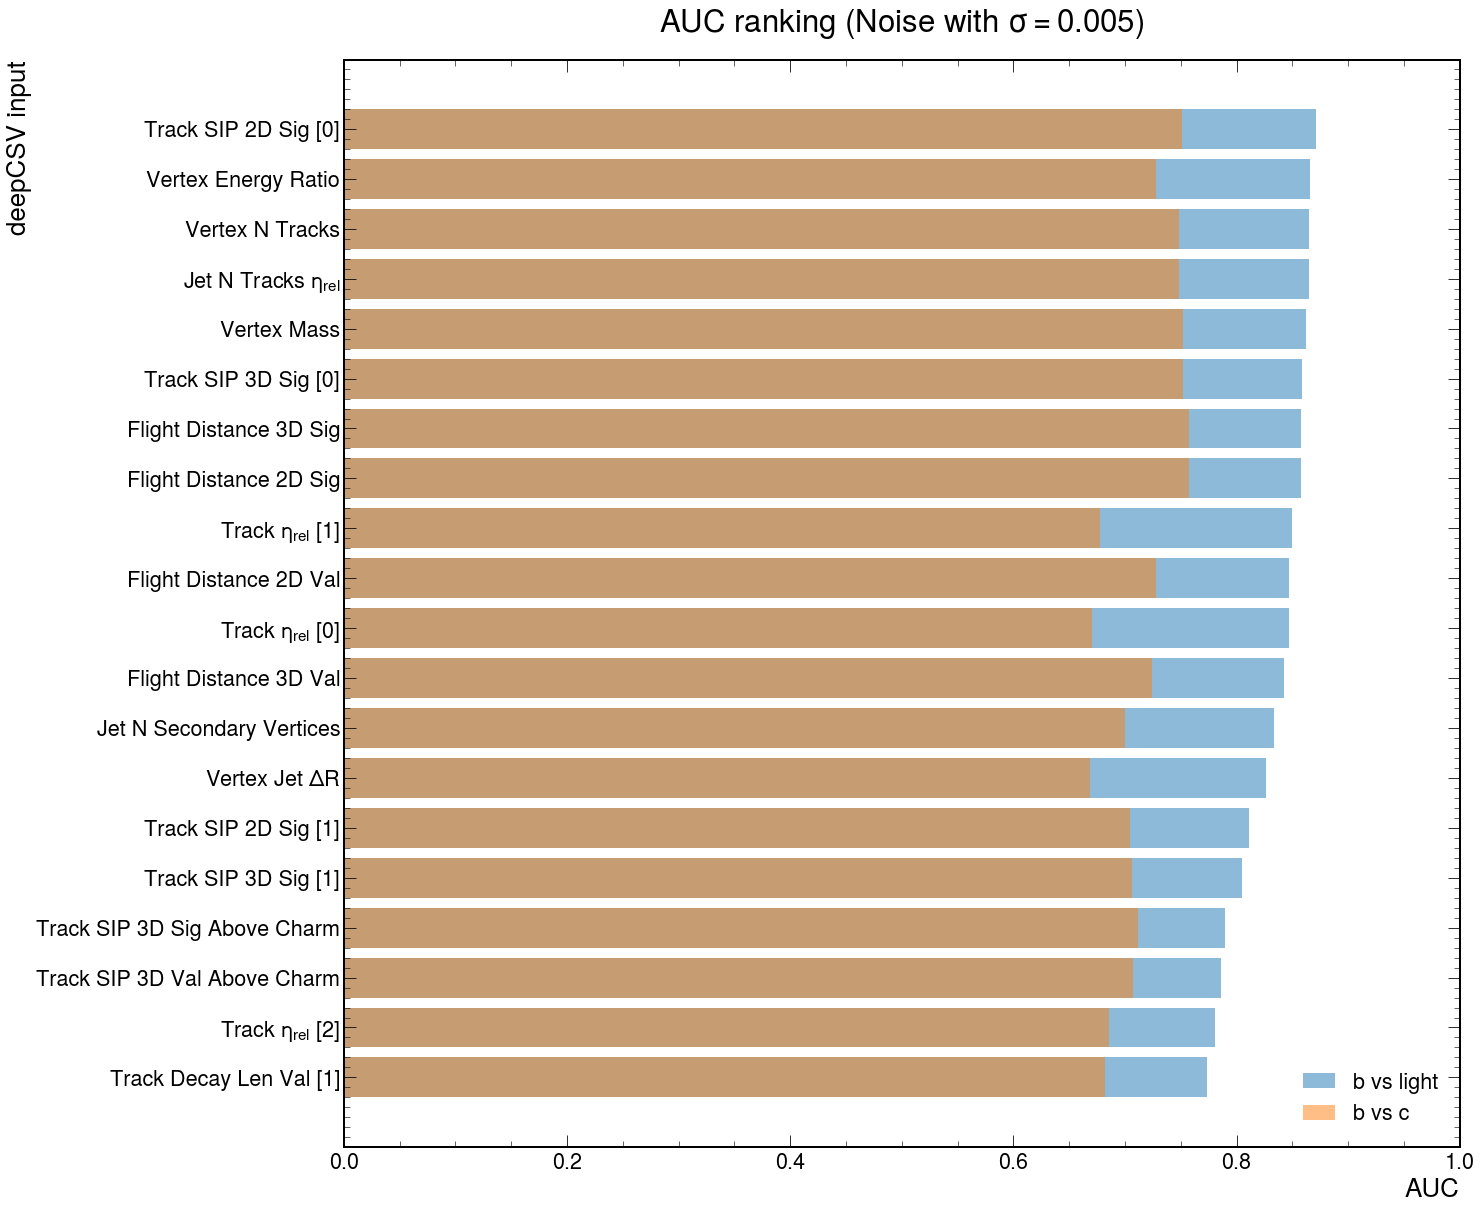

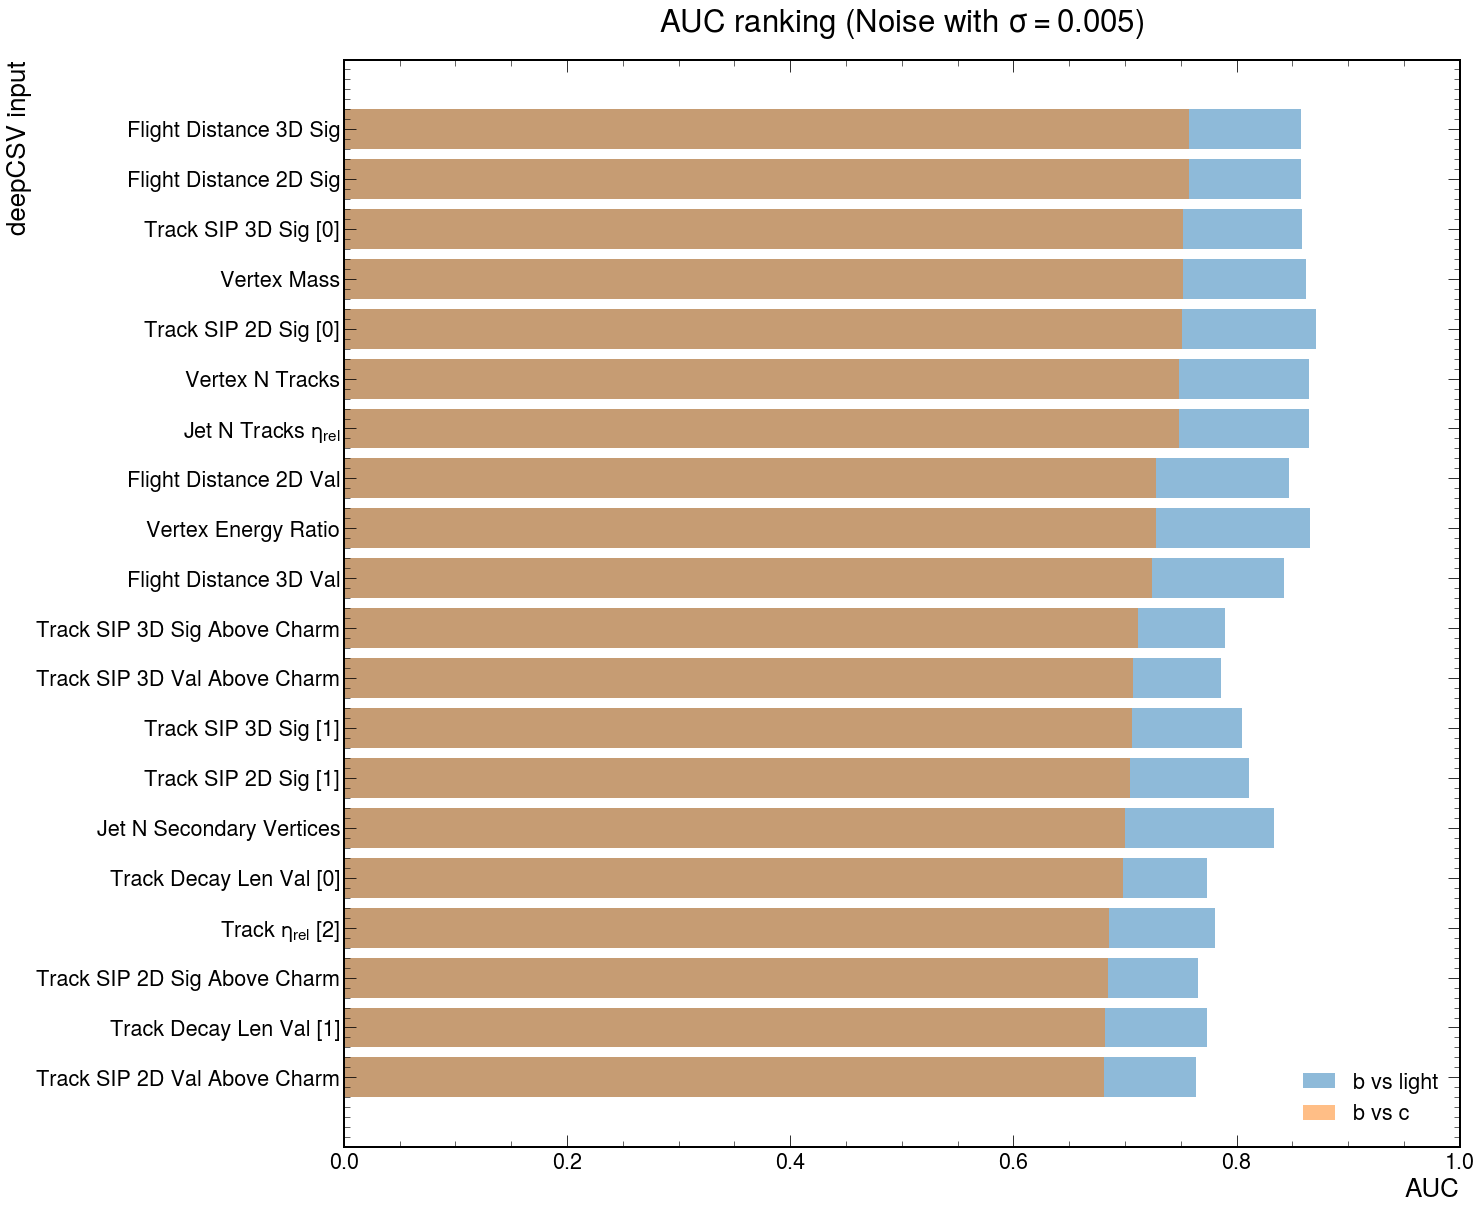

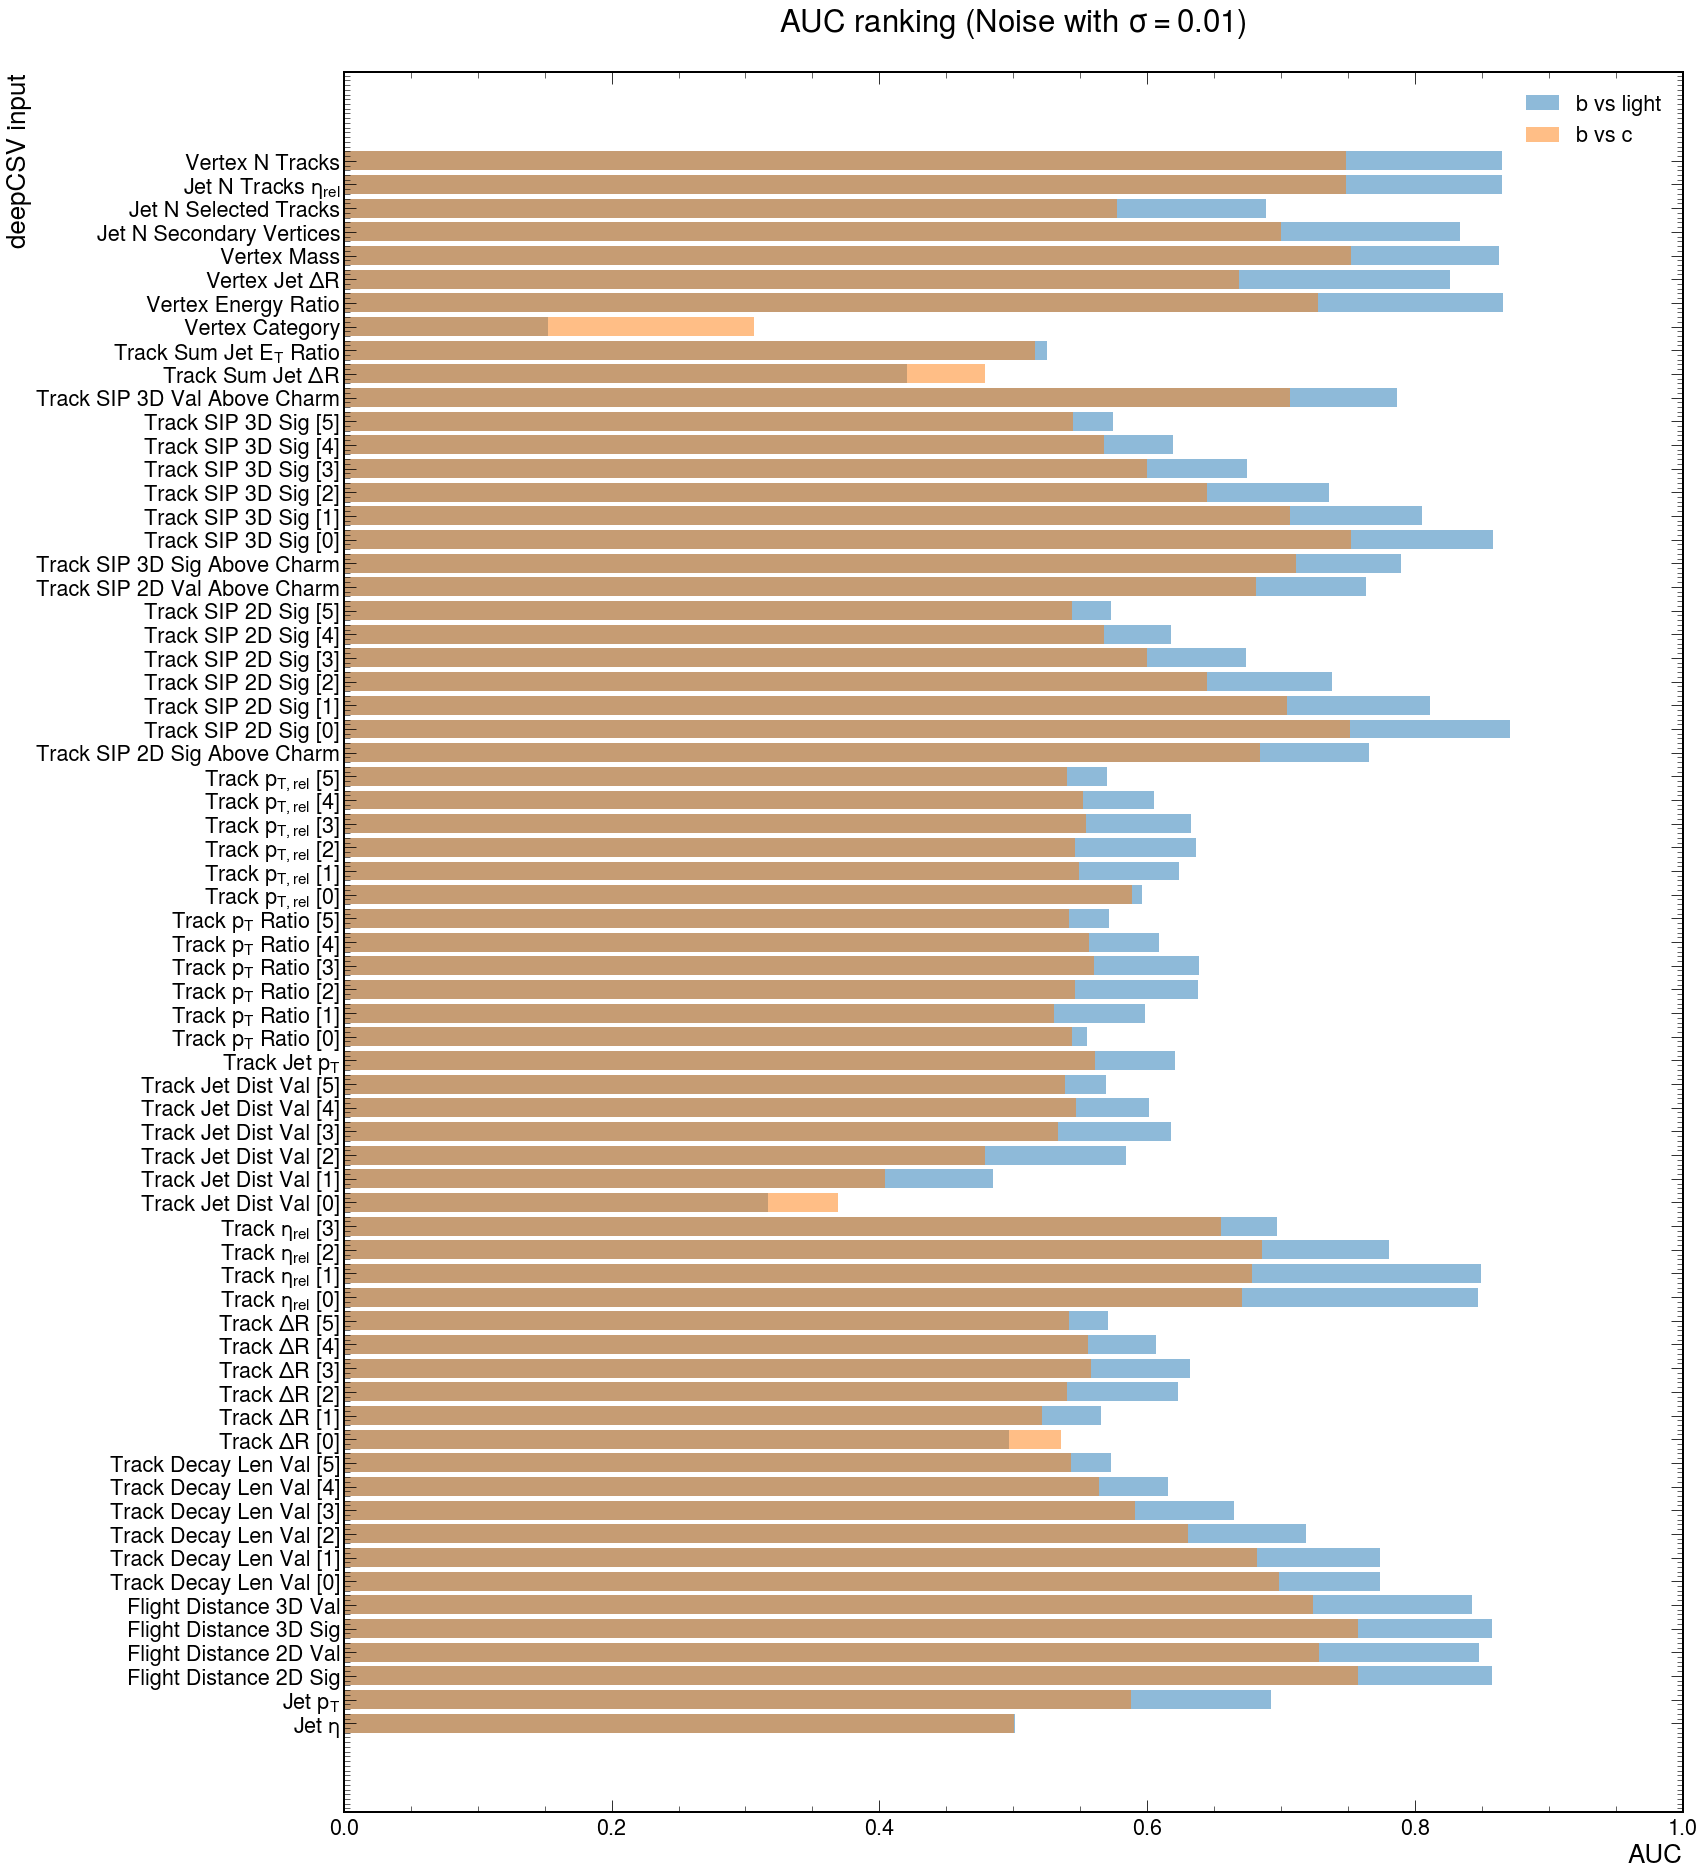

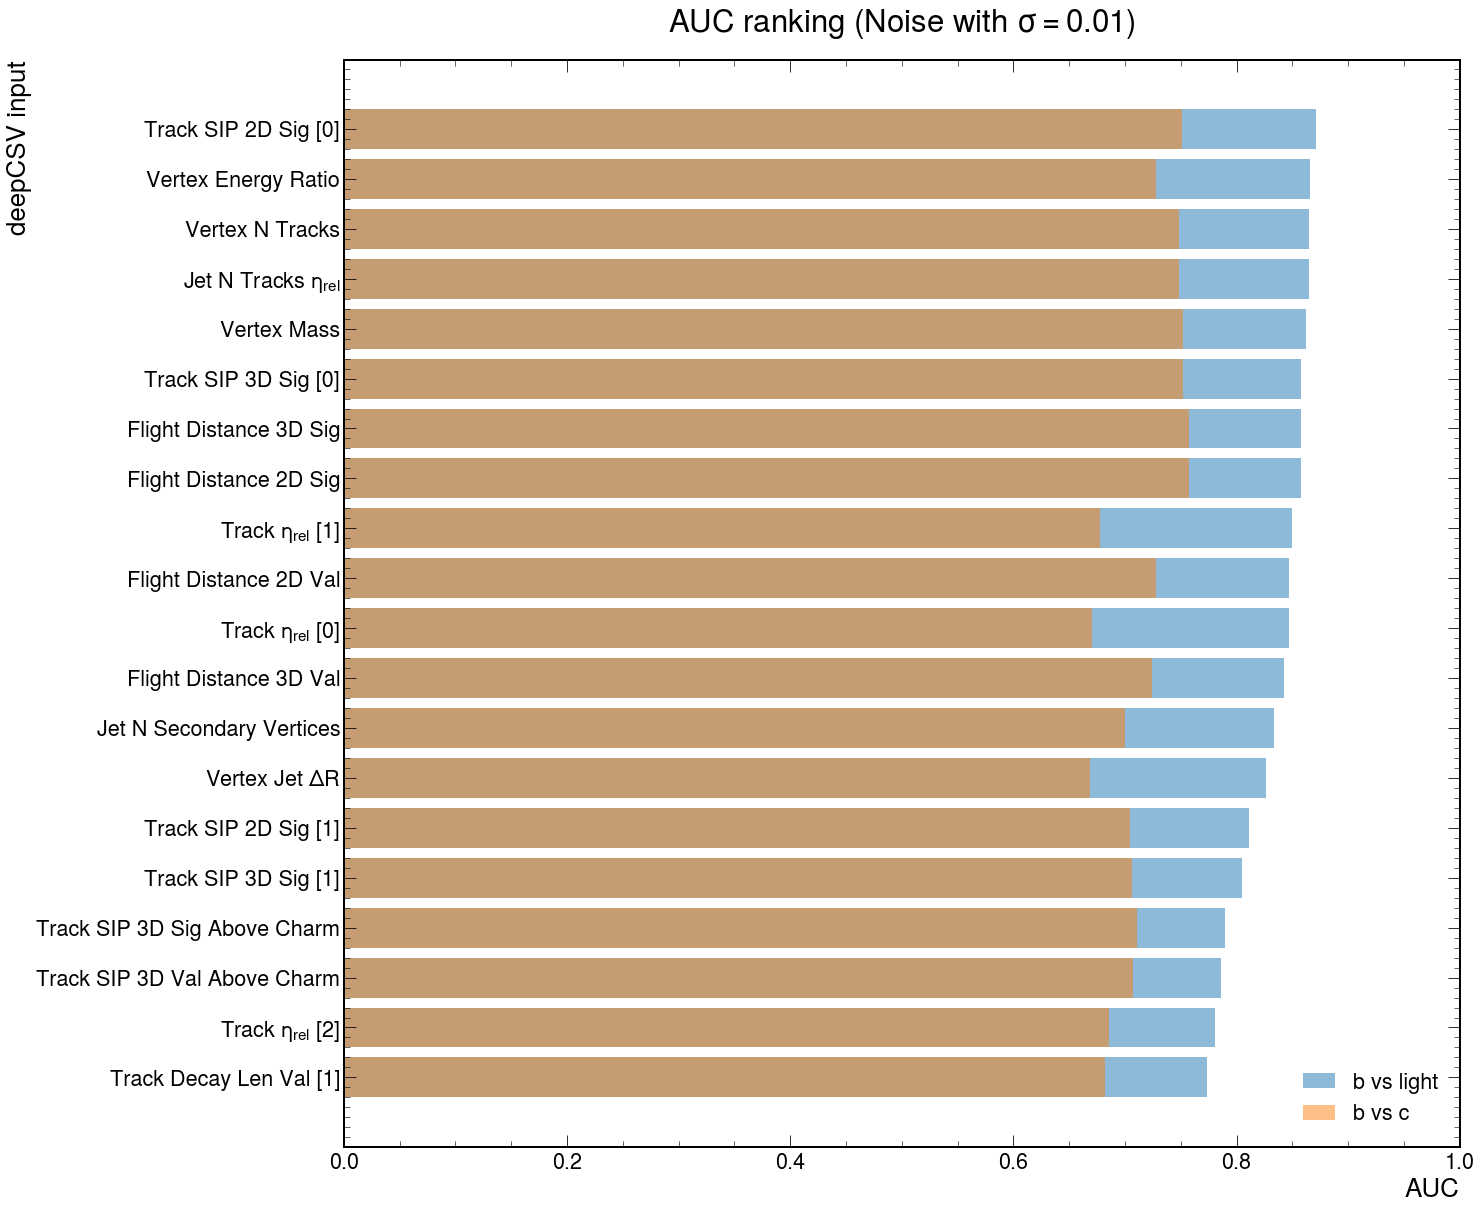

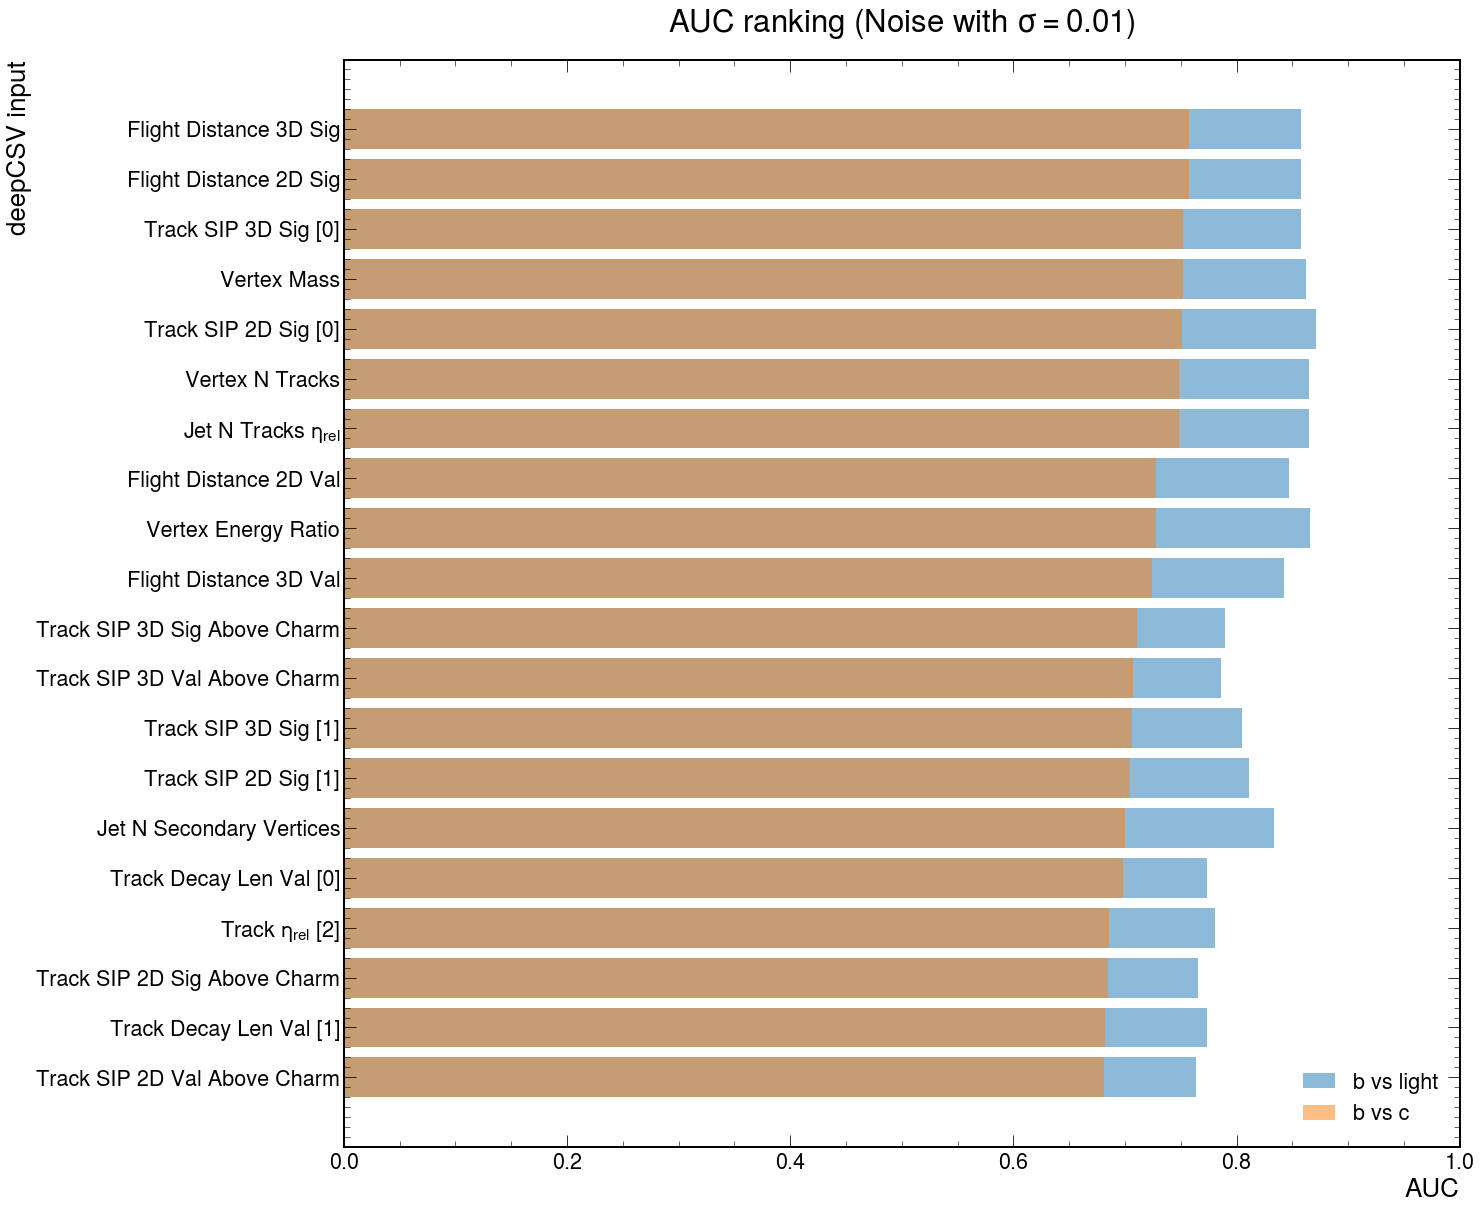

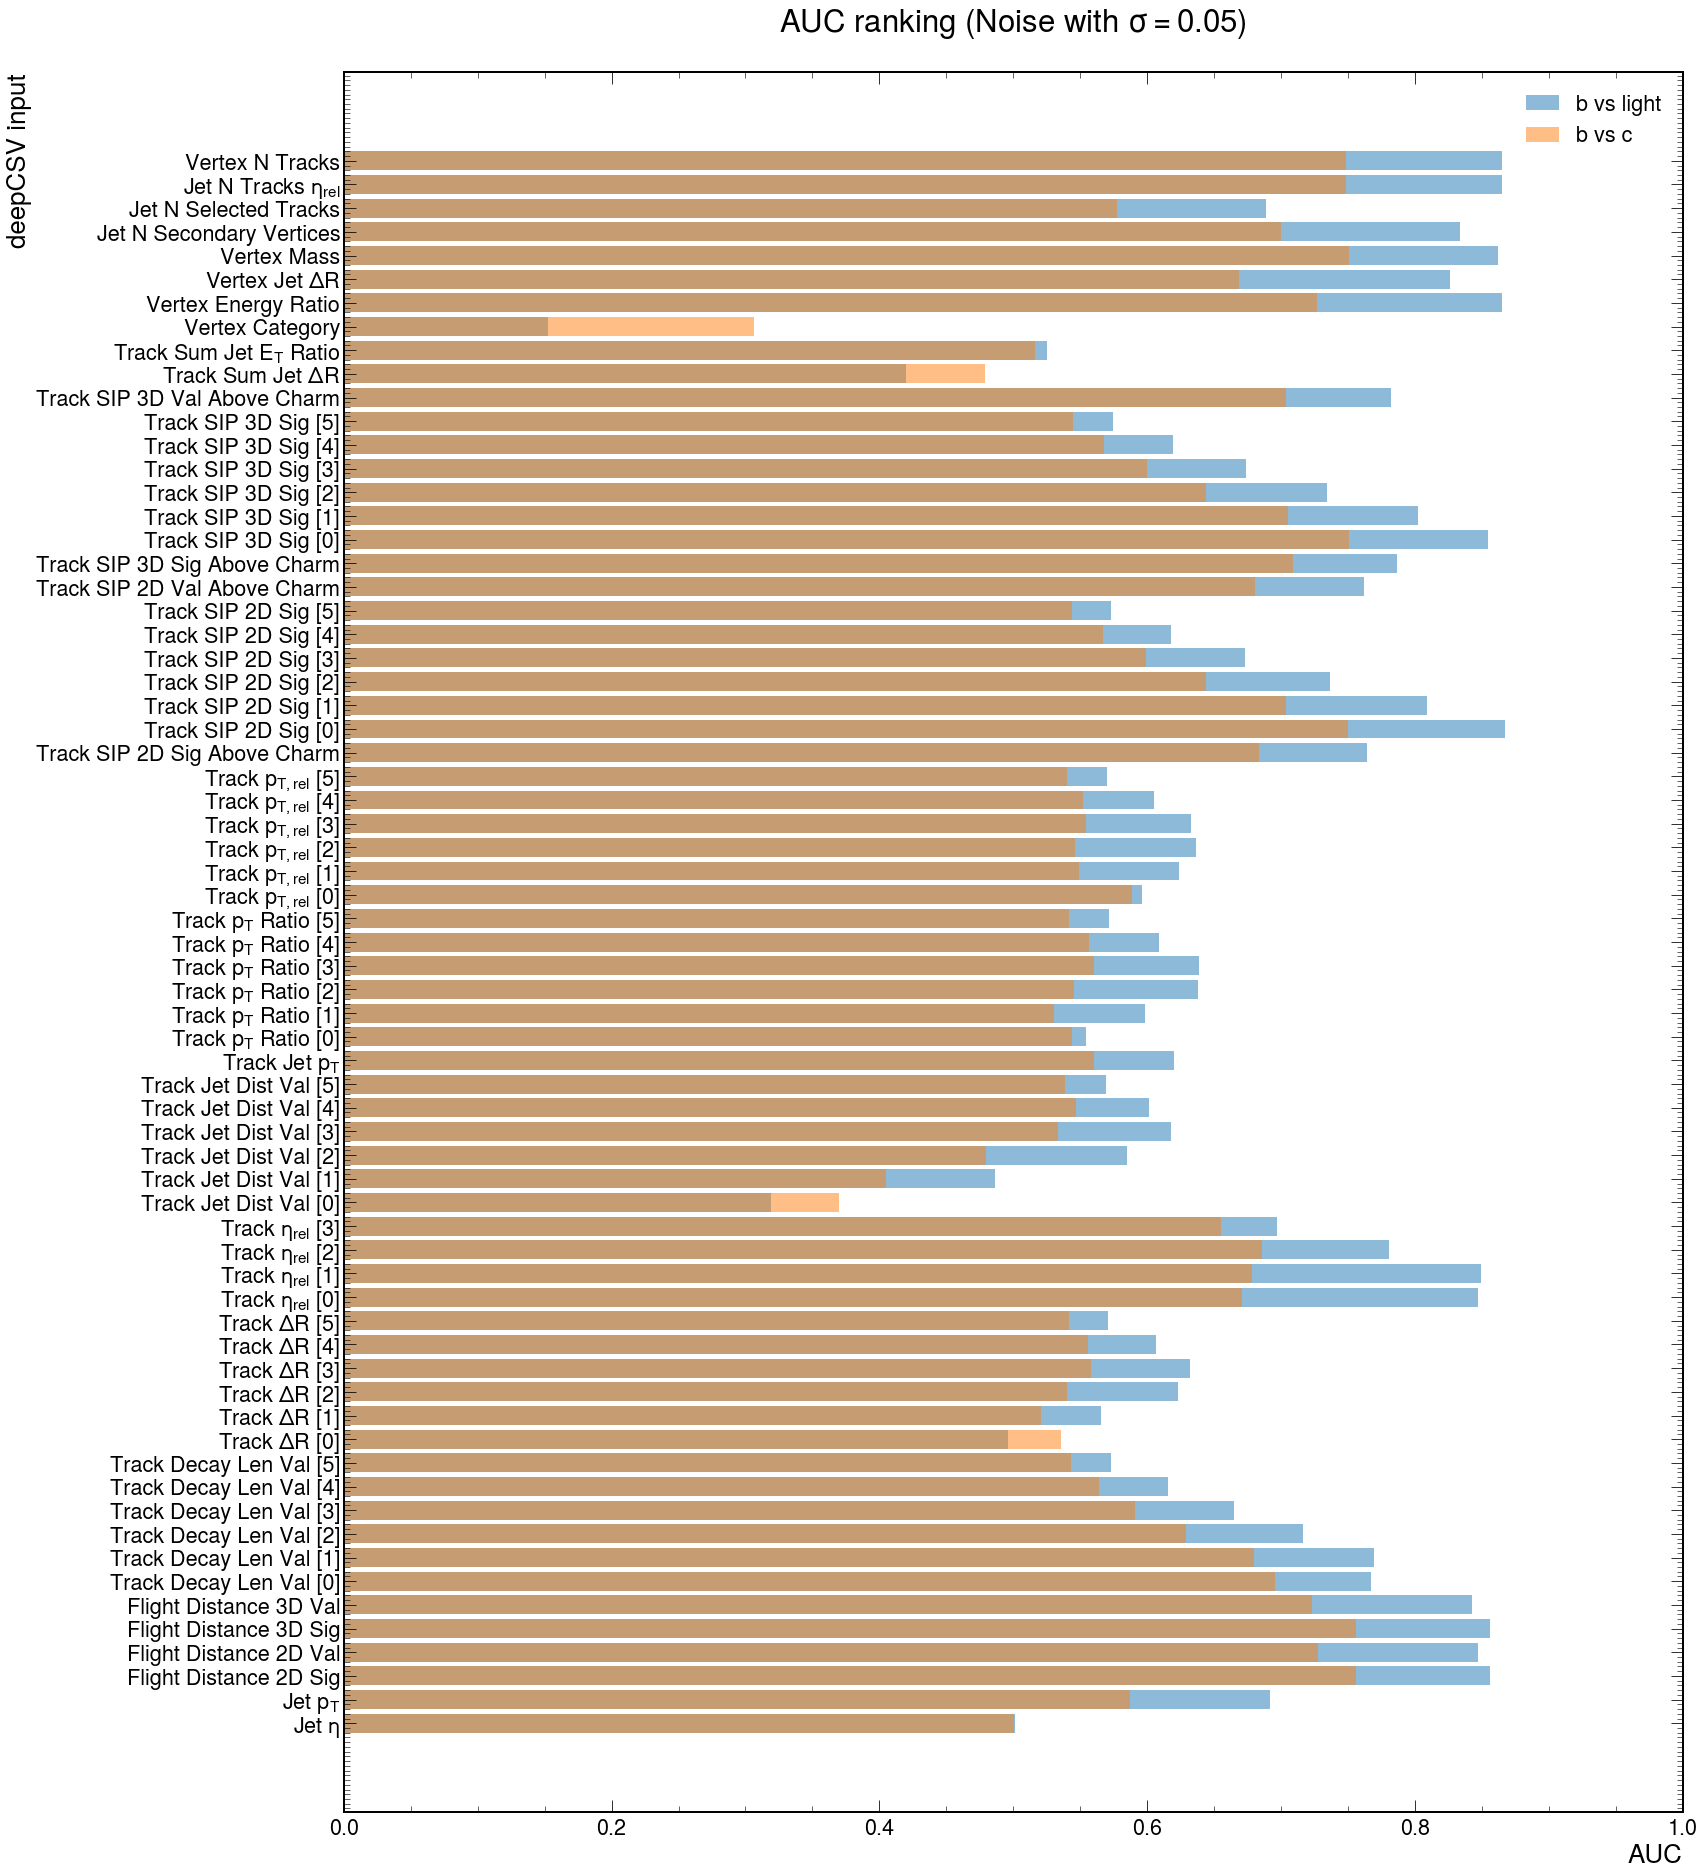

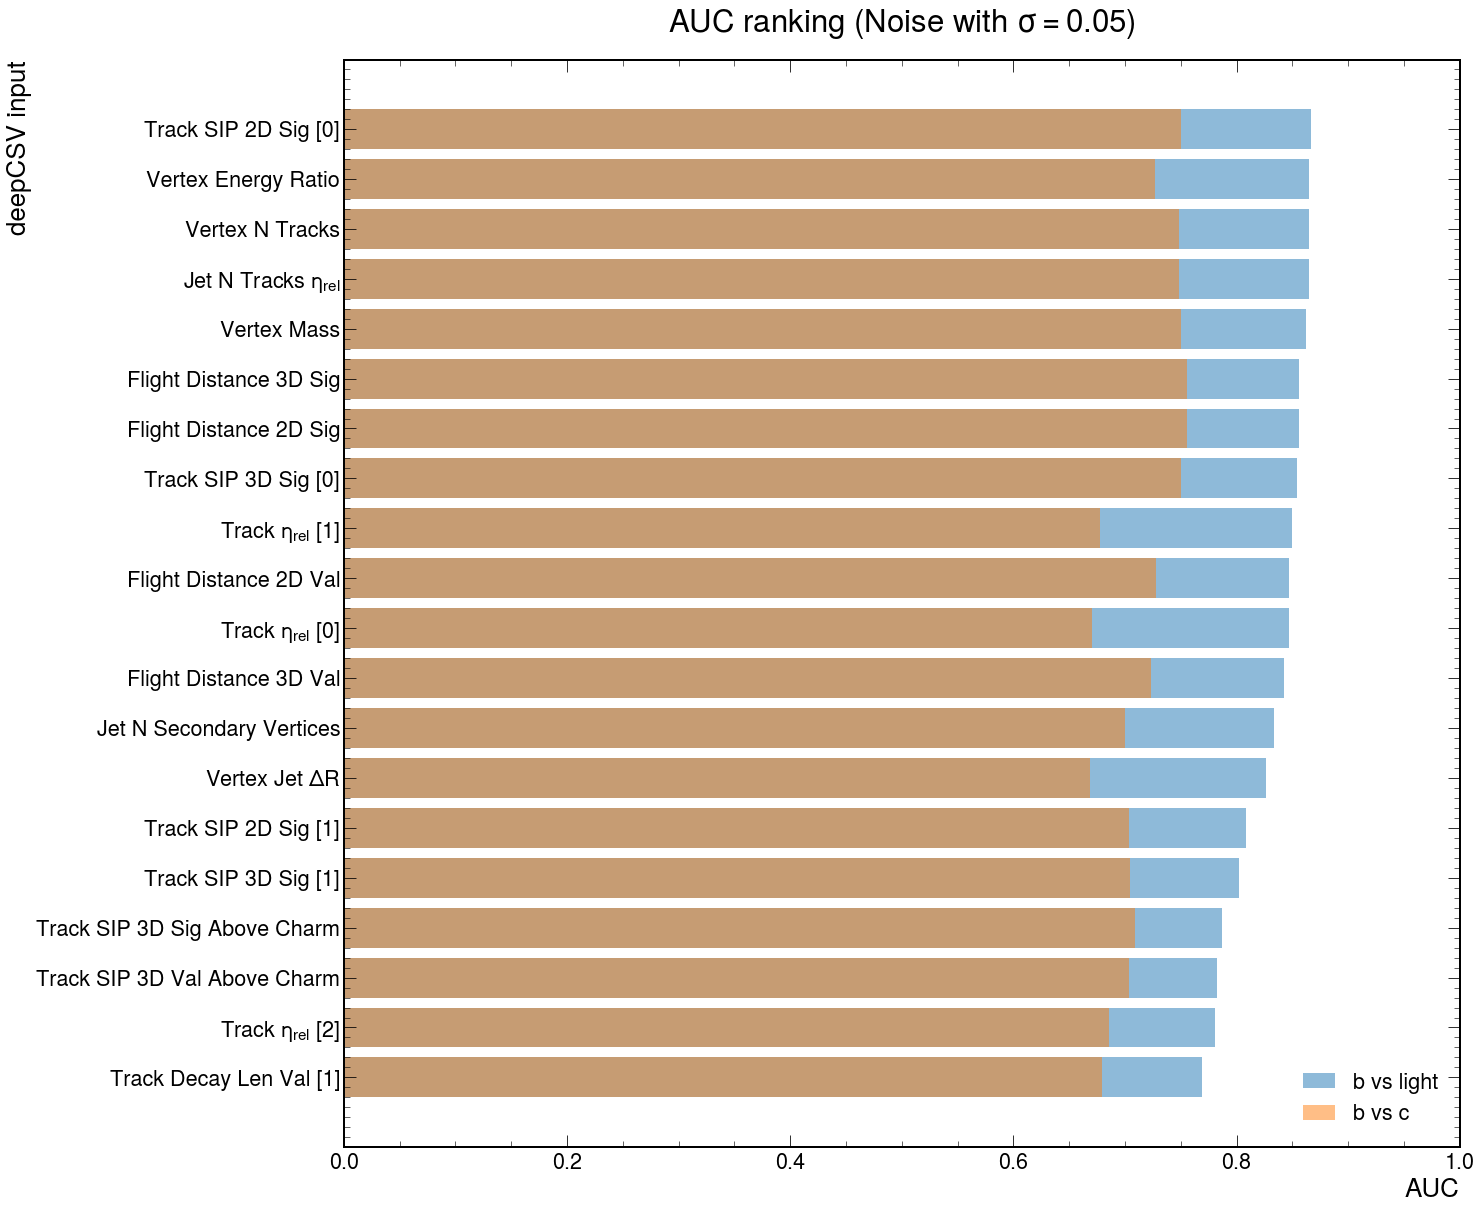

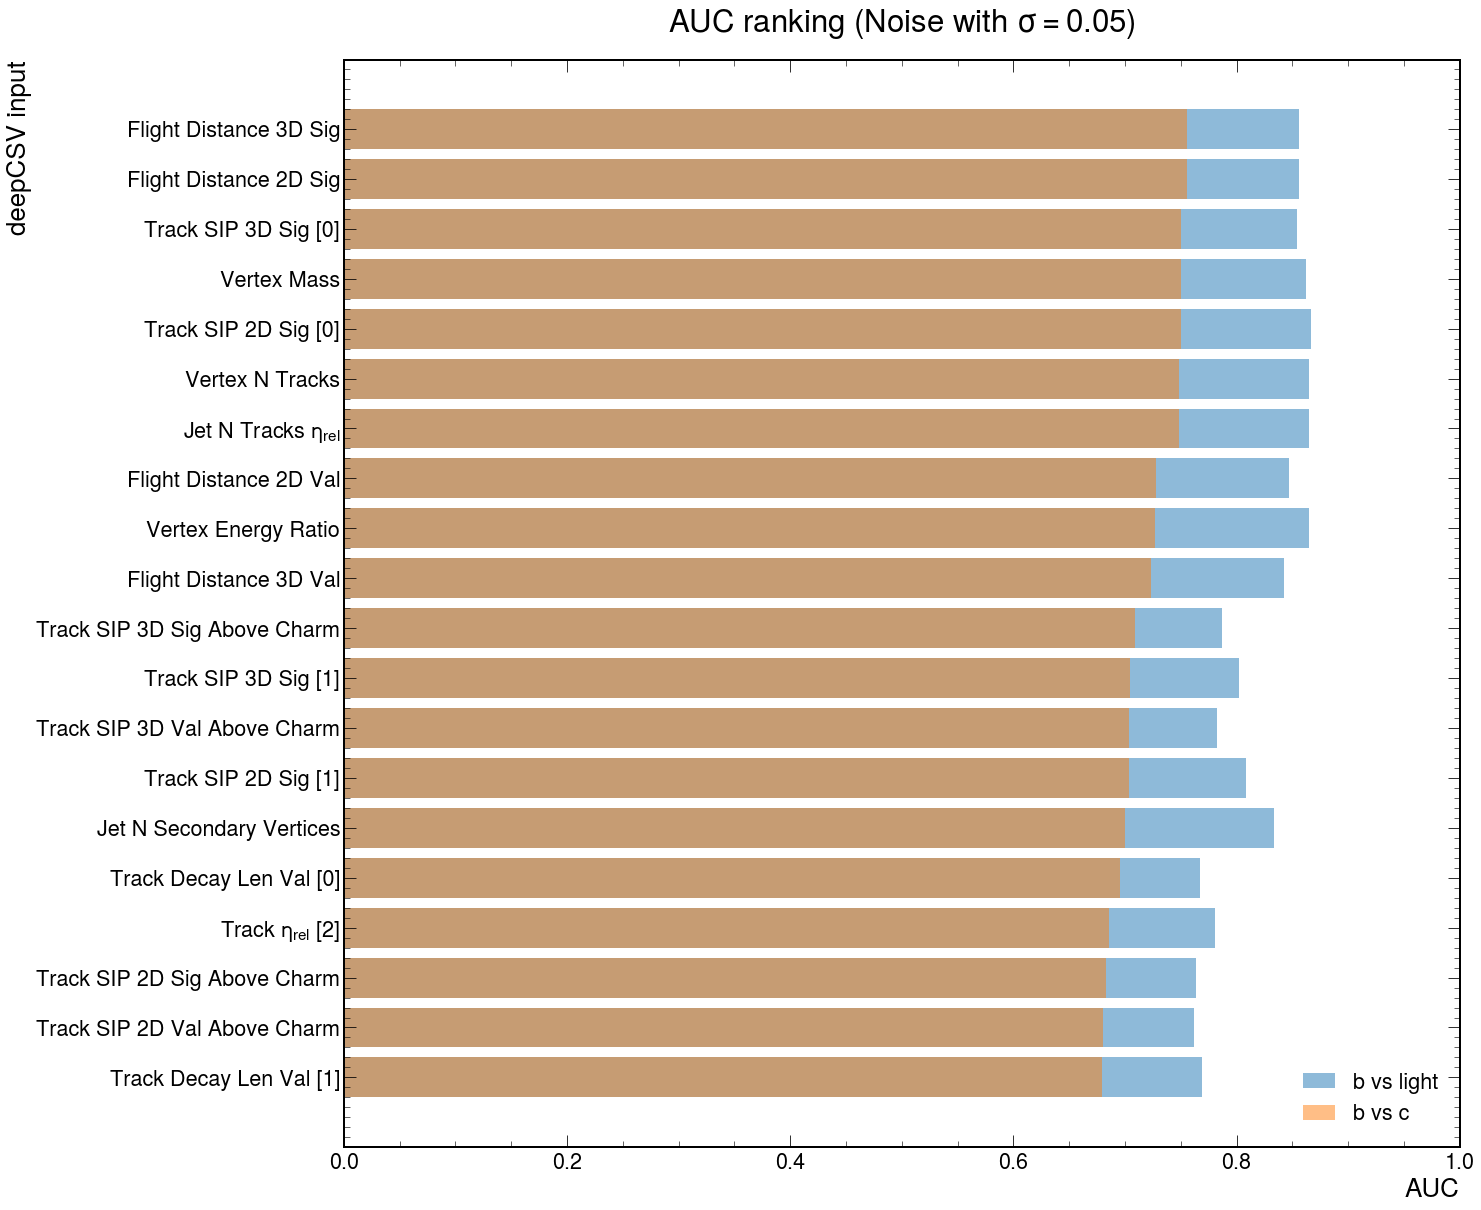

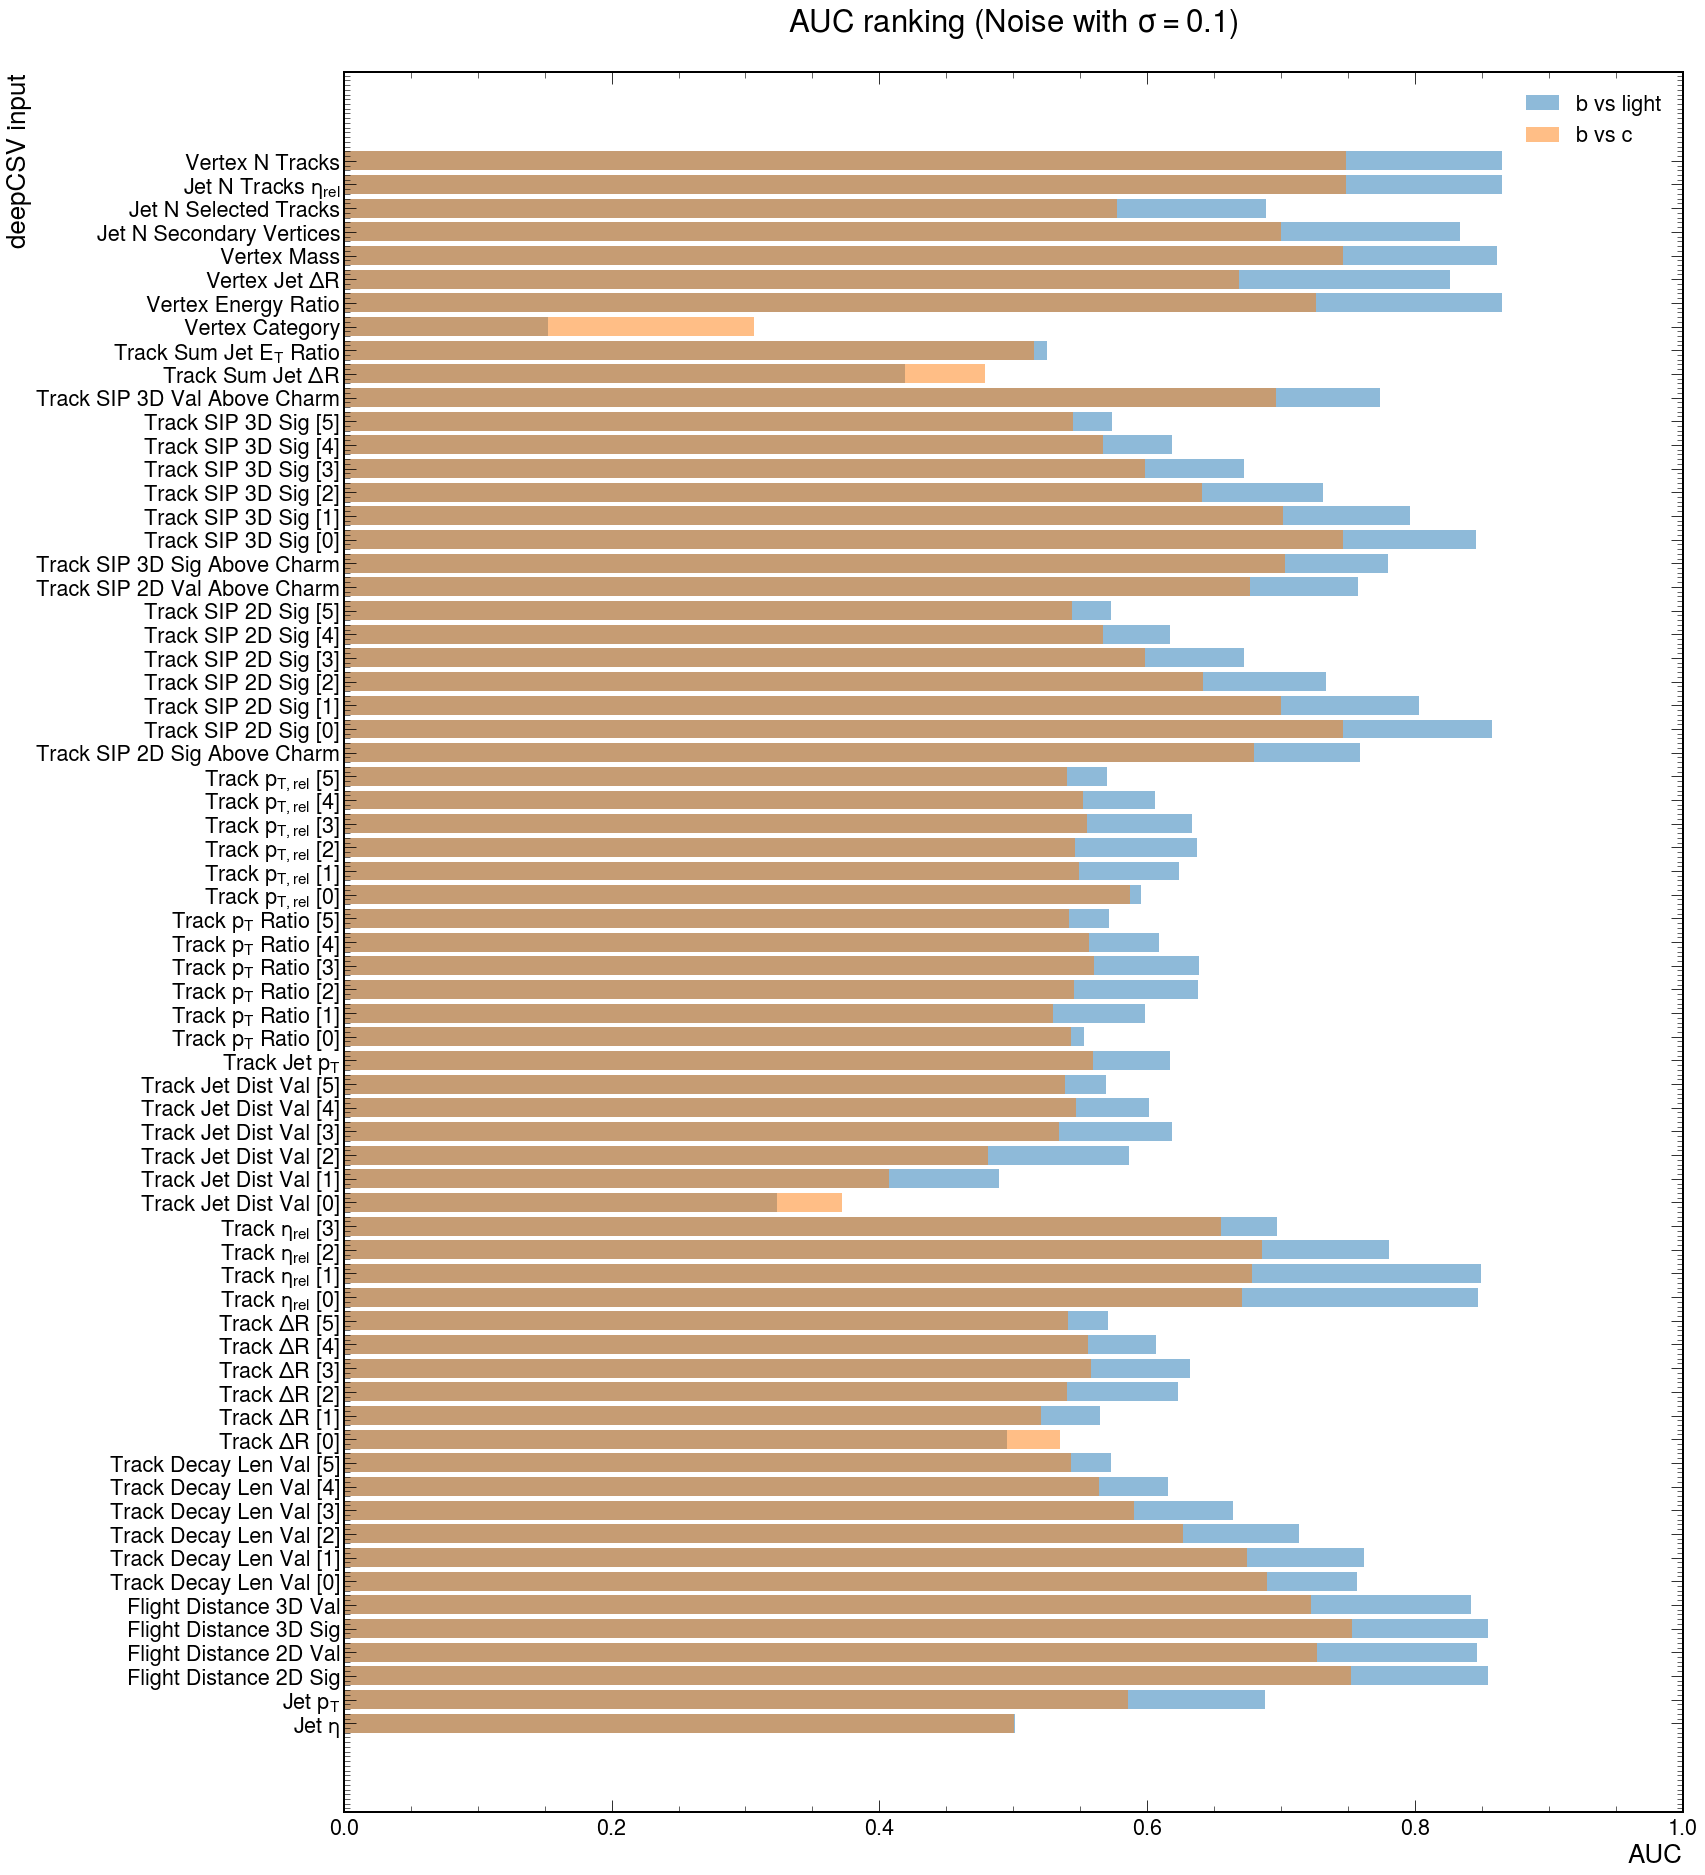

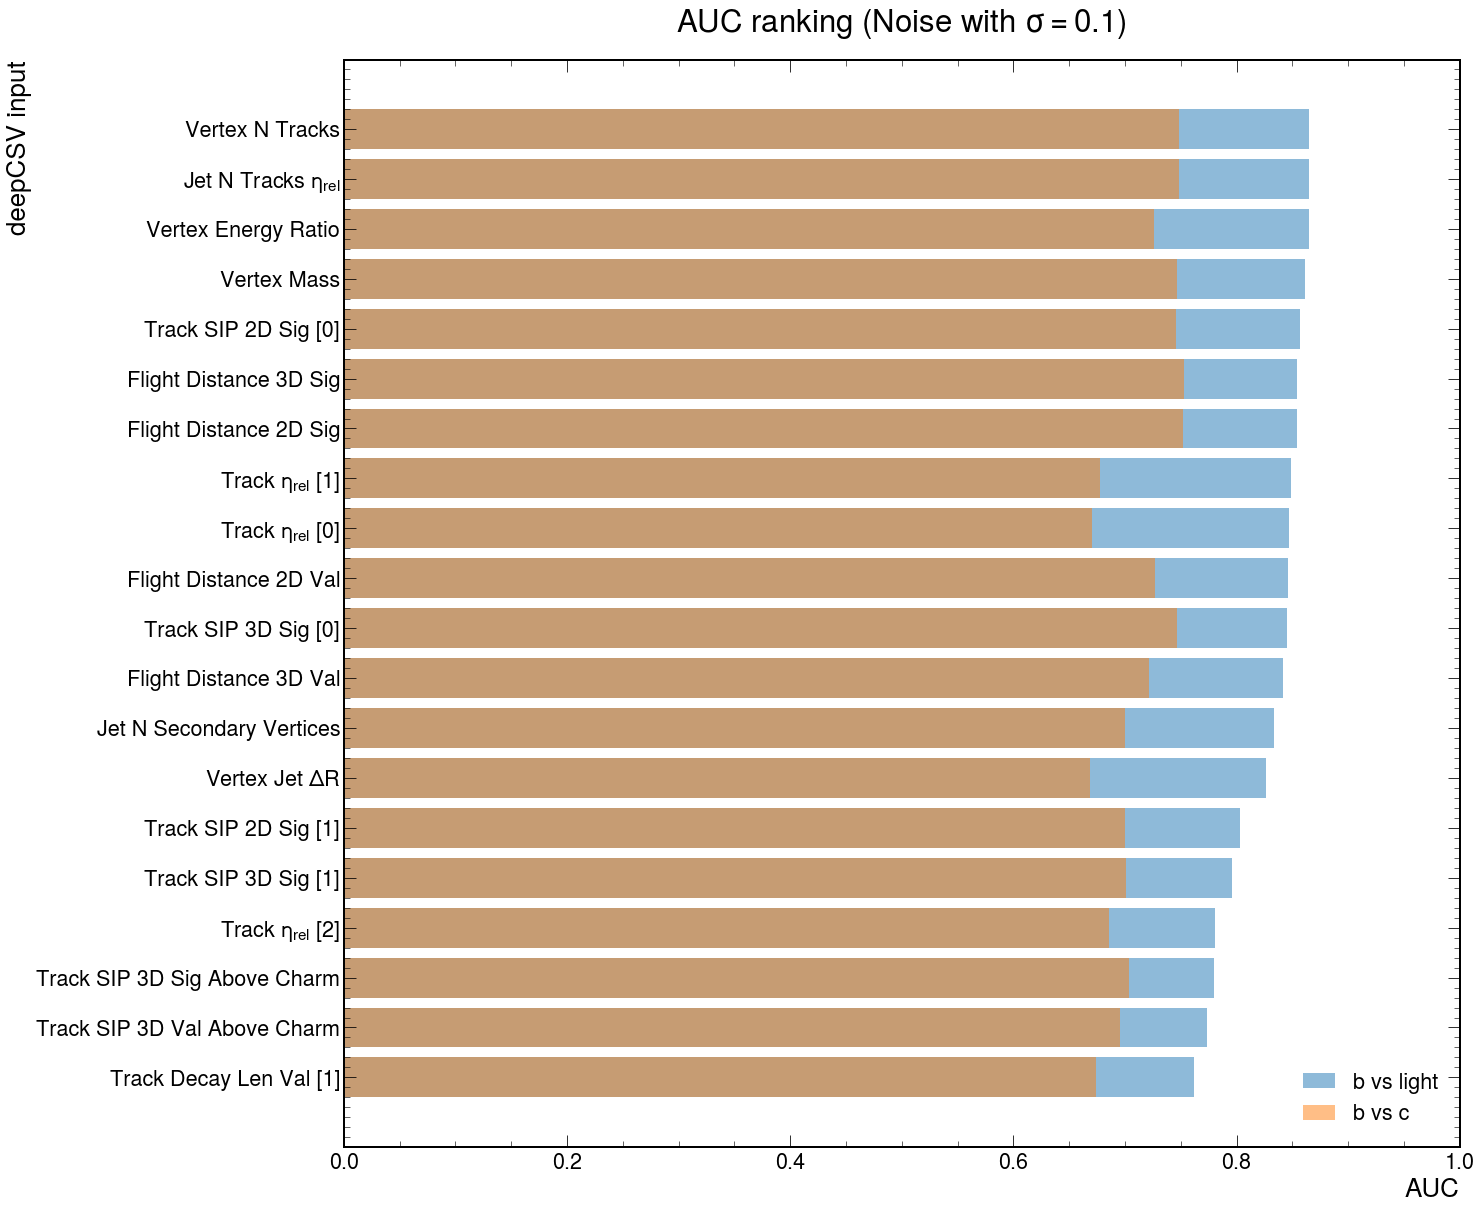

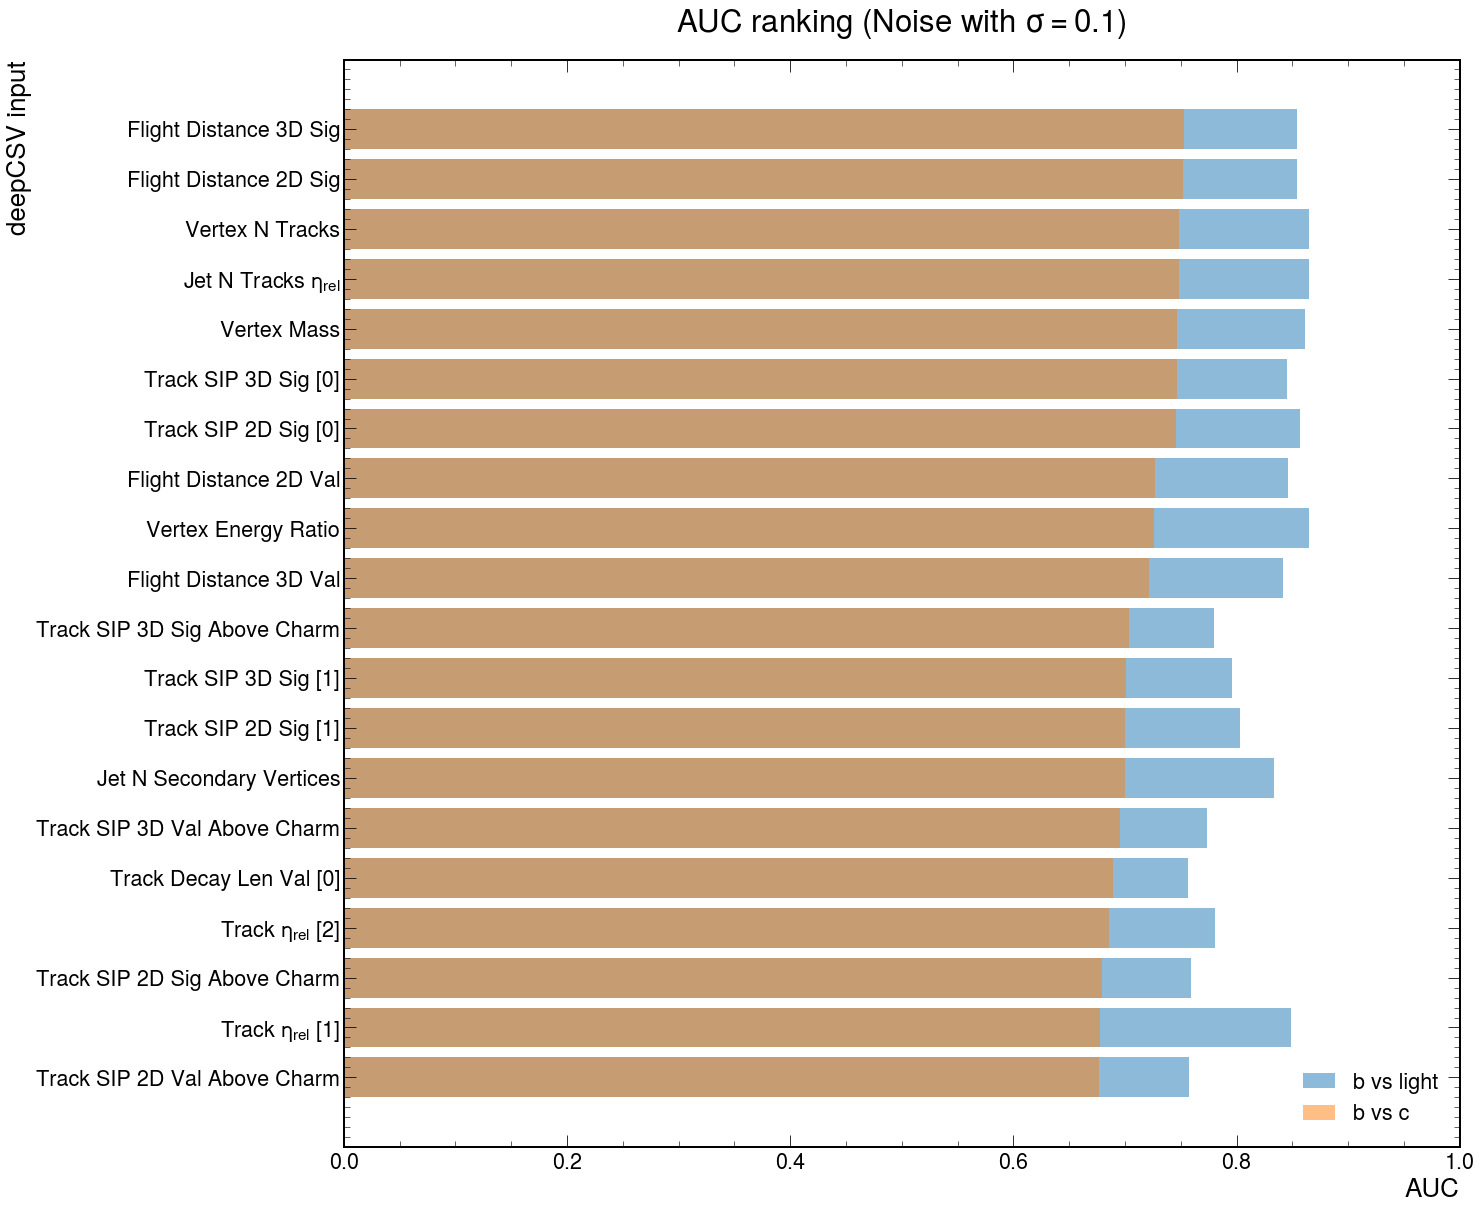

In [18]:
for x in dfs_noise:
    plot_ranking(dfs_noise[x],'noise',x)
    plot_sorted(dfs_noise[x].sort_values('auc_bvl'),'noise','bvl',x)
    plot_sorted(dfs_noise[x].sort_values('auc_bvc'),'noise','bvc',x)

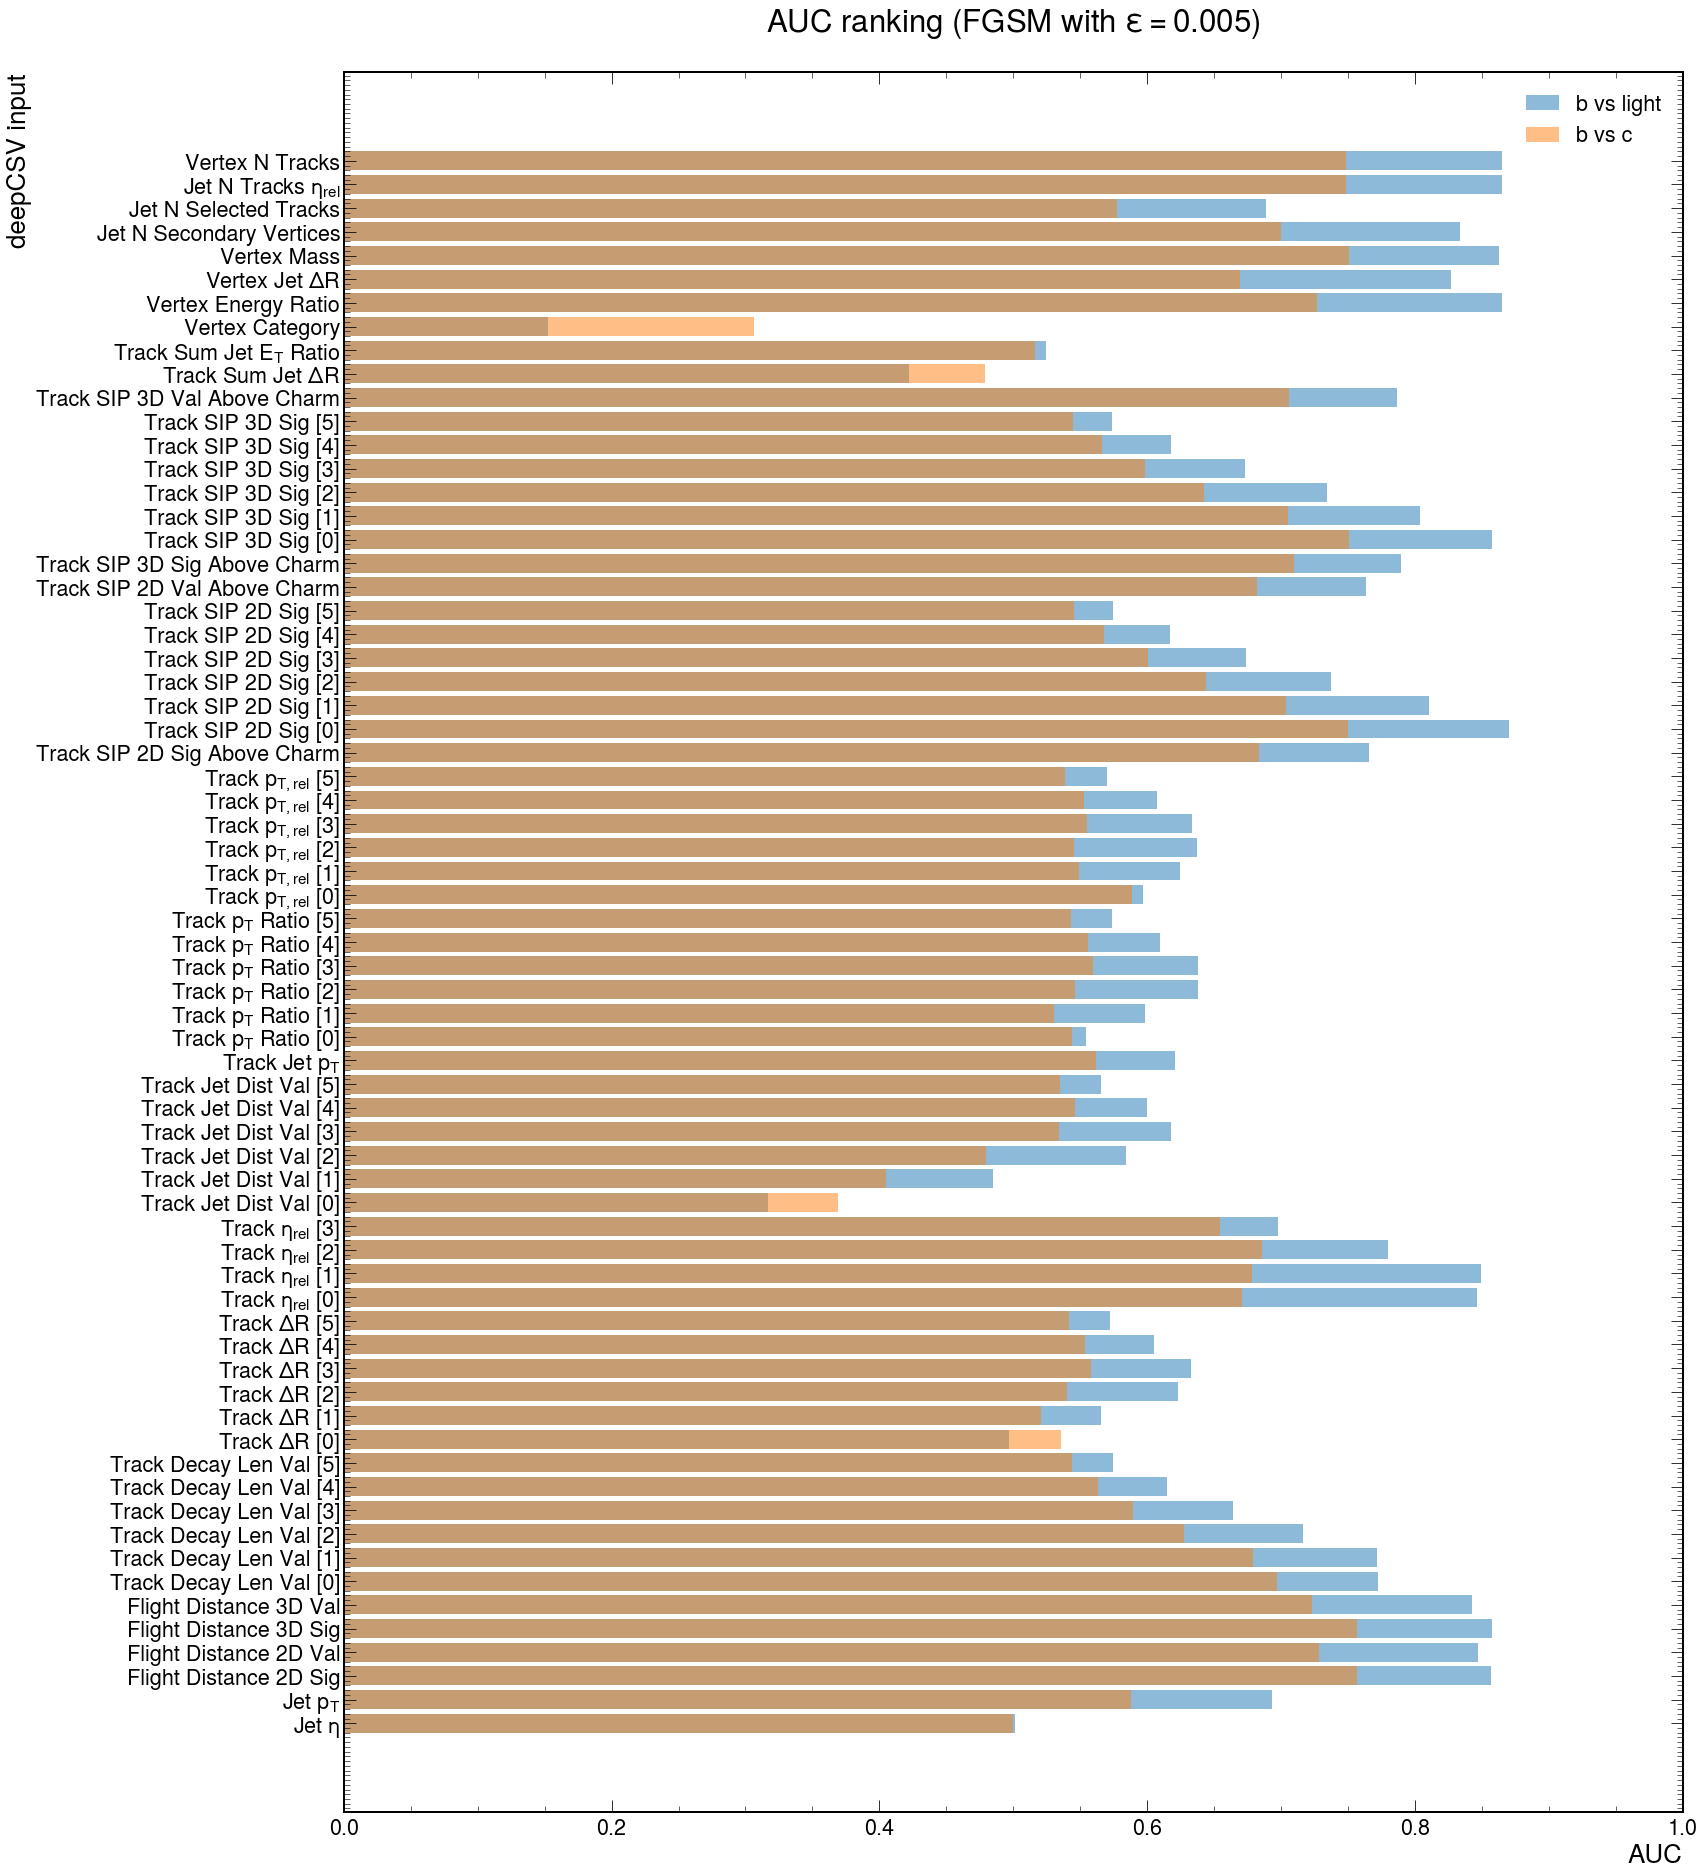

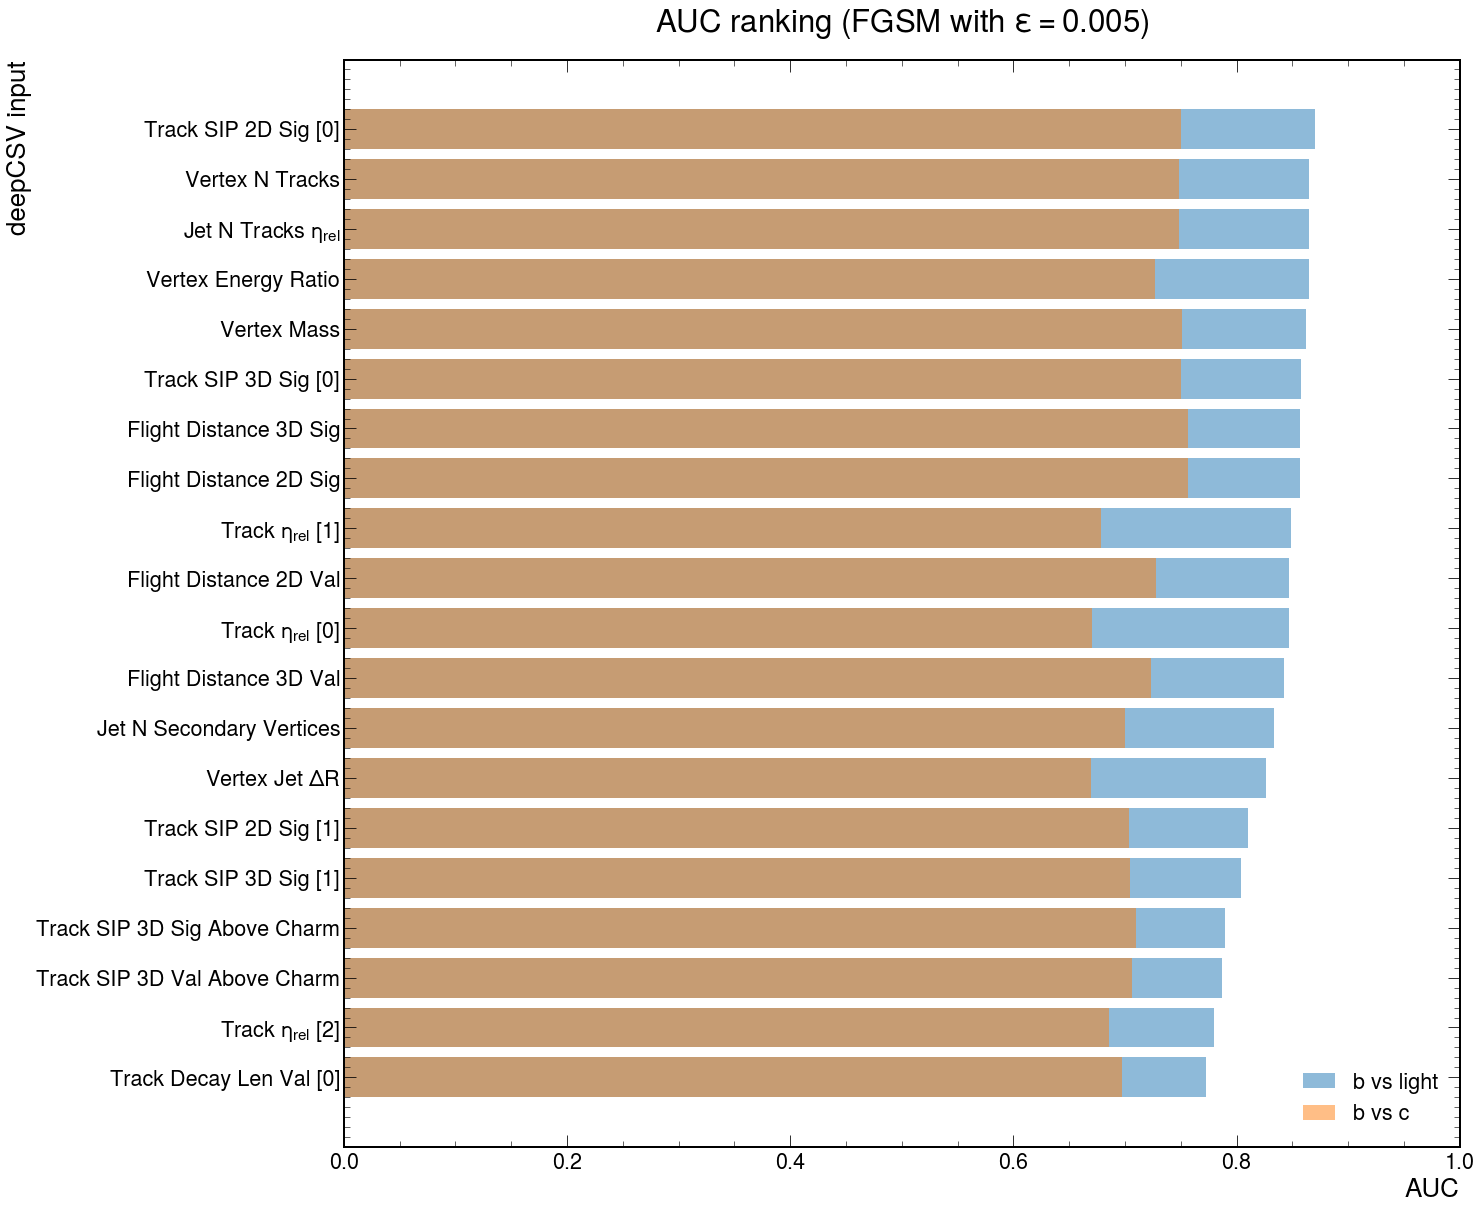

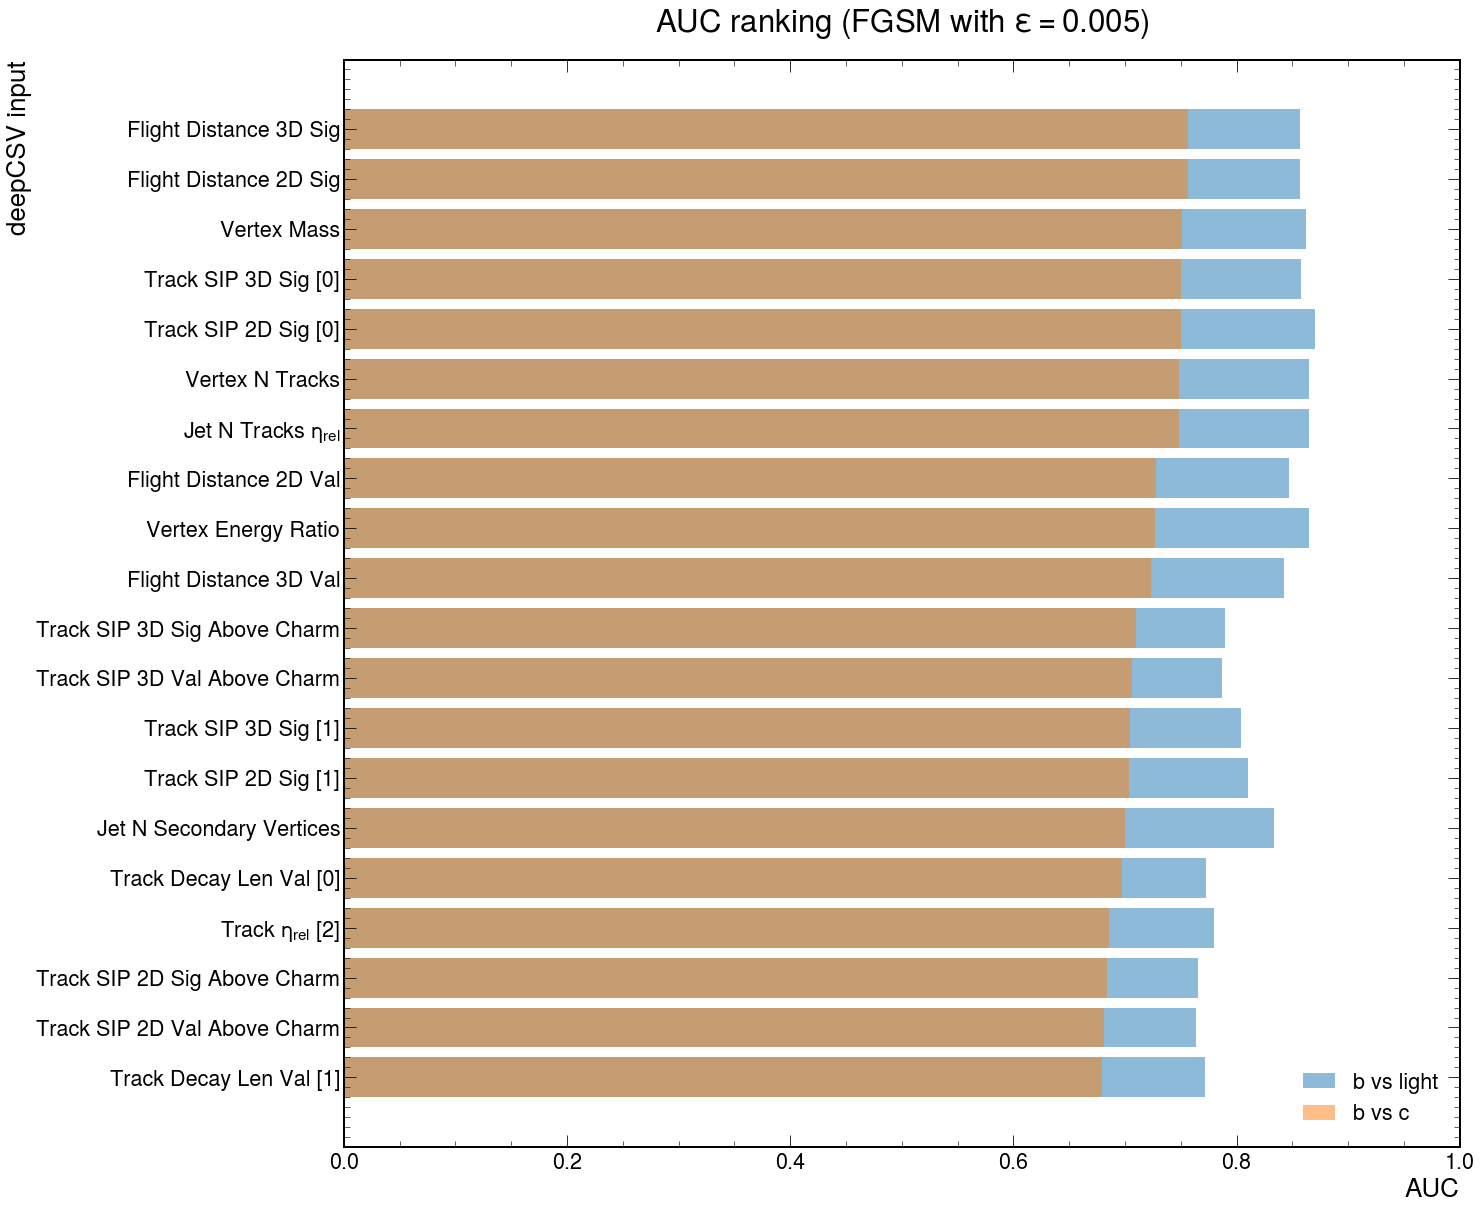

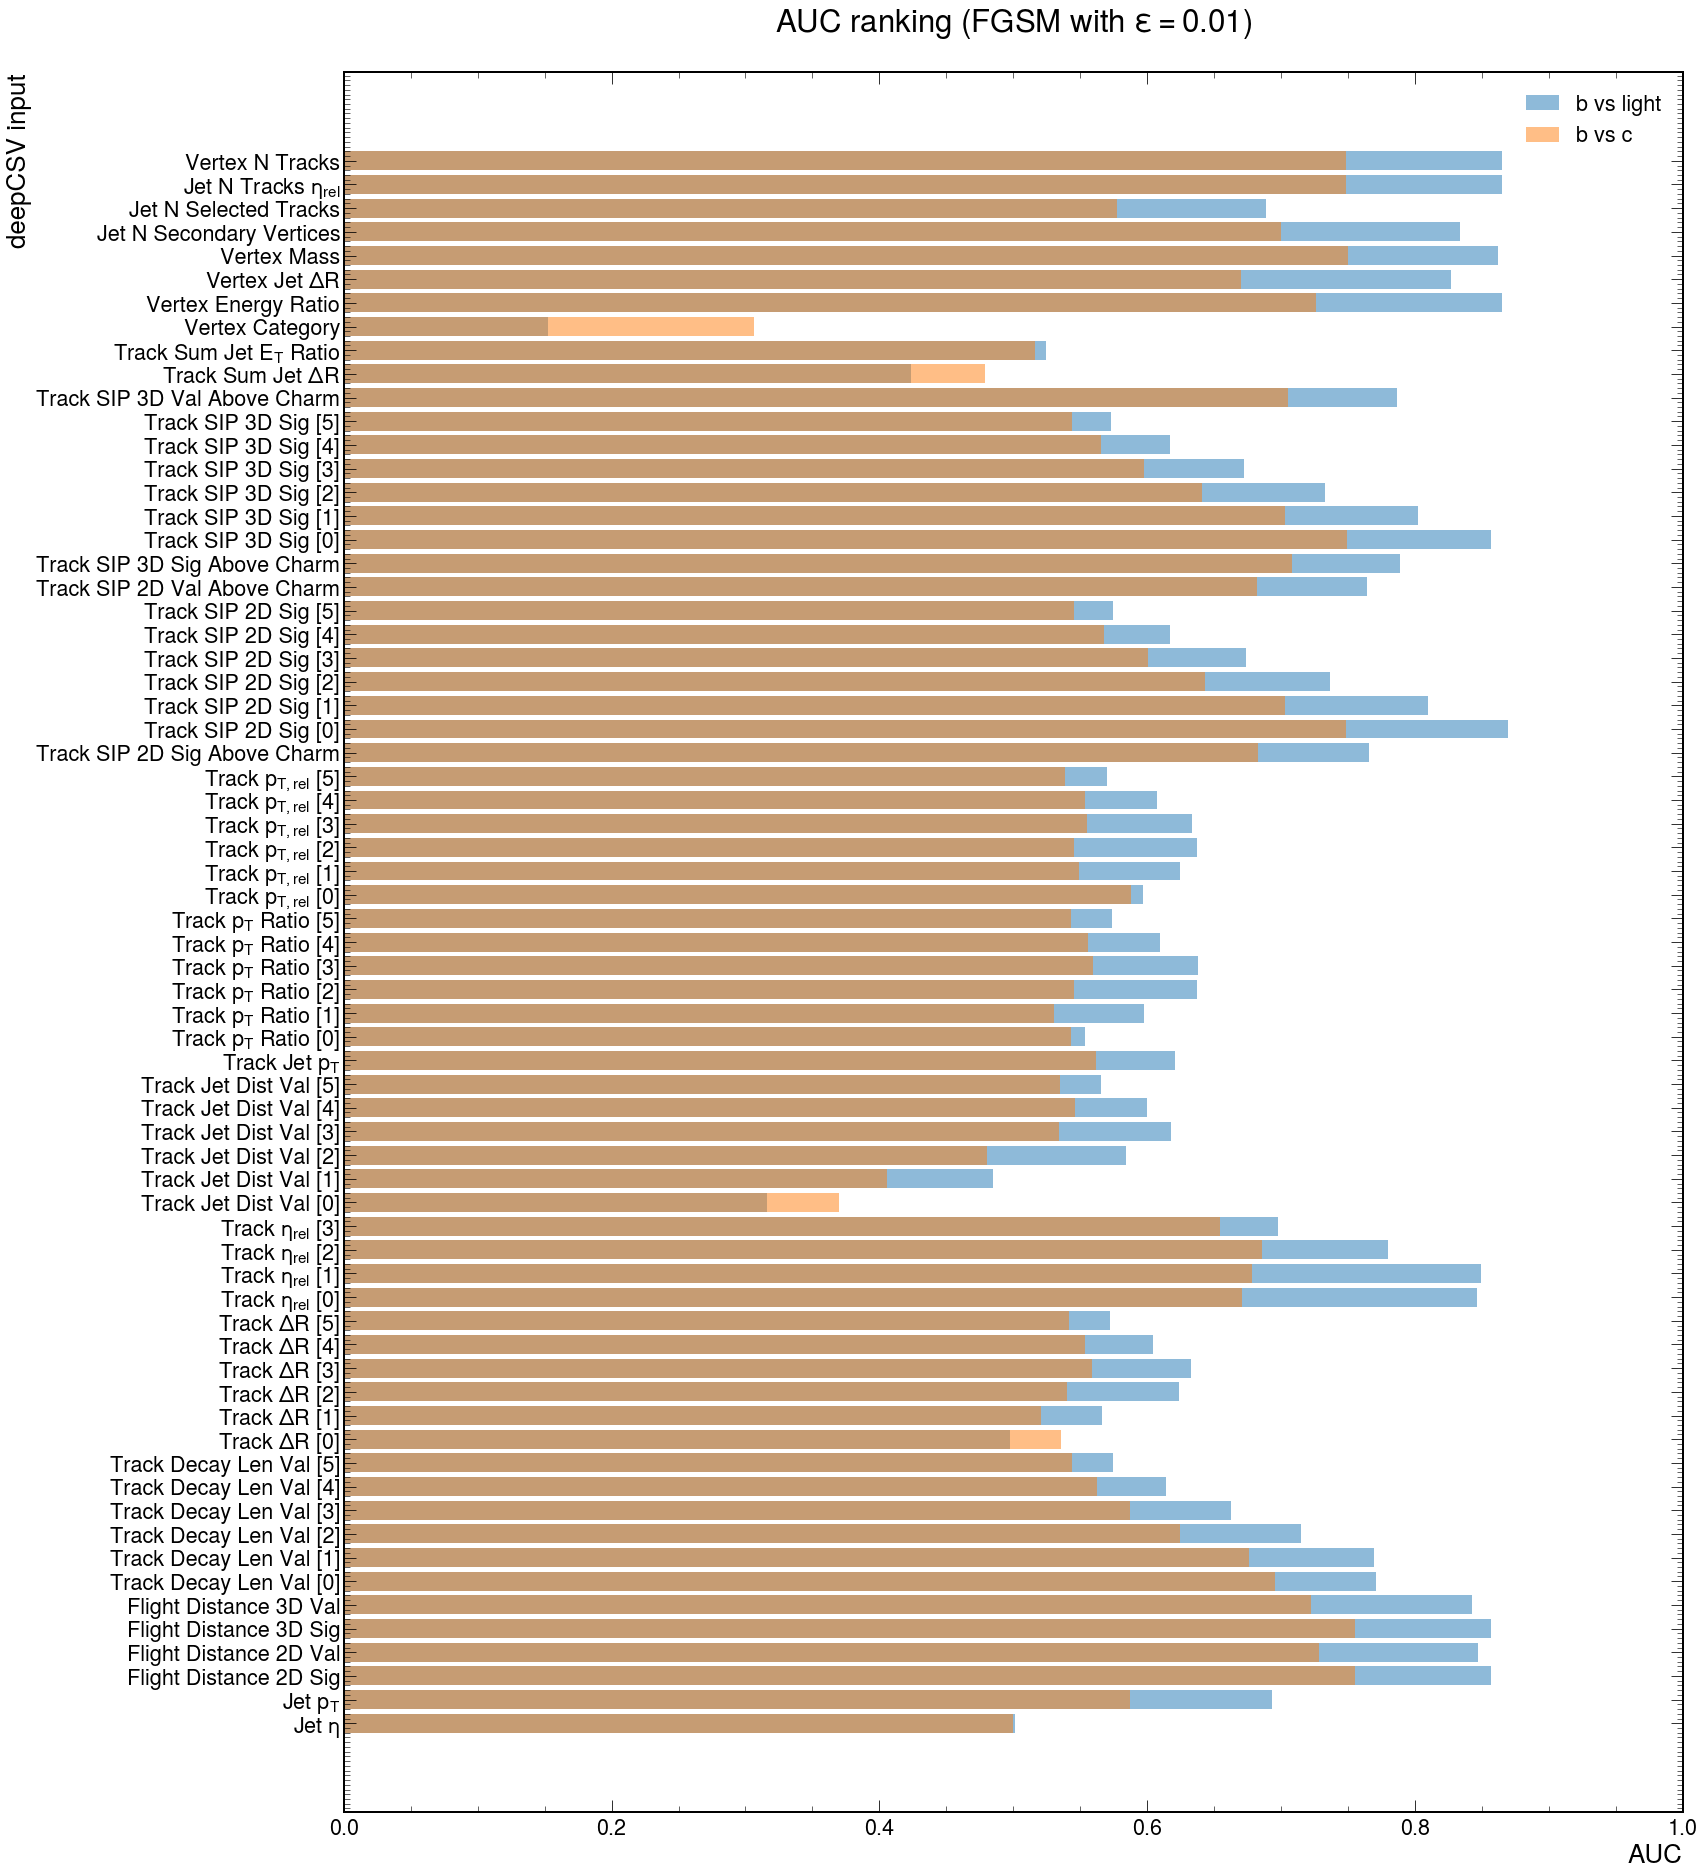

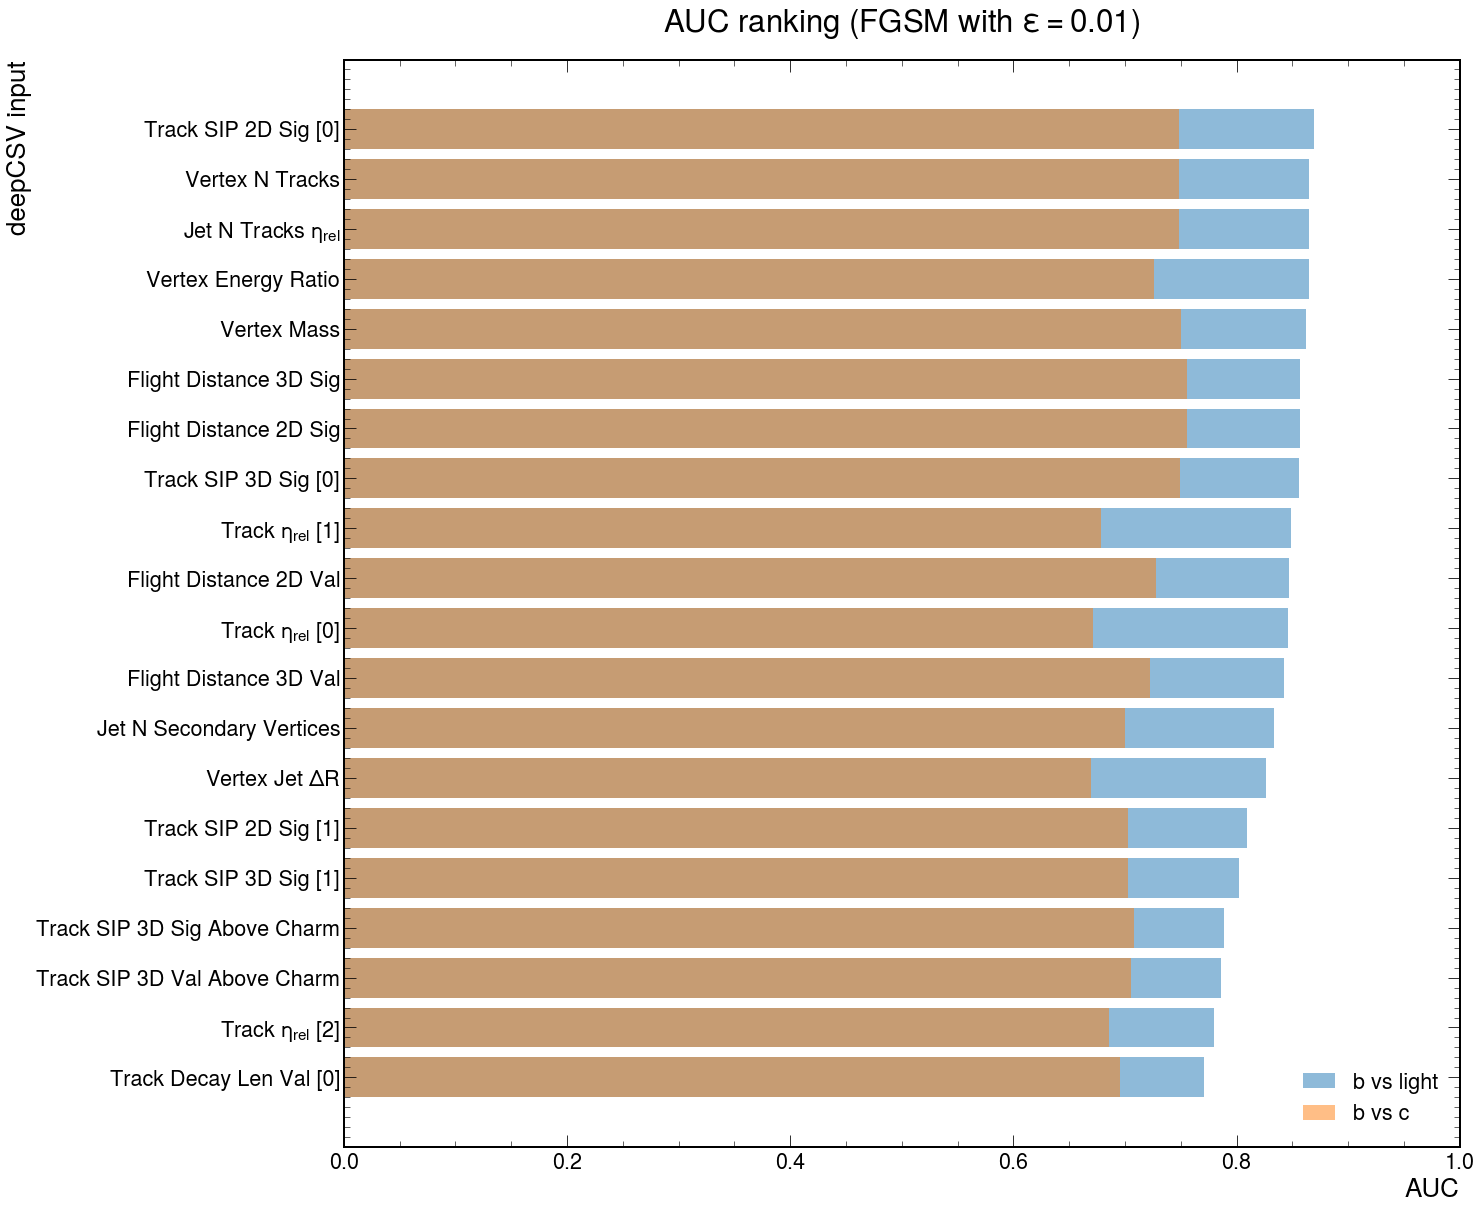

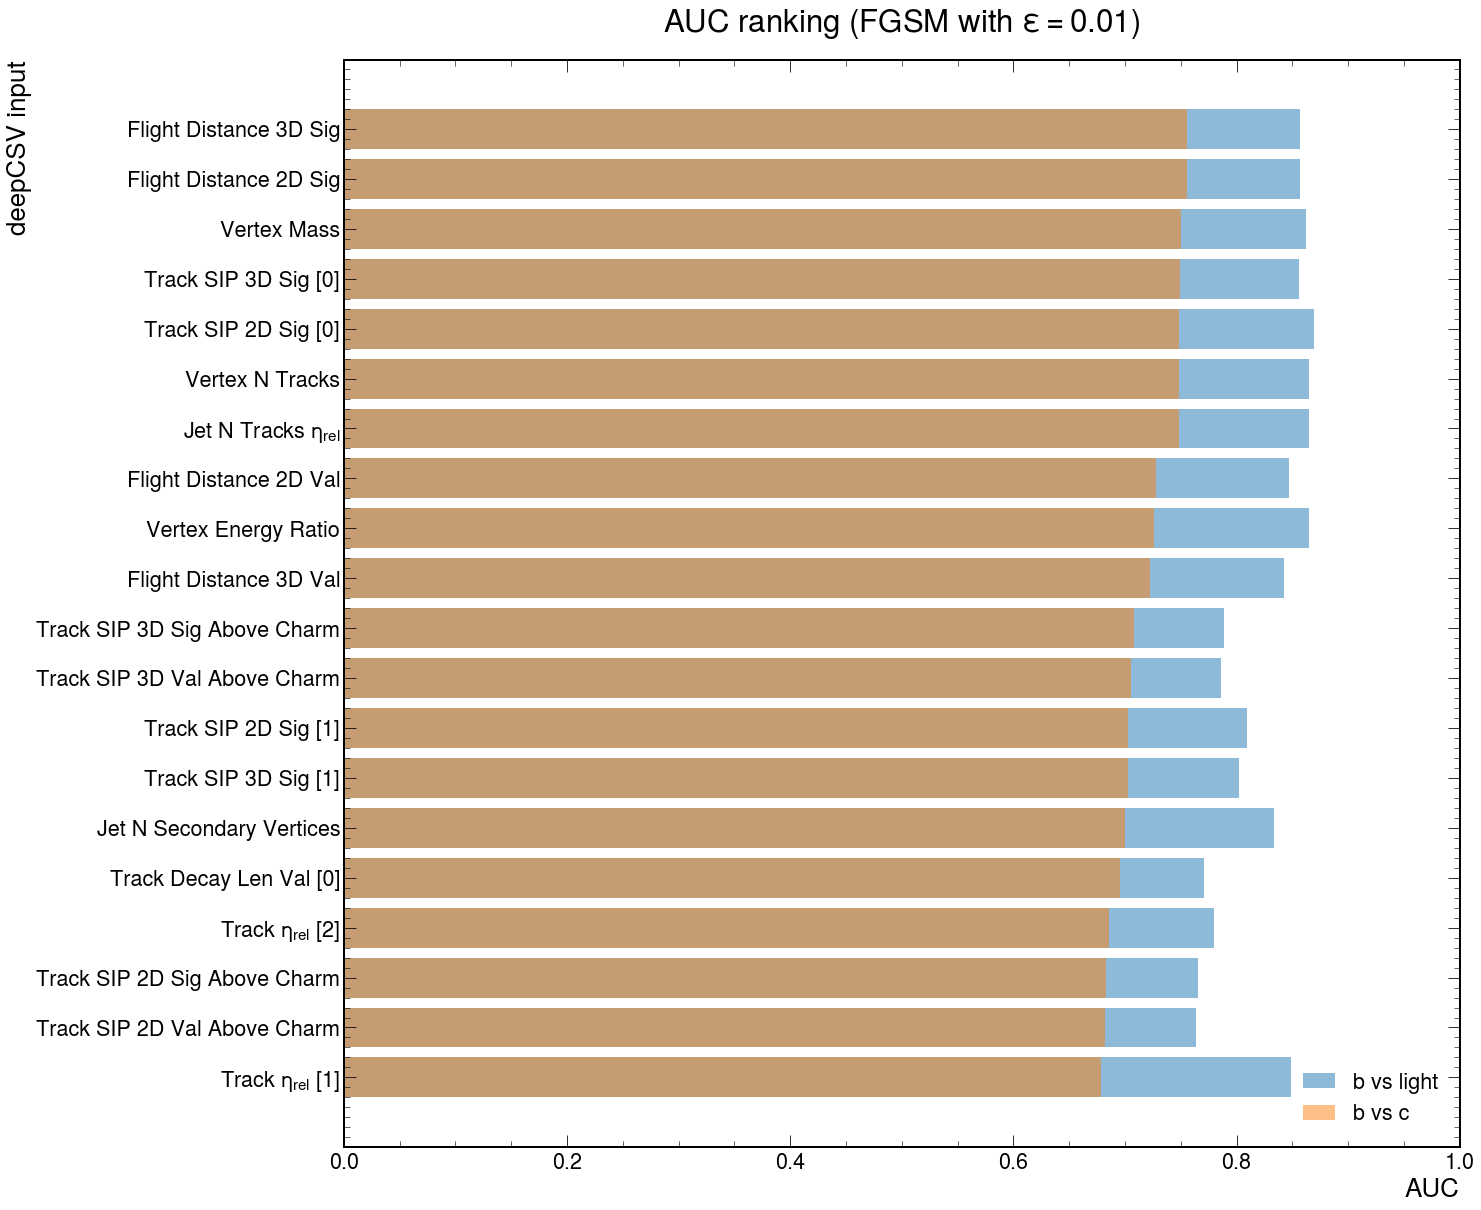

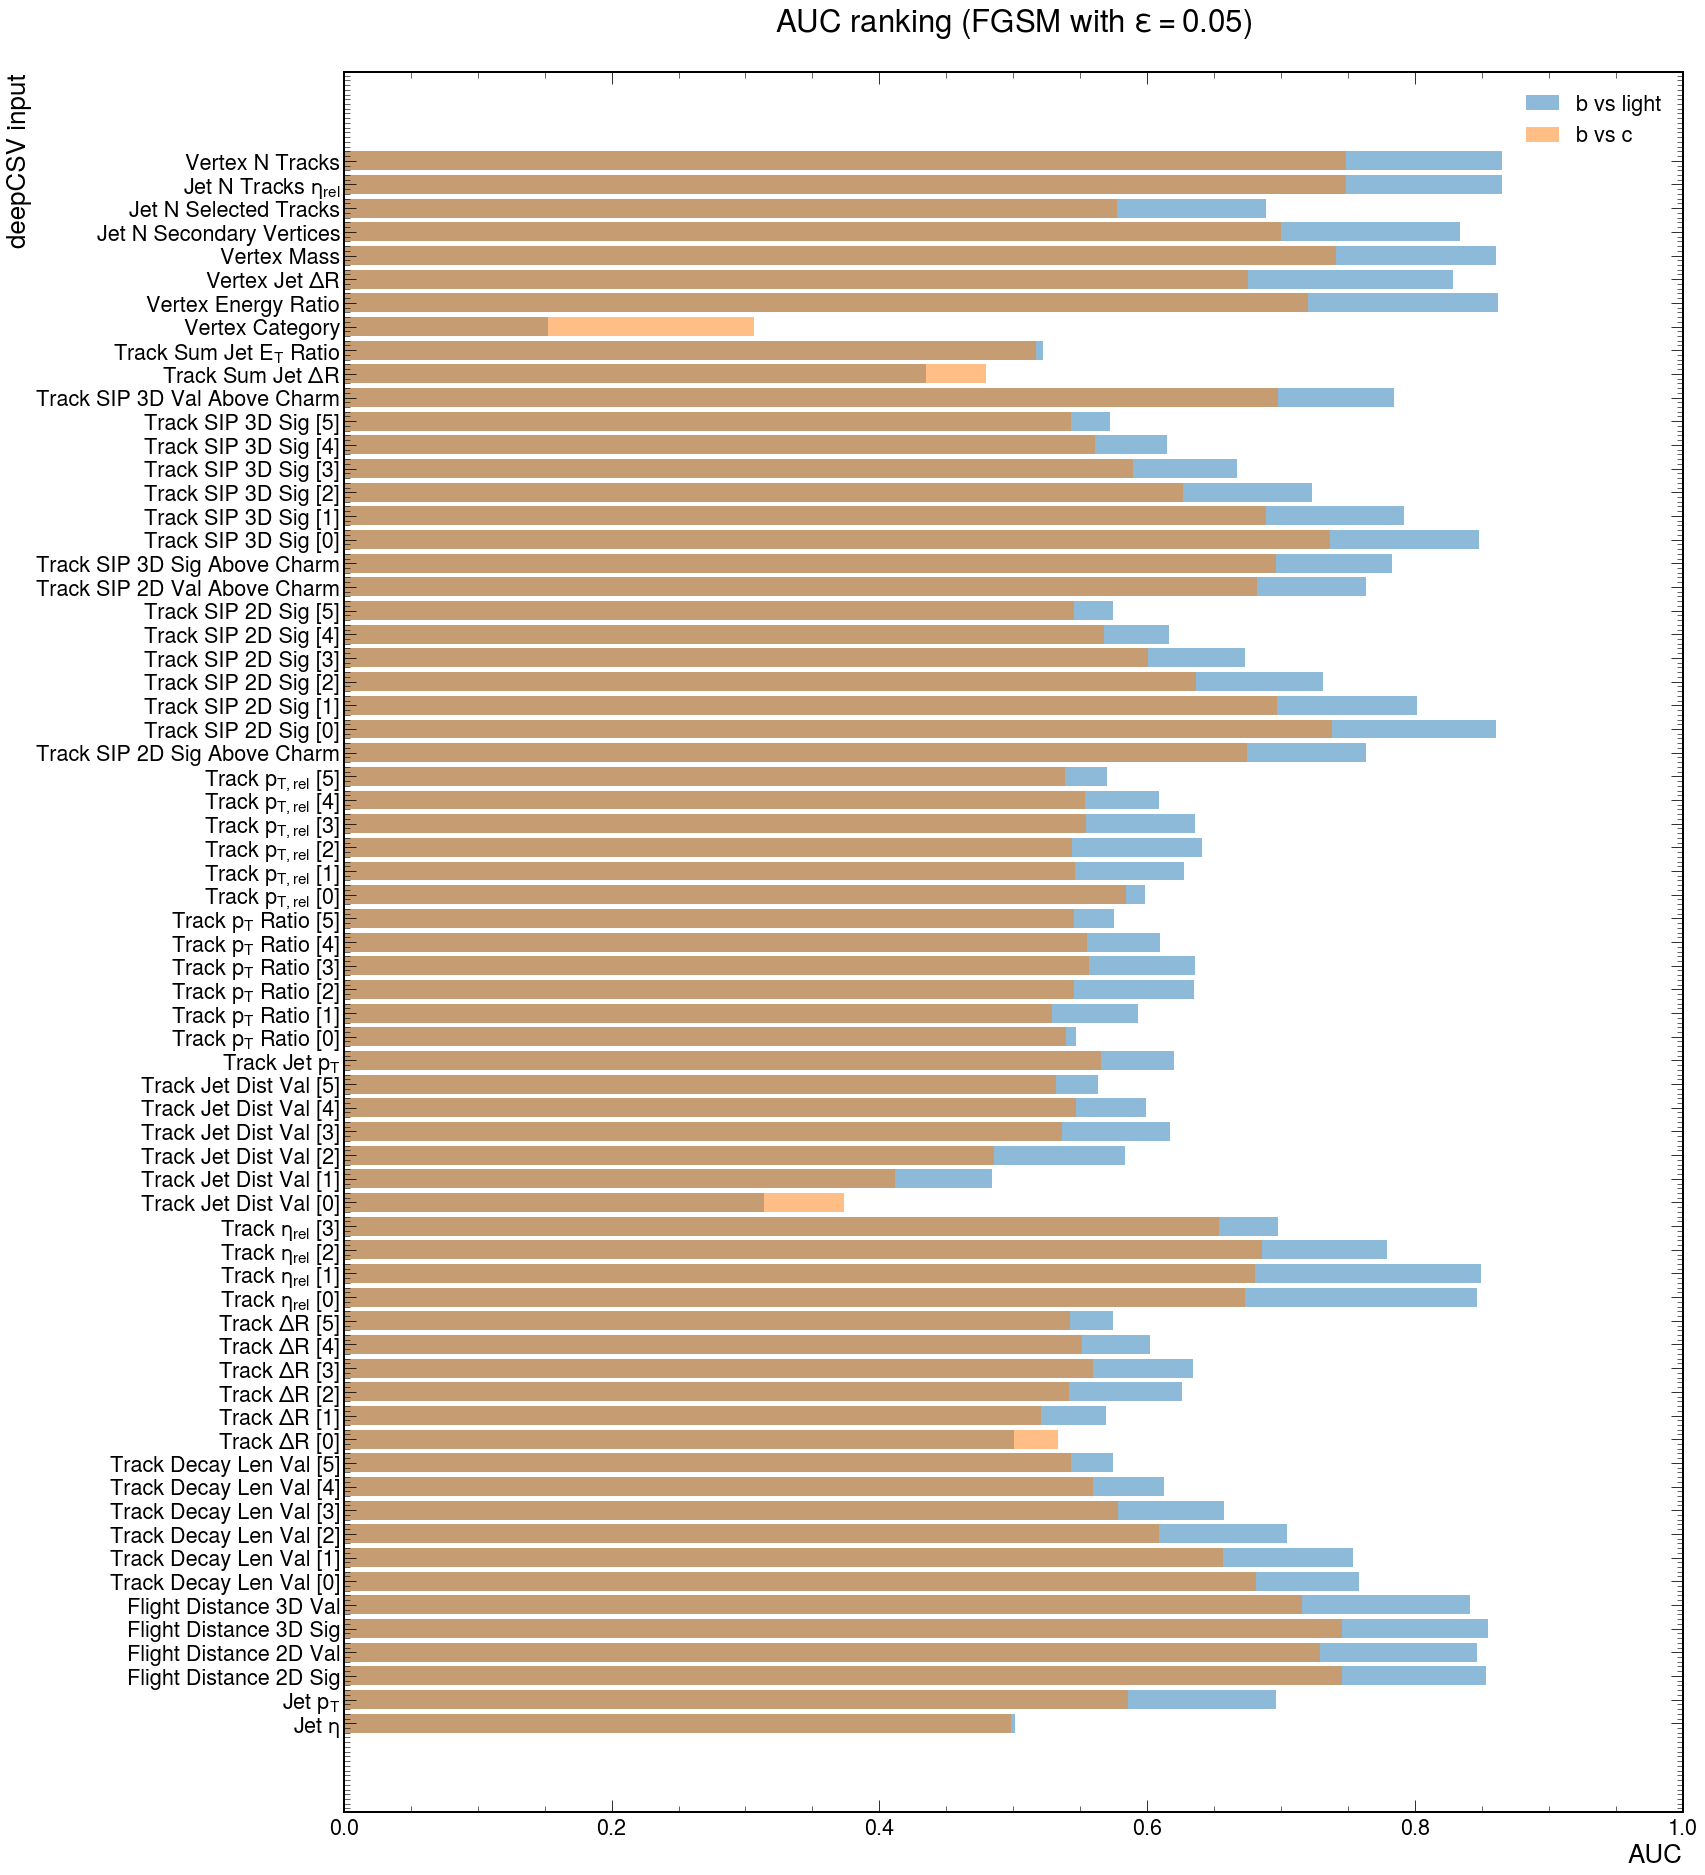

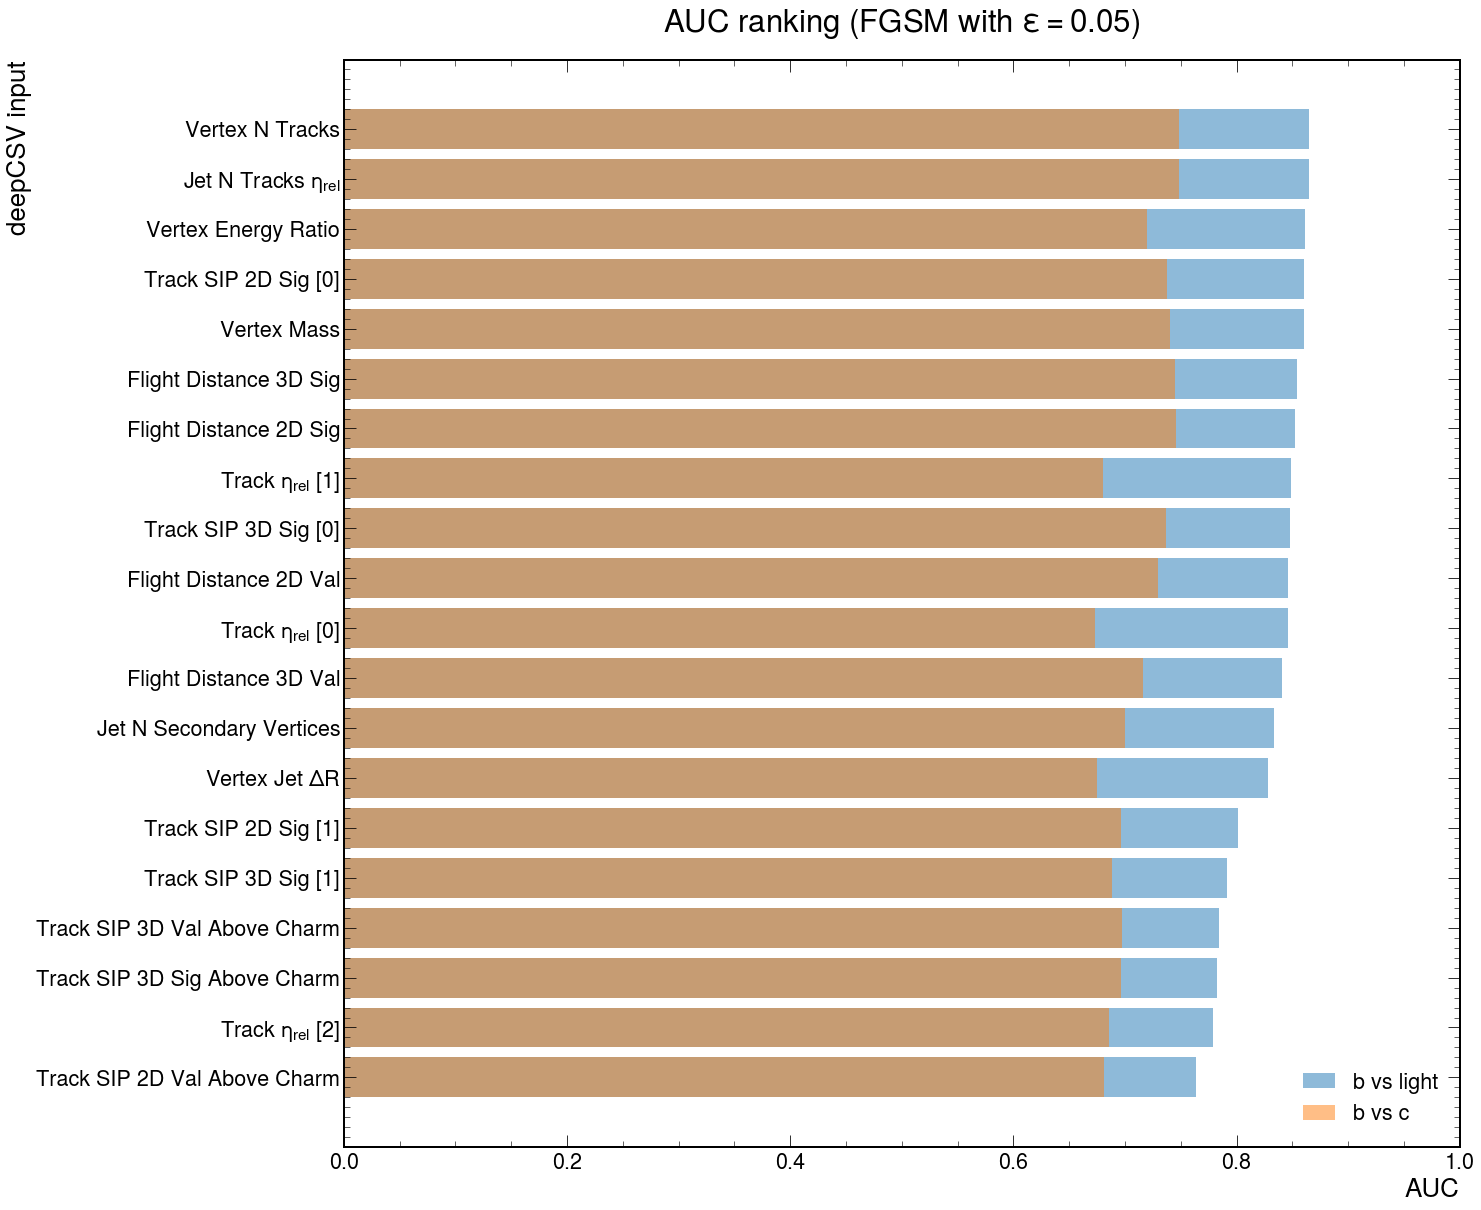

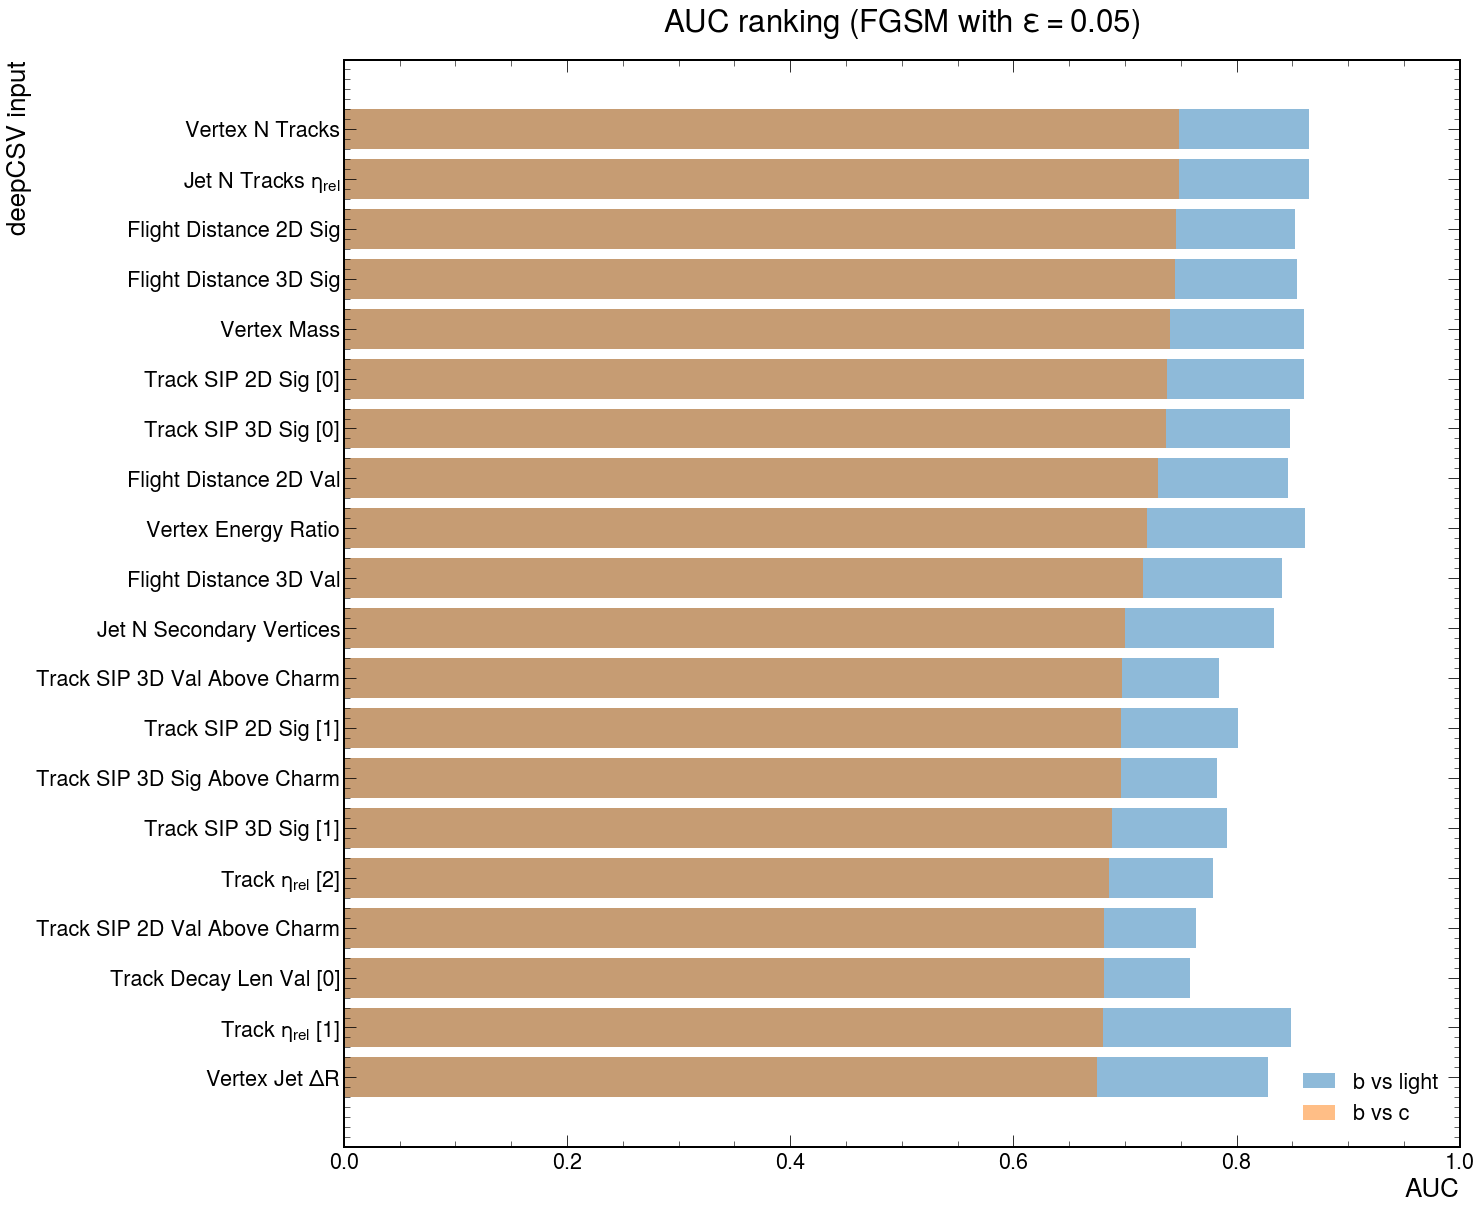

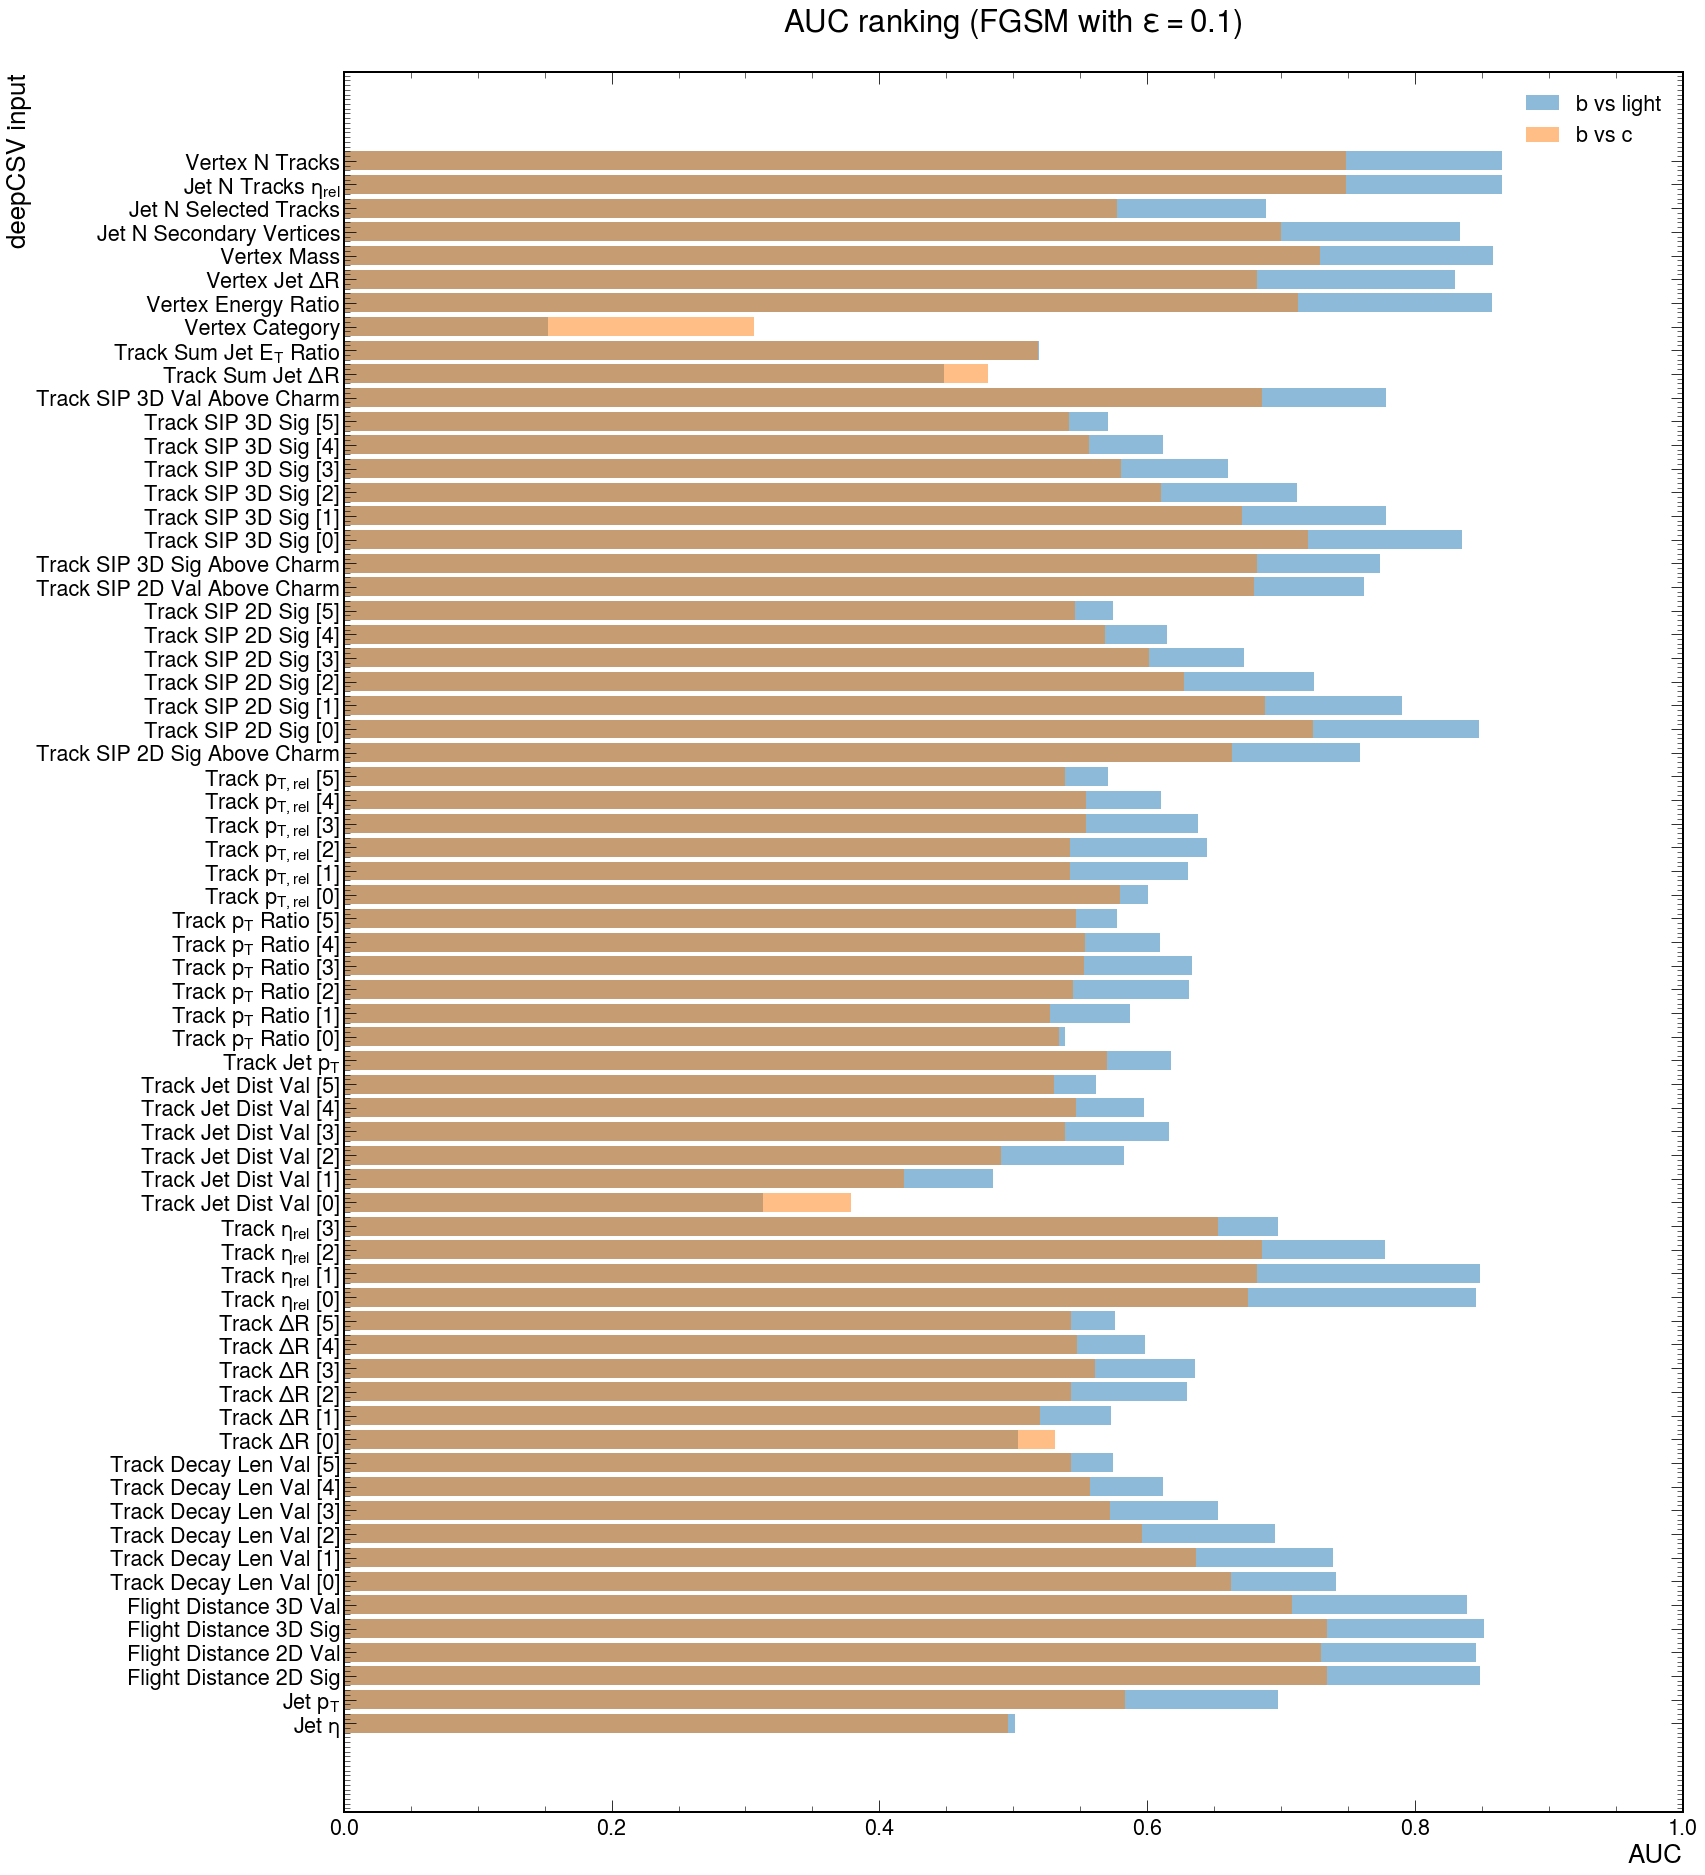

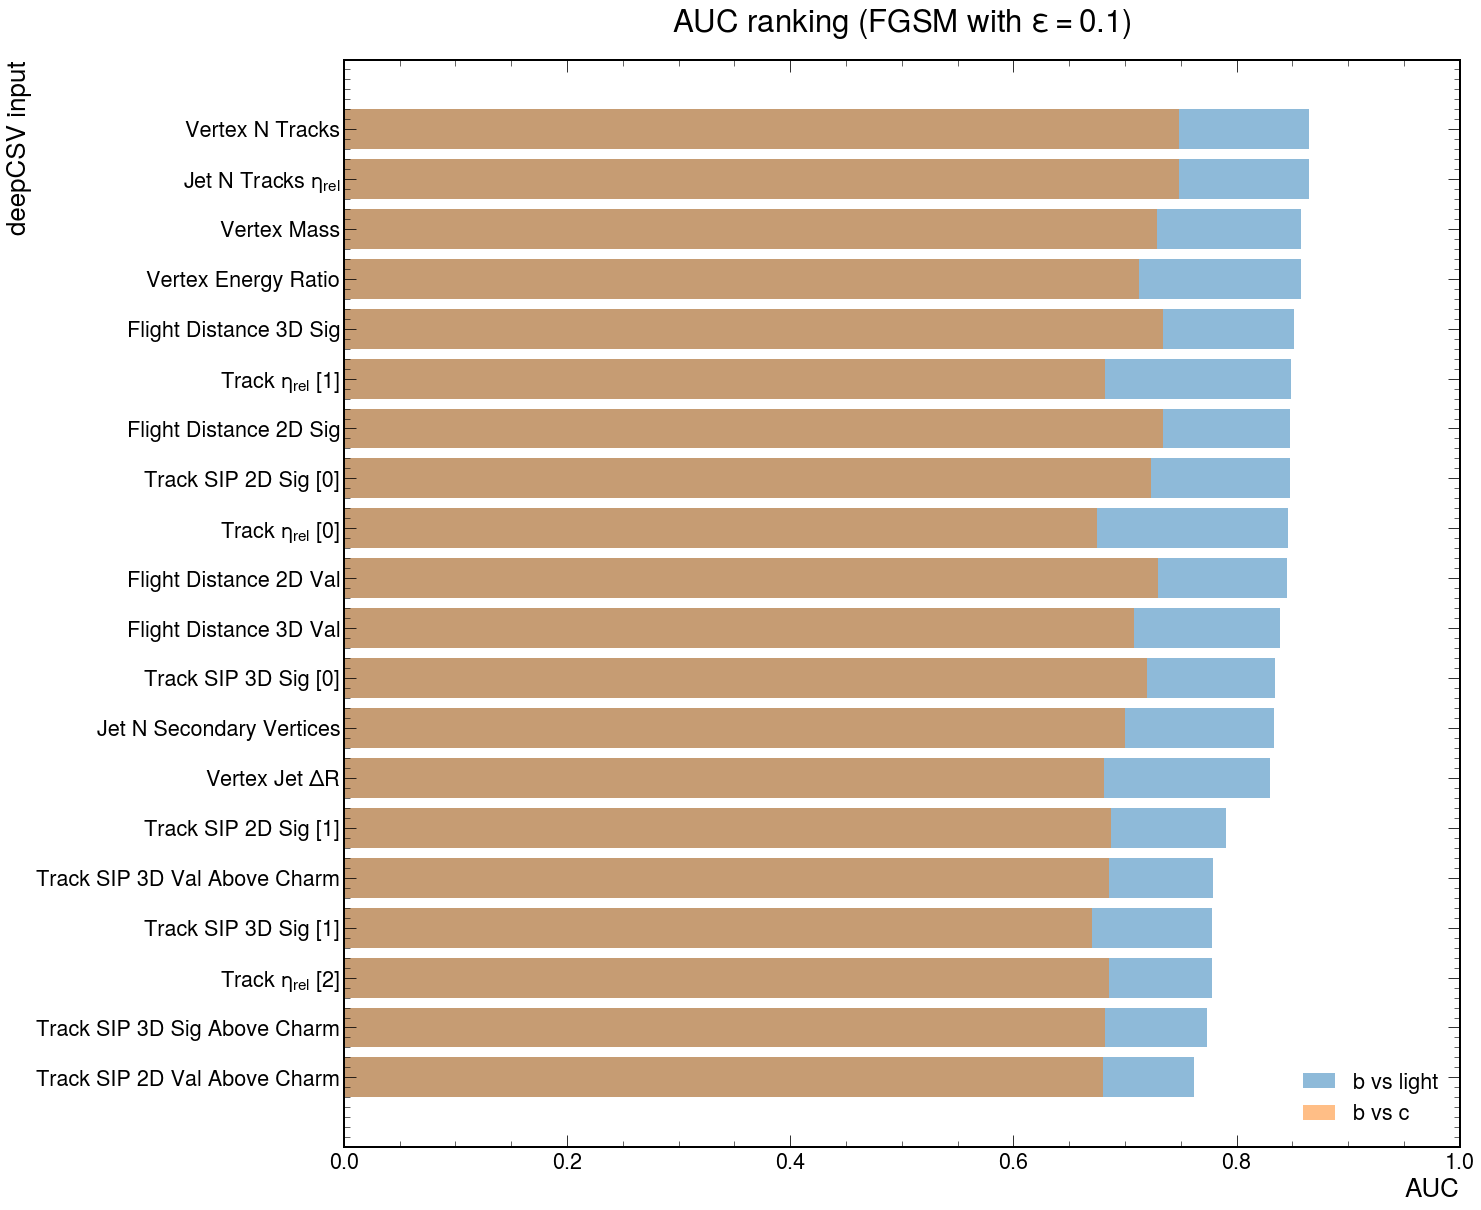

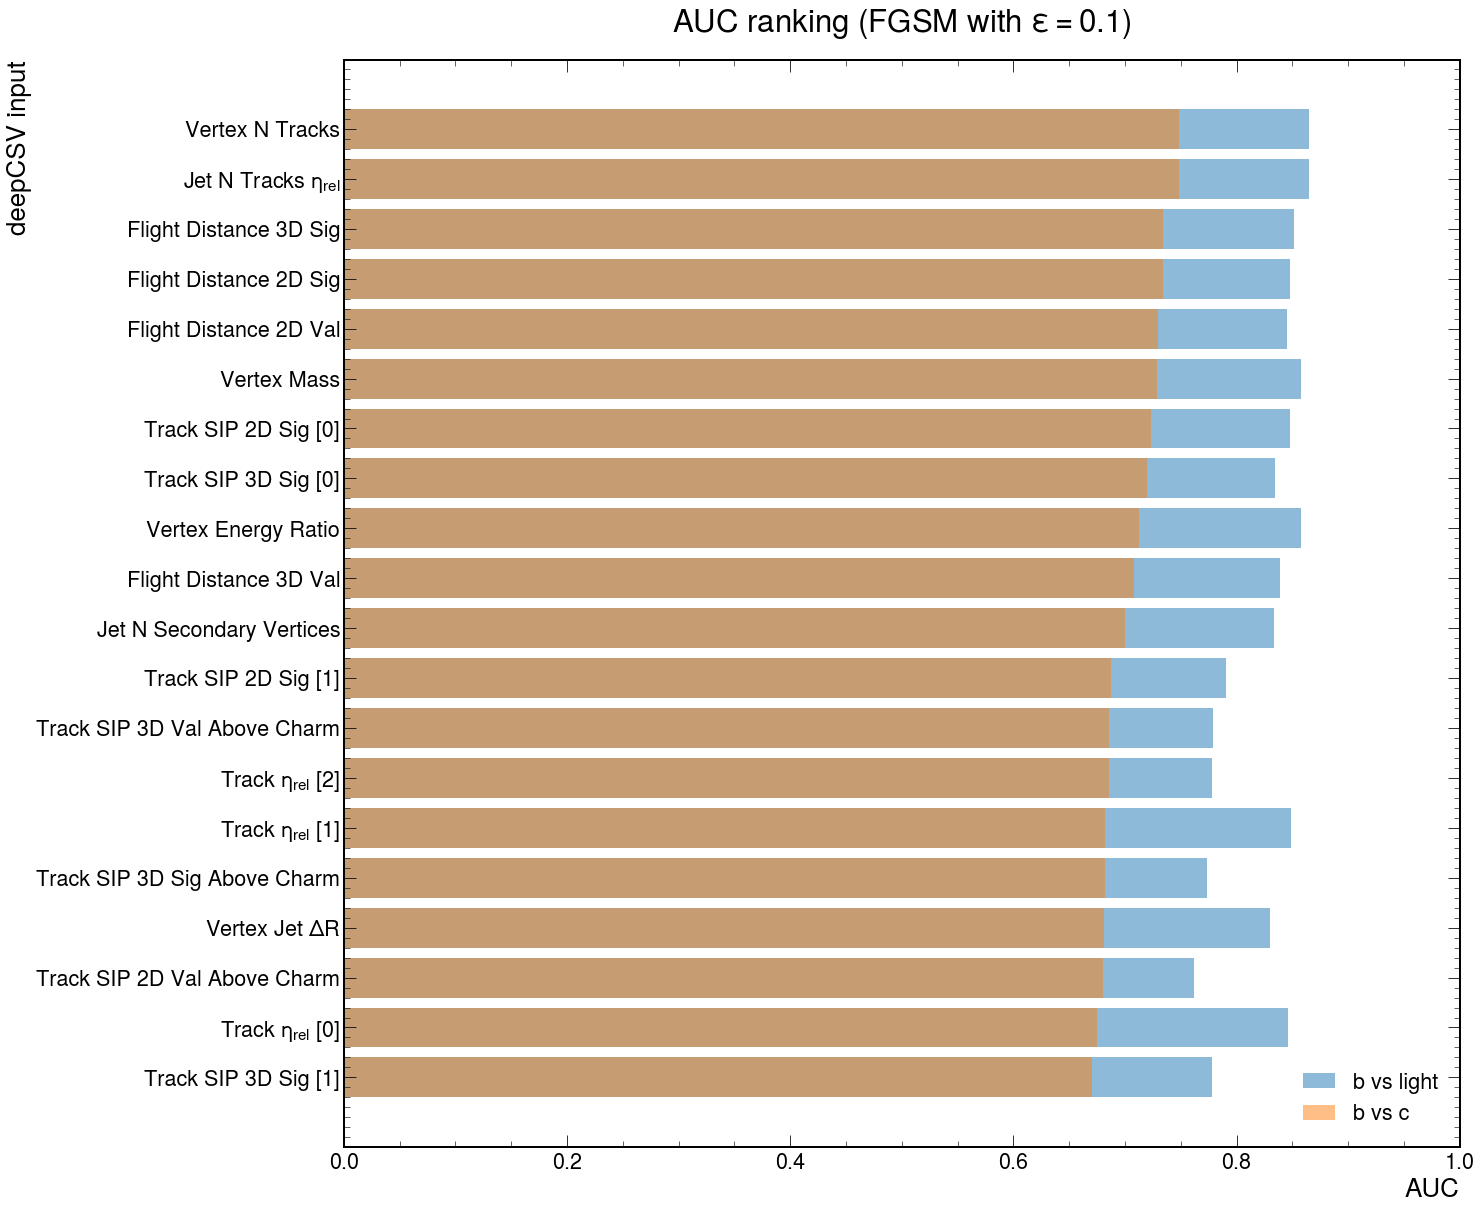

In [19]:
for x in dfs_fgsm:
    plot_ranking(dfs_fgsm[x],'FGSM',x)
    plot_sorted(dfs_fgsm[x].sort_values('auc_bvl'),'FGSM','bvl',x)
    plot_sorted(dfs_fgsm[x].sort_values('auc_bvc'),'FGSM','bvc',x)

In [20]:
noise_raw_0005_bvl = dfs_noise[0.005]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
noise_raw_0005_bvc = dfs_noise[0.005]['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [21]:
noise_raw_001_bvl = dfs_noise[0.01]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
noise_raw_001_bvc = dfs_noise[0.01]['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [22]:
noise_raw_005_bvl = dfs_noise[0.05]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
noise_raw_005_bvc = dfs_noise[0.05]['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [23]:
noise_raw_01_bvl = dfs_noise[0.1]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
noise_raw_01_bvc = dfs_noise[0.1]['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [90]:
fgsm_raw_0005_bvl = dfs_fgsm[0.005]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
fgsm_raw_0005_bvc = dfs_fgsm[0.005]['auc_bvc']/df_raw['auc_bvc'].to_numpy()
fgsm_raw_001_bvl = dfs_fgsm[0.01]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
fgsm_raw_001_bvc = dfs_fgsm[0.01]['auc_bvc']/df_raw['auc_bvc'].to_numpy()
fgsm_raw_005_bvl = dfs_fgsm[0.05]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
fgsm_raw_005_bvc = dfs_fgsm[0.05]['auc_bvc']/df_raw['auc_bvc'].to_numpy()
fgsm_raw_01_bvl = dfs_fgsm[0.1]['auc_bvl']/df_raw['auc_bvl'].to_numpy()
fgsm_raw_01_bvc = dfs_fgsm[0.1]['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [25]:
noise_raw_0005_bvl.describe()

count    67.000000
mean      0.999991
std       0.000046
min       0.999828
25%       0.999978
50%       0.999994
75%       1.000009
max       1.000186
Name: auc_bvl, dtype: float64

In [26]:
noise_raw_0005_bvc.describe()

count    67.000000
mean      0.999989
std       0.000032
min       0.999887
25%       0.999977
50%       0.999995
75%       1.000008
max       1.000062
Name: auc_bvc, dtype: float64

In [27]:
noise_raw_001_bvl.describe()

count    67.000000
mean      0.999955
std       0.000127
min       0.999427
25%       0.999933
50%       0.999991
75%       1.000006
max       1.000281
Name: auc_bvl, dtype: float64

In [28]:
noise_raw_001_bvc.describe()

count    67.000000
mean      0.999963
std       0.000076
min       0.999709
25%       0.999928
50%       0.999983
75%       1.000005
max       1.000100
Name: auc_bvc, dtype: float64

In [29]:
noise_raw_005_bvl.describe()

count    67.000000
mean      0.999170
std       0.002019
min       0.991446
25%       0.998640
50%       0.999940
75%       1.000023
max       1.006002
Name: auc_bvl, dtype: float64

In [30]:
noise_raw_005_bvc.describe()

count    67.000000
mean      0.999328
std       0.001342
min       0.994862
25%       0.999125
50%       0.999851
75%       1.000012
max       1.002252
Name: auc_bvc, dtype: float64

In [31]:
noise_raw_01_bvl.describe()

count    67.000000
mean      0.997526
std       0.005999
min       0.977328
25%       0.996204
50%       0.999772
75%       1.000031
max       1.019732
Name: auc_bvl, dtype: float64

In [32]:
noise_raw_01_bvc.describe()

count    67.000000
mean      0.997869
std       0.004177
min       0.984341
25%       0.996904
50%       0.999587
75%       1.000008
max       1.007974
Name: auc_bvc, dtype: float64

In [91]:
fgsm_raw_0005_bvl.describe()

count    67.000000
mean      0.999649
std       0.001567
min       0.993683
25%       0.998866
50%       0.999832
75%       1.000359
max       1.003553
Name: auc_bvl, dtype: float64

In [92]:
fgsm_raw_0005_bvc.describe()

count    67.000000
mean      0.999322
std       0.001779
min       0.992890
25%       0.998543
50%       0.999631
75%       1.000253
max       1.003387
Name: auc_bvc, dtype: float64

In [95]:
fgsm_raw_001_bvl.describe()

count    67.000000
mean      0.999364
std       0.002255
min       0.993521
25%       0.998207
50%       0.999626
75%       1.000455
max       1.007075
Name: auc_bvl, dtype: float64

In [96]:
fgsm_raw_001_bvc.describe()

count    67.000000
mean      0.998752
std       0.002816
min       0.990371
25%       0.997332
50%       0.999347
75%       1.000454
max       1.003830
Name: auc_bvc, dtype: float64

In [97]:
fgsm_raw_005_bvl.describe()

count    67.000000
mean      0.997101
std       0.008518
min       0.974045
25%       0.992283
50%       0.998075
75%       1.000750
max       1.034499
Name: auc_bvl, dtype: float64

In [98]:
fgsm_raw_005_bvc.describe()

count    67.000000
mean      0.994514
std       0.011132
min       0.961834
25%       0.987902
50%       0.997559
75%       1.001304
max       1.018560
Name: auc_bvc, dtype: float64

In [99]:
fgsm_raw_01_bvl.describe()

count    67.000000
mean      0.994285
std       0.016186
min       0.954001
25%       0.987446
50%       0.996140
75%       1.001254
max       1.066362
Name: auc_bvl, dtype: float64

In [100]:
fgsm_raw_01_bvc.describe()

count    67.000000
mean      0.989566
std       0.020690
min       0.932425
25%       0.977229
50%       0.995459
75%       1.002435
max       1.035403
Name: auc_bvc, dtype: float64

In [35]:
jetINDEX = [0,1,28,41,48,49,56,57,58,59,63,64,65] 
trackINDEX = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,50,51,52,53,54,55,]
svINDEX = [2,3,4,5,60,61,62,66]

In [36]:
display_names = ['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks']

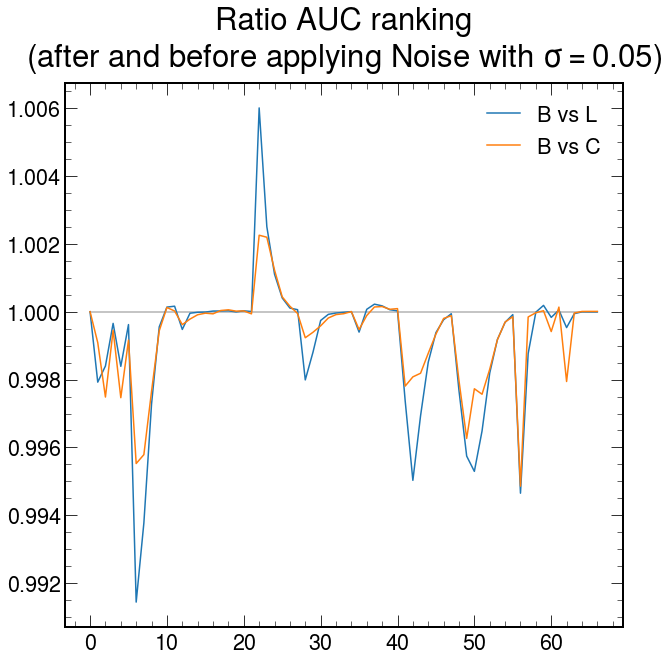

In [37]:
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.plot(noise_raw_005_bvl, label='B vs L')
plt.plot(noise_raw_005_bvc, label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying Noise with $\sigma=0.05$)', y=1.02)
plt.legend()
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_prototype_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

In [52]:
taggerouts = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_49_MODE_raw_CUSTOM_TAGGER_OUT.pkl')

In [53]:
taggerouts

input_name   auc_bvl  auc_bvc
0        Raw  0.841509  0.76543

In [49]:
taggerouts_noise = {}
param = [0.005,
         0.01,
         0.05,
         0.1]
for p in param:
    taggerouts_noise[p] = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_25_MODE_noise_CUSTOM_TAGGER_OUT_PARAM_{p}.pkl')

In [56]:
taggerouts_noise

{0.005:              input_name   auc_bvl   auc_bvc
 0  Noise $\sigma=0.005$  0.841389  0.765278,
 0.01:             input_name   auc_bvl   auc_bvc
 0  Noise $\sigma=0.01$  0.841387  0.765276,
 0.05:             input_name  auc_bvl   auc_bvc
 0  Noise $\sigma=0.05$  0.84128  0.765233,
 0.1:            input_name   auc_bvl   auc_bvc
 0  Noise $\sigma=0.1$  0.840977  0.765119}

In [55]:
taggerouts_noise[0.005]

input_name   auc_bvl   auc_bvc
0  Noise $\sigma=0.005$  0.841389  0.765278

In [50]:
taggerouts_FGSM = {}
paramFGSM = [0.005,
         0.01,
         0.05,
         0.1]
for p in paramFGSM:
    taggerouts_FGSM[p] = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_25_MODE_FGSM_CUSTOM_TAGGER_OUT_PARAM_{p}.pkl')

In [57]:
taggerouts_FGSM

{0.005:               input_name   auc_bvl   auc_bvc
 0  FGSM $\epsilon=0.005$  0.839823  0.763188,
 0.01:              input_name   auc_bvl   auc_bvc
 0  FGSM $\epsilon=0.01$  0.838186  0.761074,
 0.05:              input_name   auc_bvl   auc_bvc
 0  FGSM $\epsilon=0.05$  0.823014  0.744023,
 0.1:             input_name   auc_bvl   auc_bvc
 0  FGSM $\epsilon=0.1$  0.799216  0.724463}

In [74]:
1 / (taggerouts['auc_bvl'] / taggerouts_FGSM[0.1]['auc_bvl'])

0    0.949742
Name: auc_bvl, dtype: float64

# Plots for comparison of Raw and disturbed AUC
## Both for individual inputs ('taggers') and a custom tagger (a trained model that used TT samples with -999 default bin)

How to get the AUC ranking:
```python
inputs = inputs.transpose()  # because I created them iteratively for each input variable, can be the raw, noise, or FGSM inputs of one variable at a time
inputs = np.c_[inputs, flav]  # add the true flavour as 'column' (1,2,3,4)

bvl = inputs[inputs[:,-1] != 3]  # all those that are NOT c jets
y_true_bvl = bvl[:,-1] != 4  # true if NOT light jet, false otherwise
y_pred_bvl = bvl[:,0]  # the content of the variable of interest (always the first column, because inputs only has this one in the first place)

bvc = inputs[inputs[:,-1] != 4]  # all those that are NOT light jets
y_true_bvc = bvc[:,-1] != 3  # true if NOT c jet, false otherwise
y_pred_bvc = bvc[:,0]

auc_bvl = roc_auc_score(y_true_bvl, y_pred_bvl)  # uses truth information and compares with "predictions" (not really a prediction, rather a value for the given input variable)
auc_bvc = roc_auc_score(y_true_bvc, y_pred_bvc)
```
For the custom tagger, the evaluation will be done as follows (example: BvL).
```python
adv_inputs = fgsm_attack(param,test_inputs,test_targets,reduced=True).cpu()  # create adversarial samples

adv_bvl = torch.cat((adv_inputs[jetFlavour==1],adv_inputs[jetFlavour==2],adv_inputs[jetFlavour==4]))  # restrict to b, bb and light jets
y_true_bvl = torch.cat((test_targets[jetFlavour==1],test_targets[jetFlavour==2],test_targets[jetFlavour==4]))  # get the corresponding labels

with torch.no_grad():  # no gradients are needed after the model has been used to create the adversarial samples, just eval-mode here
    y_pred_bvl = model(adv_bvl).detach().numpy()  # evaluate model on distorted inputs

fpr,tpr,_ = metrics.roc_curve([(1 if y_true_bvl[i]==0 or y_true_bvl[i]==1 else 0) for i in range(len(y_true_bvl))], (y_pred_bvl[:,0]+y_pred_bvl[:,1]))  # assign 1 if true flavour is b or bb, and as BvL discriminator, use the sum of the predicted probabilities for b and bb
auc_bvl = metrics.auc(fpr,tpr)  # get the area under the ROC-curve

```

In [63]:
allinputnames = pd.concat([df_raw['input_name'], taggerouts['input_name']],  ignore_index=True, sort=False)

In [88]:
def ratio_plotter(mode, param):
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(24, 12),sharex=True,gridspec_kw={'height_ratios':[5,5],'hspace':0})
    ax1.set_ylabel('AUC')
    ax1.set_ylim([0, 1])
    
    ax1.scatter(x=allinputnames,y=pd.concat([df_raw['auc_bvl'], taggerouts['auc_bvl']],  ignore_index=True, sort=False), alpha=0.5,label=r'B vs L, raw')
    ax1.scatter(x=allinputnames,y=pd.concat([df_raw['auc_bvc'], taggerouts['auc_bvc']],  ignore_index=True, sort=False), alpha=0.5,label=r'B vs C, raw')
    
    if mode == 'noise':
        fig.suptitle(f'Ratio AUC ranking\n(after and before applying Noise with $\sigma={param}$)', y=1.01)
        ax2.set_ylabel(f'Ratio AUC Noise/Raw')
        ax2.scatter(x=allinputnames,y=pd.concat([dfs_noise[param]['auc_bvl'], taggerouts_noise[param]['auc_bvl']], ignore_index=True, sort=False)/pd.concat([df_raw['auc_bvl'], taggerouts['auc_bvl']],  ignore_index=True, sort=False), alpha=0.5,label=f'B vs L, $\sigma={param}$  /  raw')
        ax2.scatter(x=allinputnames,y=pd.concat([dfs_noise[param]['auc_bvc'], taggerouts_noise[param]['auc_bvc']], ignore_index=True, sort=False)/pd.concat([df_raw['auc_bvc'], taggerouts['auc_bvc']],  ignore_index=True, sort=False), alpha=0.5,label=f'B vs C, $\sigma={param}$  /  raw')
        ax1.scatter(x=allinputnames,y=pd.concat([dfs_noise[param]['auc_bvl'], taggerouts_noise[param]['auc_bvl']], ignore_index=True, sort=False), alpha=0.5,label=f'B vs L, $\sigma={param}$', marker="+")
        ax1.scatter(x=allinputnames,y=pd.concat([dfs_noise[param]['auc_bvc'], taggerouts_noise[param]['auc_bvc']], ignore_index=True, sort=False), alpha=0.5,label=f'B vs C, $\sigma={param}$', marker="+")
    else:
        fig.suptitle(f'Ratio AUC ranking\n(after and before applying FGSM with $\epsilon={param}$)', y=1.01)
        ax2.set_ylabel(f'Ratio AUC FGSM/Raw')
        ax2.scatter(x=allinputnames,y=pd.concat([dfs_fgsm[param]['auc_bvl'], taggerouts_FGSM[param]['auc_bvl']], ignore_index=True, sort=False)/pd.concat([df_raw['auc_bvl'], taggerouts['auc_bvl']],  ignore_index=True, sort=False), alpha=0.5,label=f'B vs L, $\epsilon={param}$  /  raw')
        ax2.scatter(x=allinputnames,y=pd.concat([dfs_fgsm[param]['auc_bvc'], taggerouts_FGSM[param]['auc_bvc']], ignore_index=True, sort=False)/pd.concat([df_raw['auc_bvc'], taggerouts['auc_bvc']],  ignore_index=True, sort=False), alpha=0.5,label=f'B vs C, $\epsilon={param}$  /  raw')
        ax1.scatter(x=allinputnames,y=pd.concat([dfs_fgsm[param]['auc_bvl'], taggerouts_FGSM[param]['auc_bvl']], ignore_index=True, sort=False), alpha=0.5,label=f'B vs L, $\epsilon={param}$', marker="+")
        ax1.scatter(x=allinputnames,y=pd.concat([dfs_fgsm[param]['auc_bvc'], taggerouts_FGSM[param]['auc_bvc']], ignore_index=True, sort=False), alpha=0.5,label=f'B vs C, $\epsilon={param}$', marker="+")
        
    
    ax1.plot(np.ones(68)*.5, alpha=.2, color='black')
    ax2.plot(np.ones(68), alpha=.2, color='black')
    ticksX = np.arange(68)
    #ticksY = np.arange(2) + 0.5
    ax2.set_xticks(ticksX)
    #ax2.set_xticks(ticksX, minor=True)
    #ax2.set_xticks(np.arange(0,68,5))
    ax2.set_xticklabels(display_names + ['Custom Tagger'], rotation=90, fontsize=8)
    ax2.get_xticklabels()[-1].set_weight("bold")
    #ax2.set_xticklabels(display_names + ['Custom Tagger'], rotation=90, fontsize=8,minor=True)
    ax2.set_ylim([0.93, 1.07])
    #ax.xaxis.set_ticks_position('none') 
    ax1.tick_params(axis='x',which='minor',bottom=False,top=False)
    ax2.tick_params(axis='x',which='minor',bottom=False,top=False)
    ax1.legend()
    ax2.legend(loc='upper left')
    plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_VALUES_RATIO_NFiles_{NUM_DATASETS}_MODE_{mode}_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    plt.show()

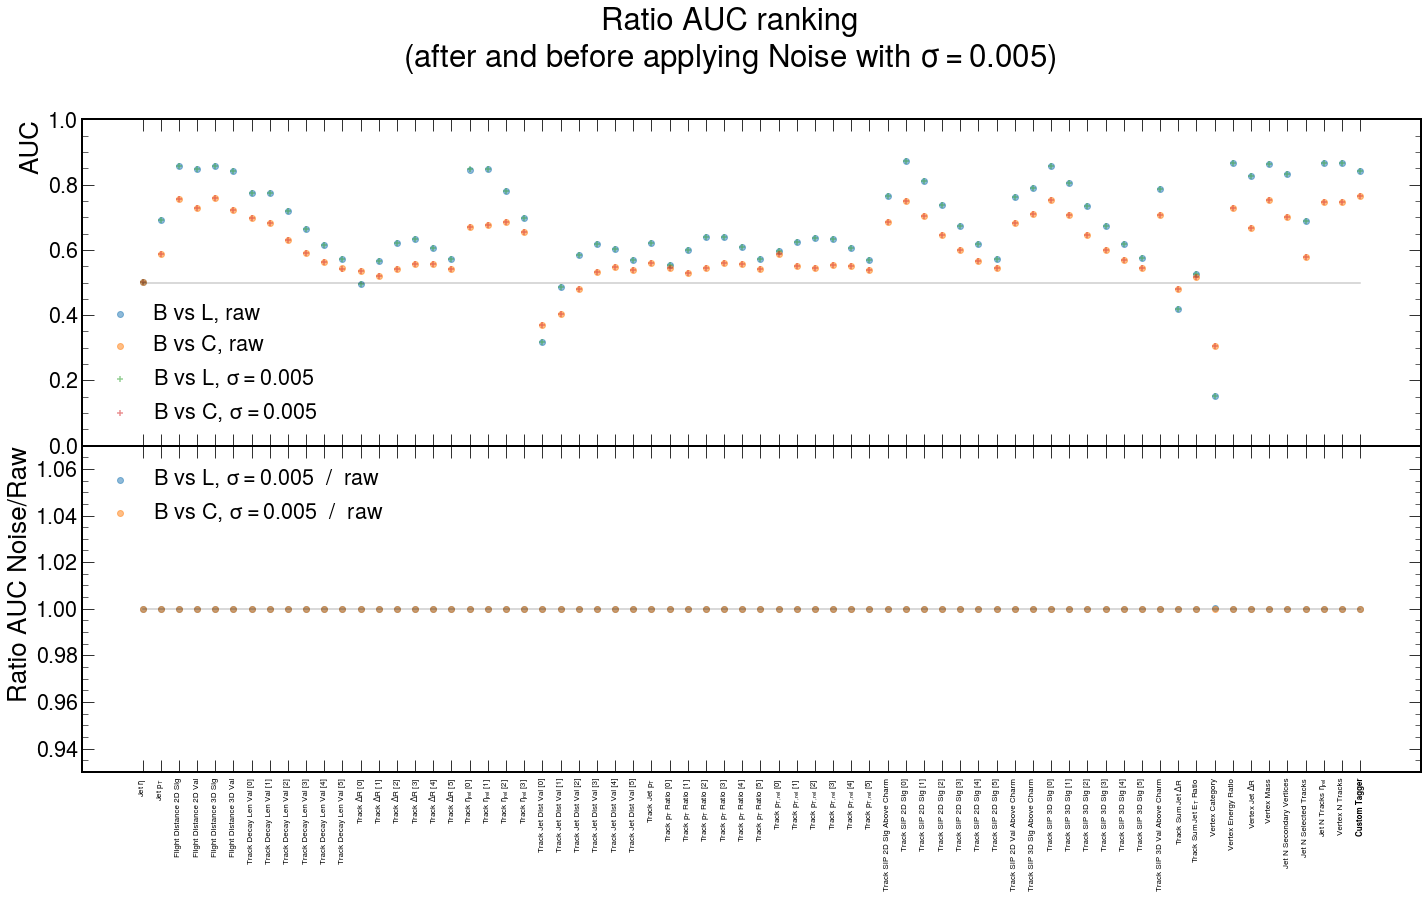

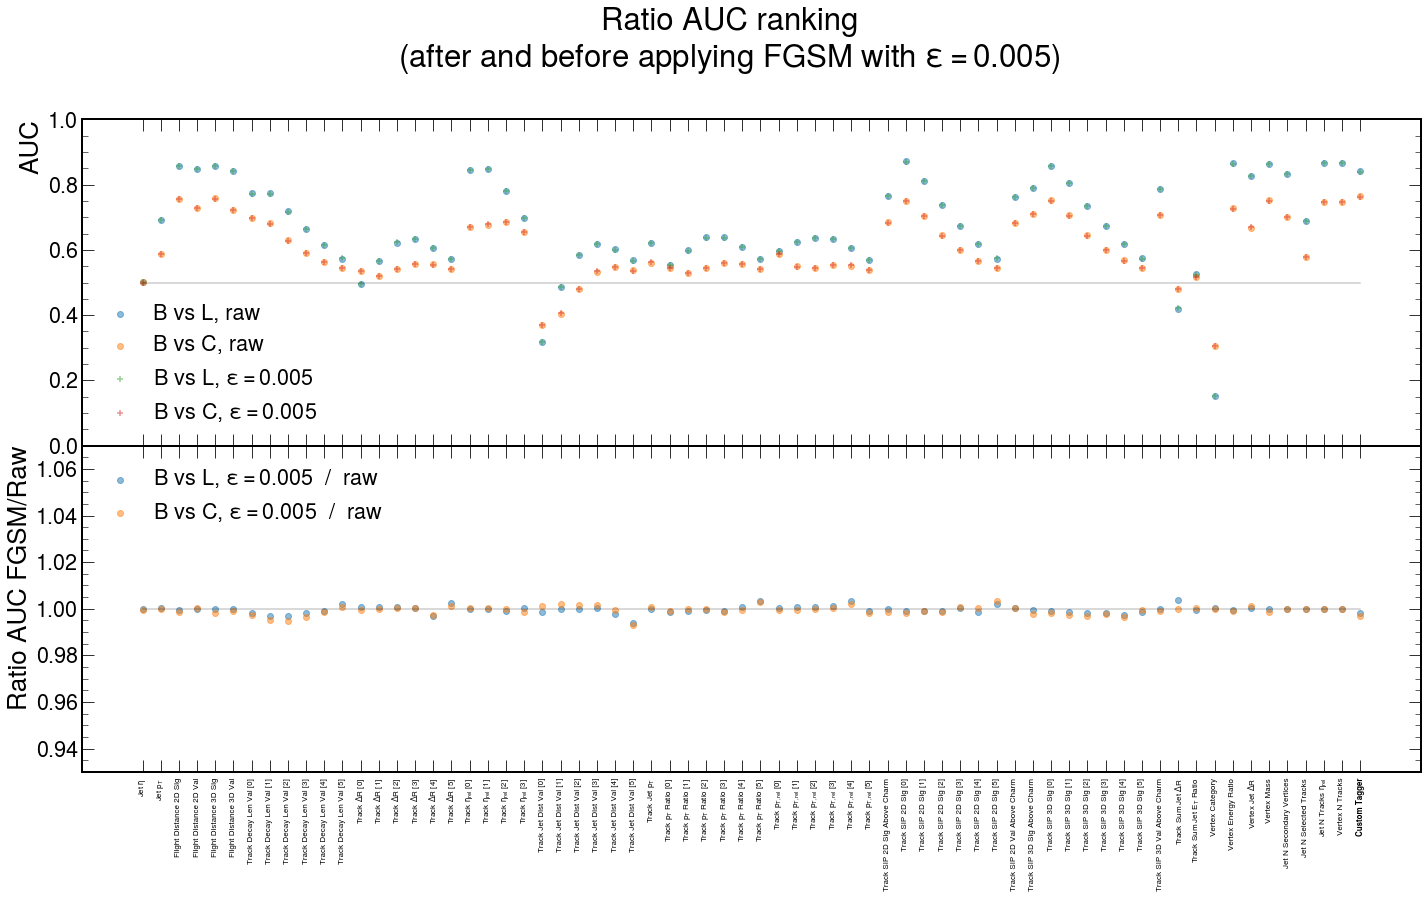

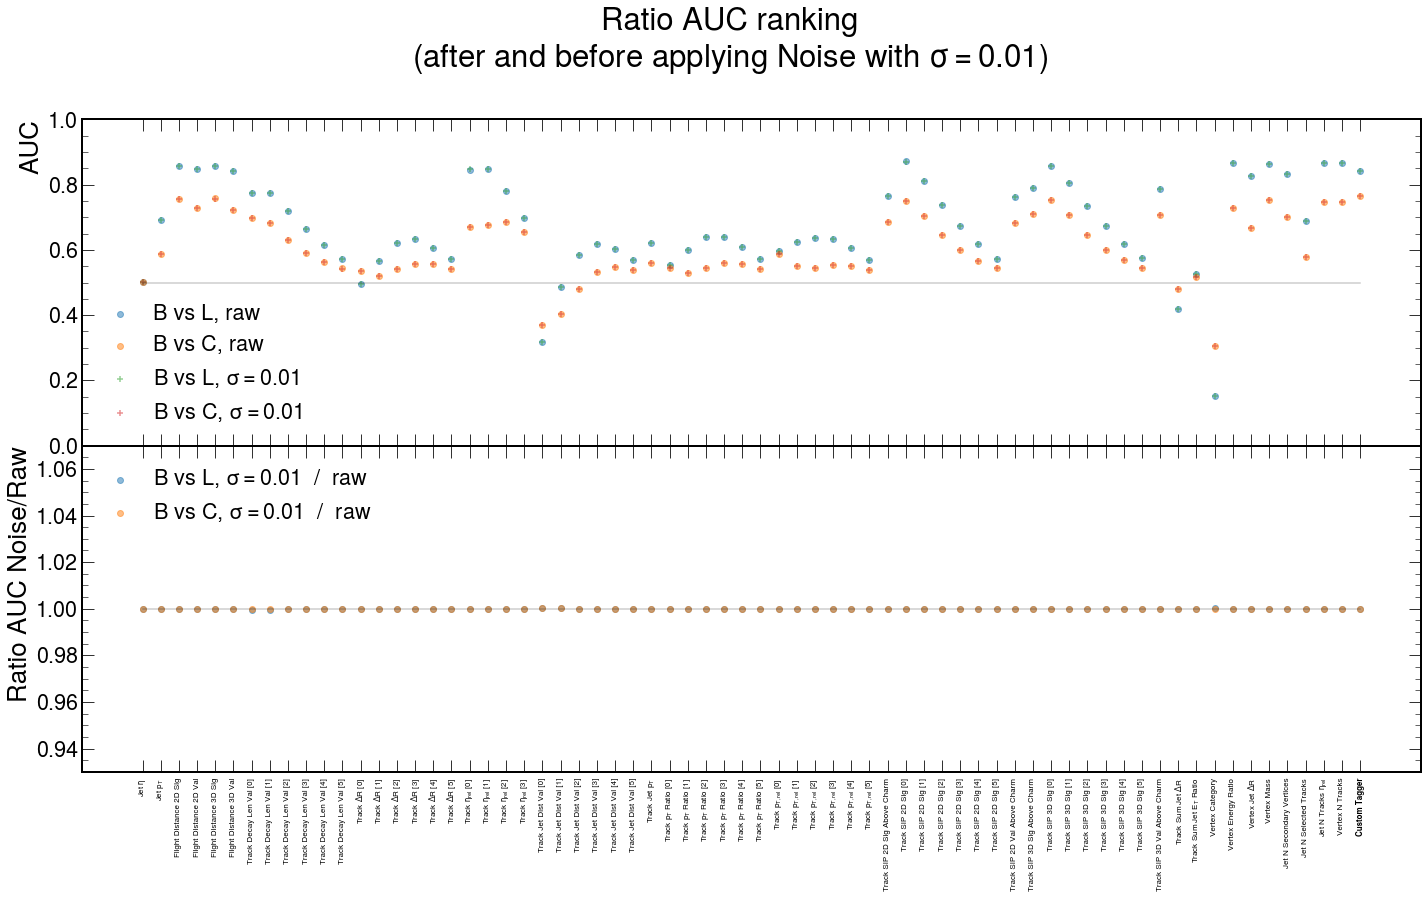

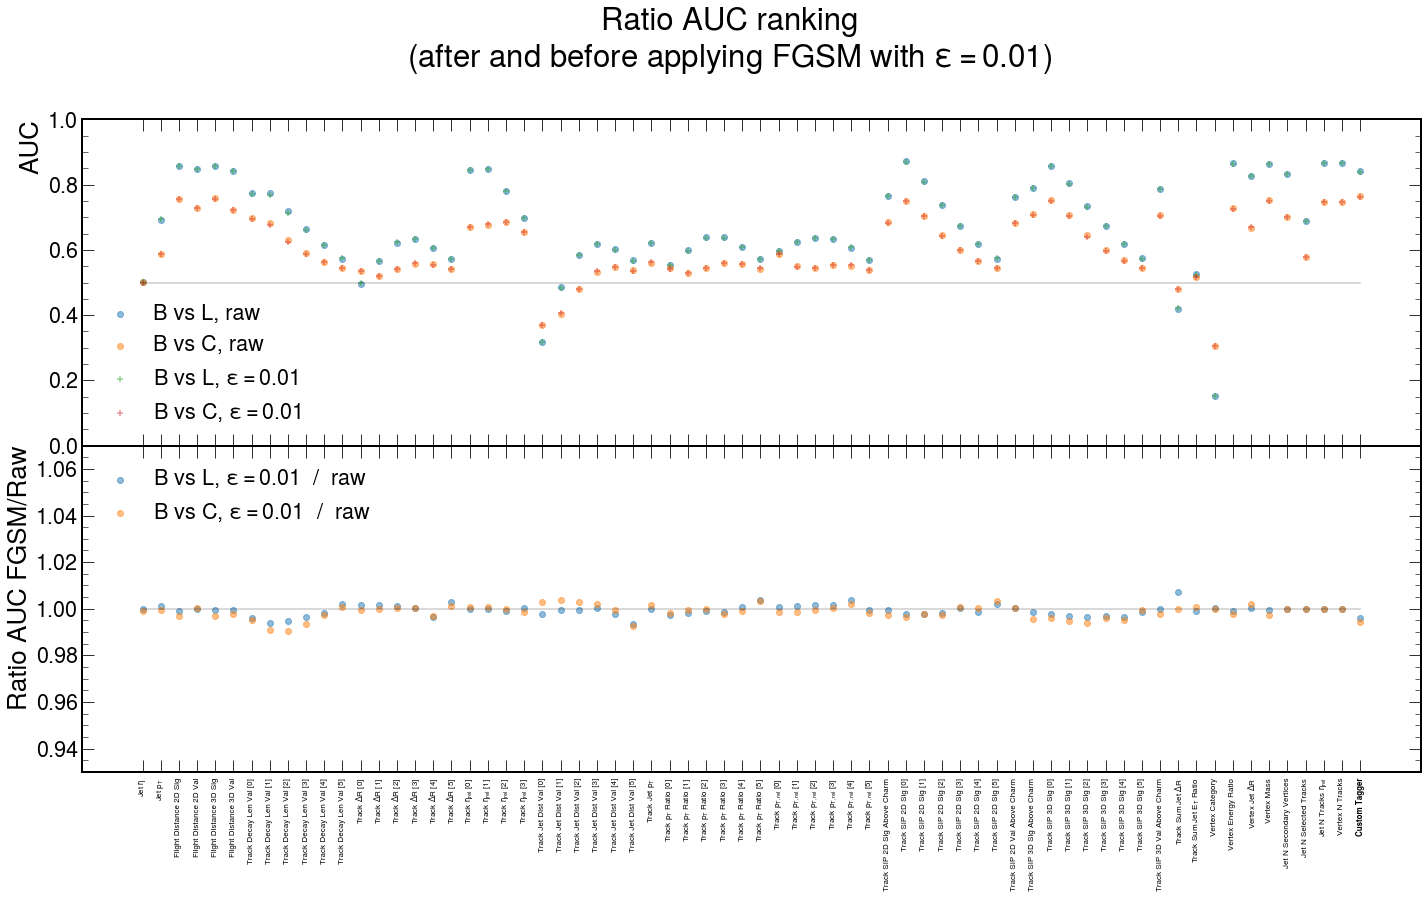

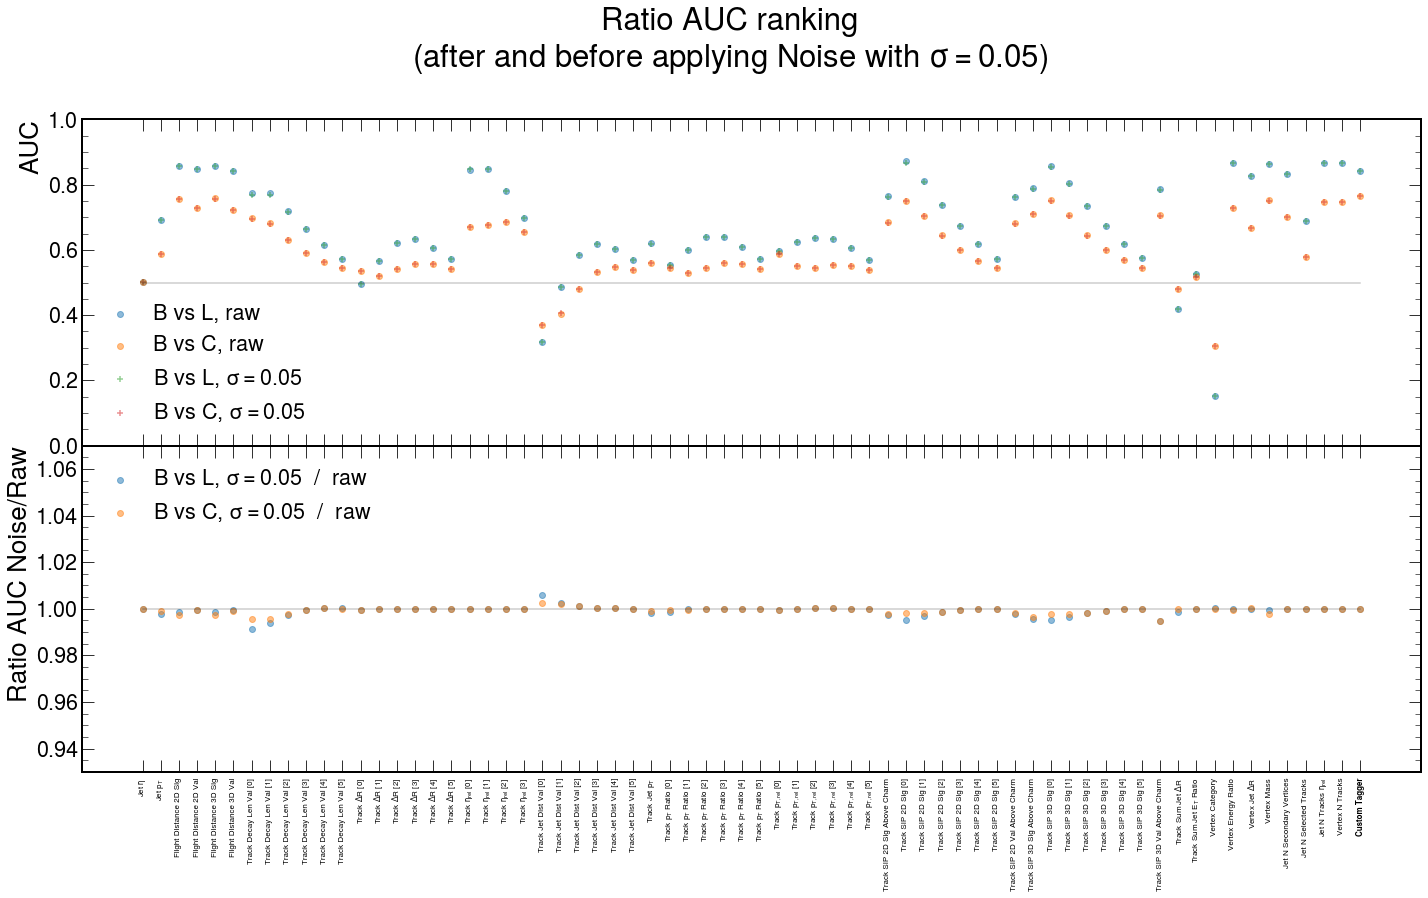

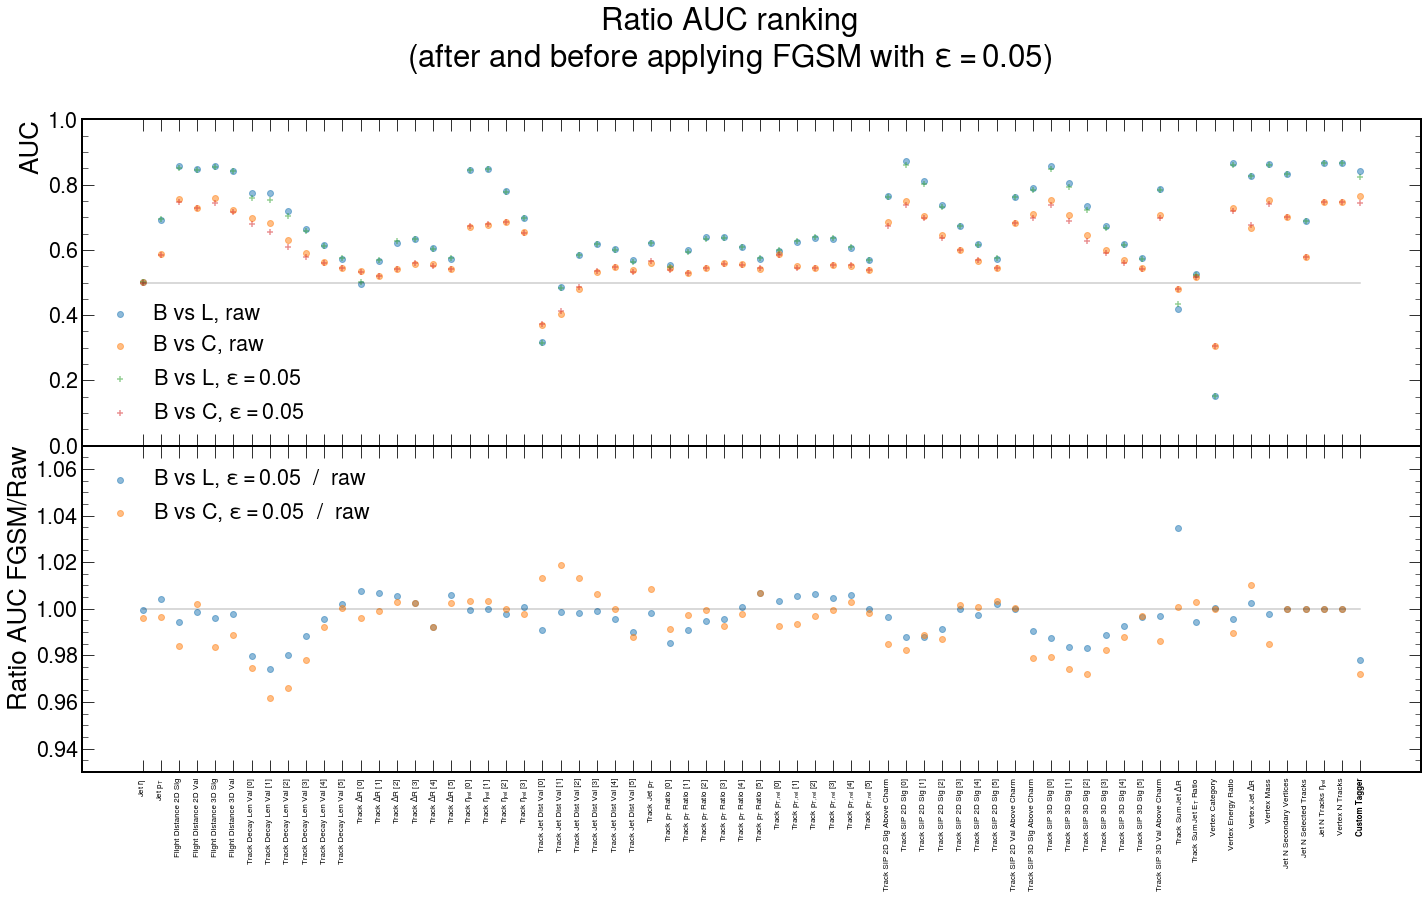

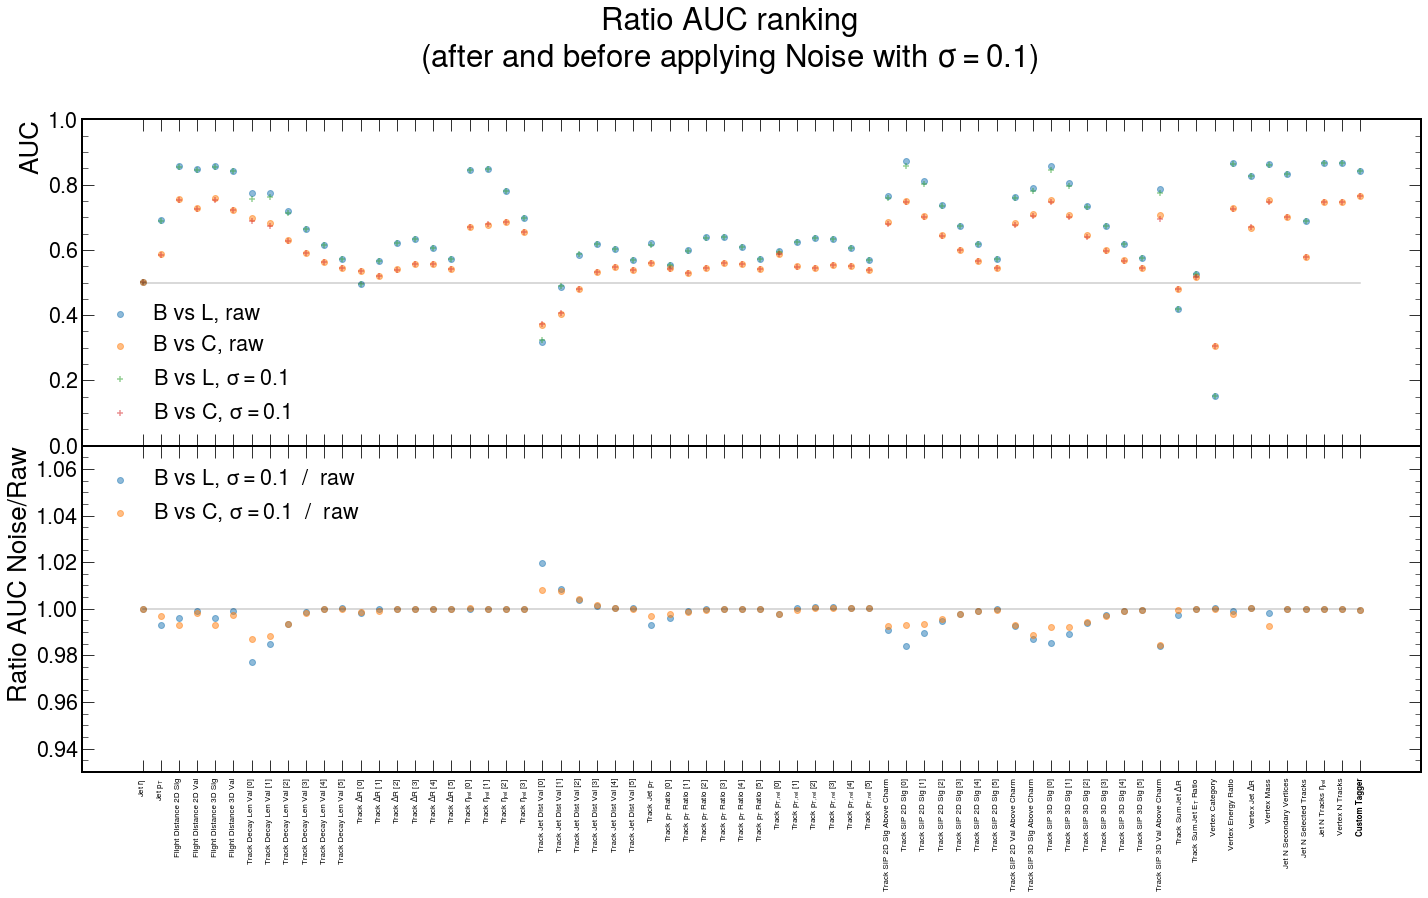

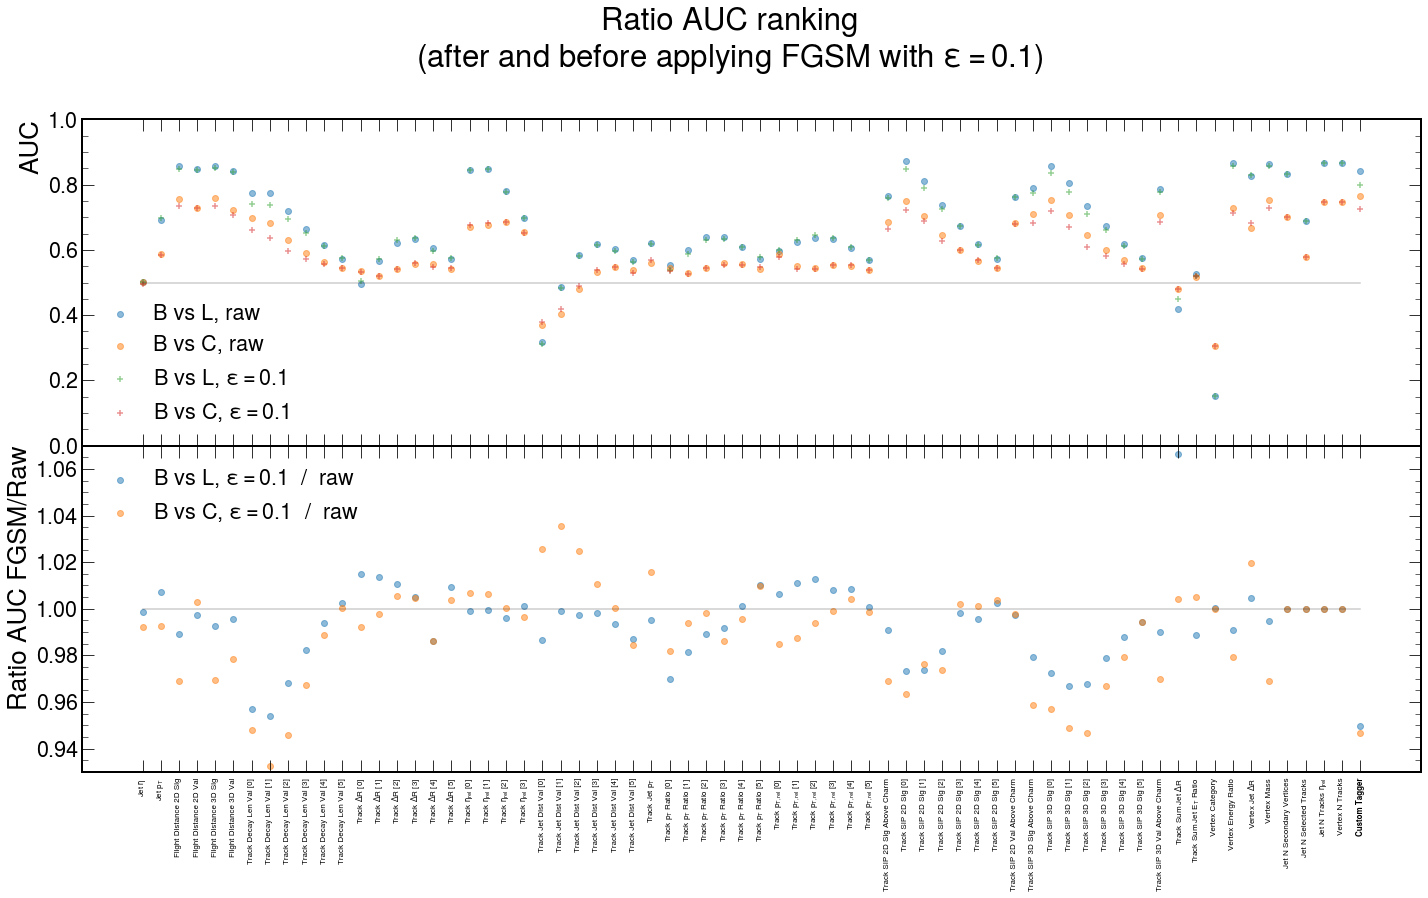

In [89]:
for p in param:
    ratio_plotter('noise', p)
    ratio_plotter('FGSM', p)

# A bunch of old versions of these plots

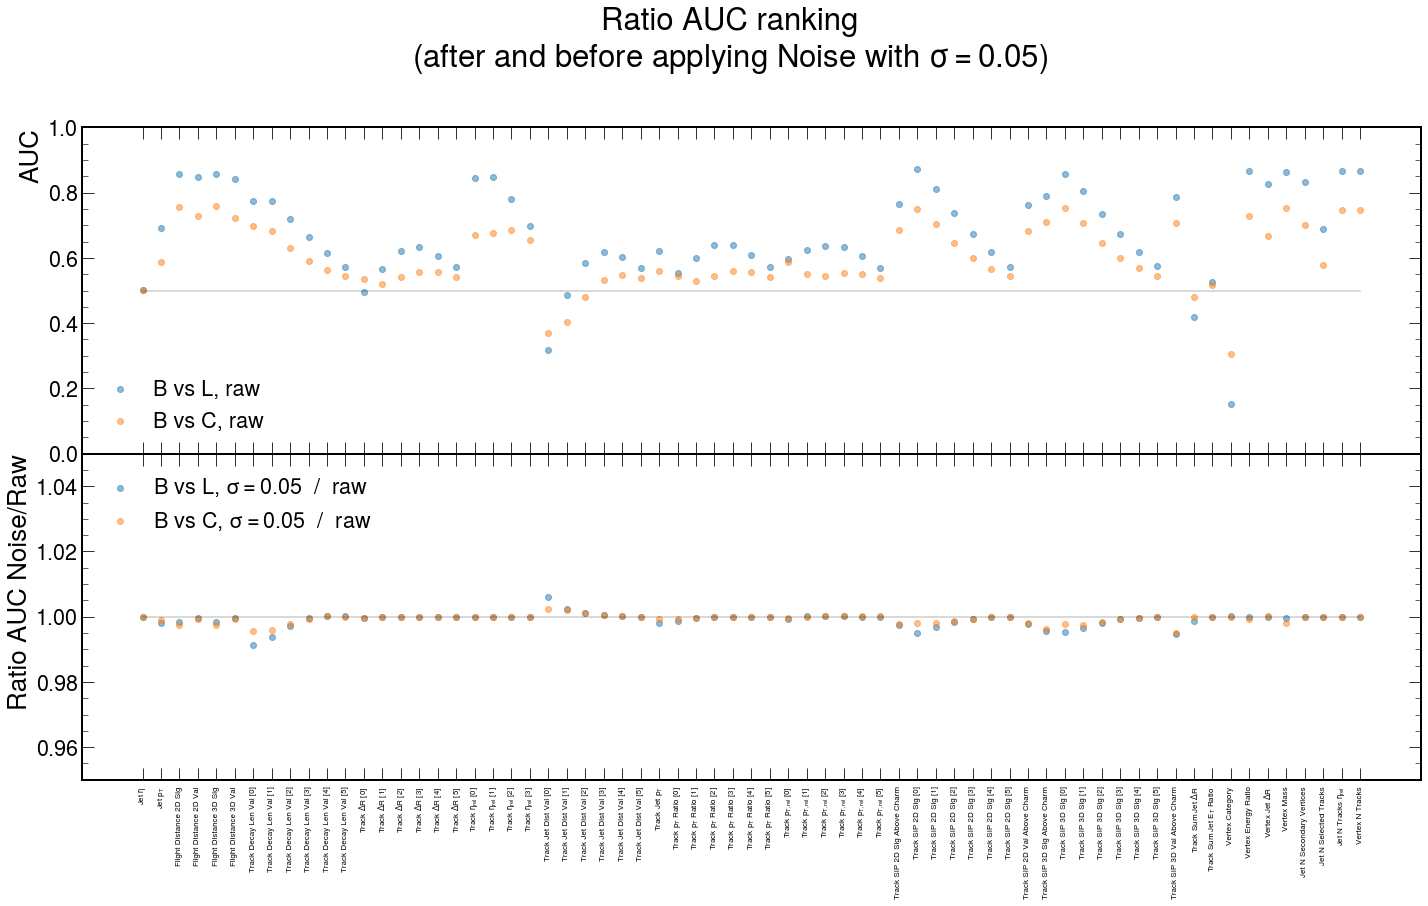

In [43]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(24, 12),sharex=True,gridspec_kw={'height_ratios':[5,5],'hspace':0})
ax1.set_ylabel('AUC')
ax1.set_ylim([0, 1])
#ax1.scatter(x=df_raw['input_name'],y=dfs_noise[0.05]['auc_bvl'], alpha=0.5,label=r'B vs L, $\sigma=0.05$')
#ax1.scatter(x=df_raw['input_name'],y=dfs_noise[0.05]['auc_bvc'], alpha=0.5,label=r'B vs C, $\sigma=0.05$')
ax1.scatter(x=df_raw['input_name'],y=df_raw['auc_bvl'], alpha=0.5,label=r'B vs L, raw')
ax1.scatter(x=df_raw['input_name'],y=df_raw['auc_bvc'], alpha=0.5,label=r'B vs C, raw')
ax1.plot(np.ones(67)*.5, alpha=.2, color='black')
ax2.plot(np.ones(67), alpha=.2, color='black')
ax2.scatter(x=df_raw['input_name'],y=noise_raw_005_bvl, alpha=0.5,label=r'B vs L, $\sigma=0.05$  /  raw')
ax2.scatter(x=df_raw['input_name'],y=noise_raw_005_bvc, alpha=0.5,label=r'B vs C, $\sigma=0.05$  /  raw')
ax2.set_ylabel('Ratio AUC Noise/Raw')
fig.suptitle(f'Ratio AUC ranking\n(after and before applying Noise with $\sigma=0.05$)', y=1.02)
ticksX = np.arange(67)
#ticksY = np.arange(2) + 0.5
ax2.set_xticks(ticksX)
ax2.set_xticklabels(display_names, rotation=90, fontsize=8)
ax2.set_ylim([0.95, 1.05])
#ax.xaxis.set_ticks_position('none') 
ax1.tick_params(axis='x',which='minor',bottom=False,top=False)
ax2.tick_params(axis='x',which='minor',bottom=False,top=False)
ax1.legend()
ax2.legend(loc='upper left')
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

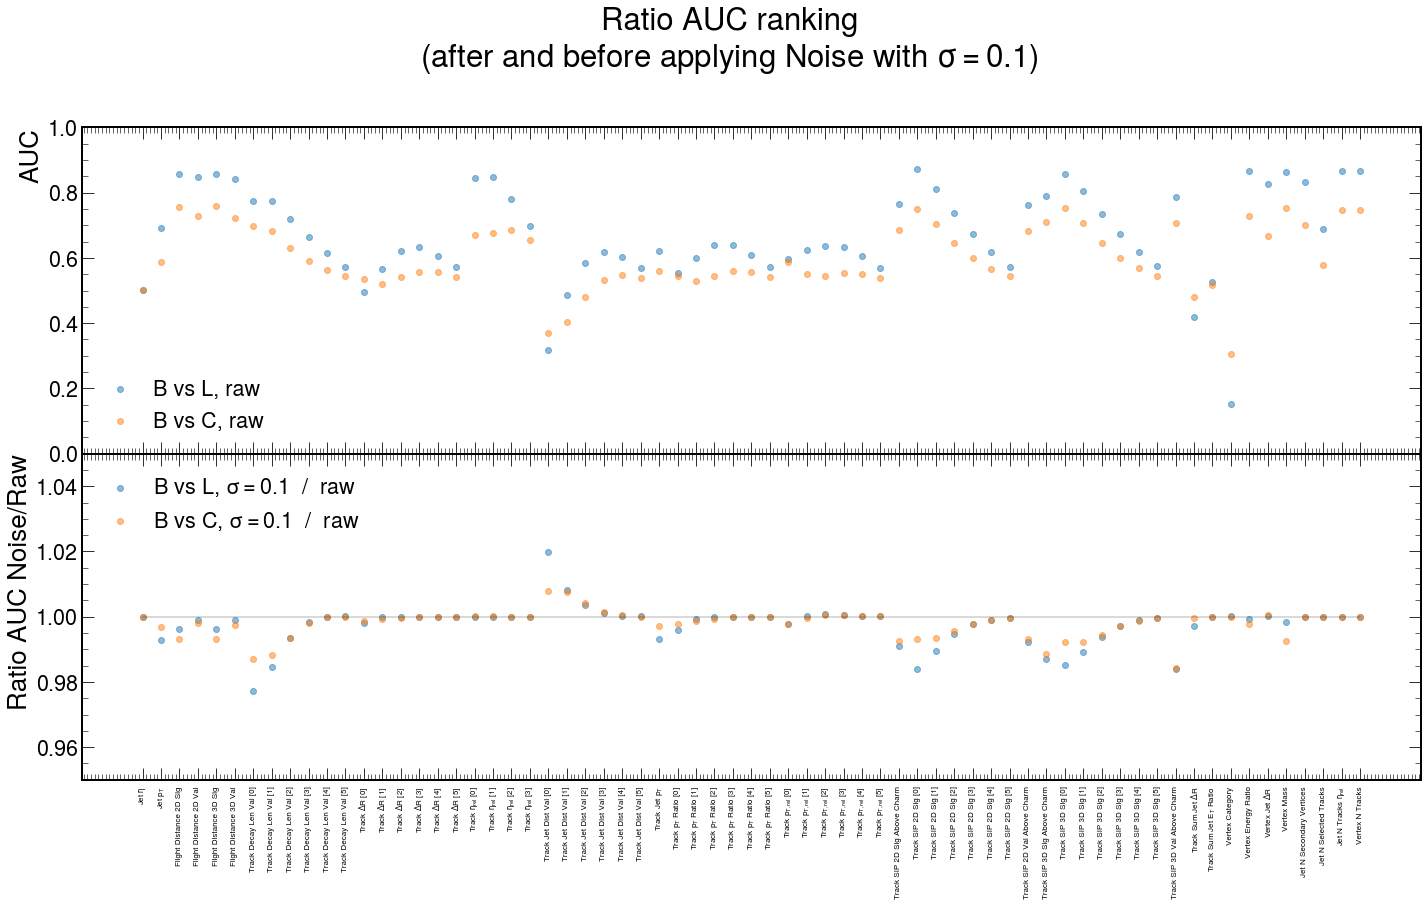

In [112]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(24, 12),sharex=True,gridspec_kw={'height_ratios':[5,5],'hspace':0})
ax1.set_ylabel('AUC')
ax1.set_ylim([0, 1])
#ax1.scatter(x=df_raw['input_name'],y=dfs_noise[0.1]['auc_bvl'], alpha=0.5,label=r'B vs L, $\sigma=0.1$')
#ax1.scatter(x=df_raw['input_name'],y=dfs_noise[0.1]['auc_bvc'], alpha=0.5,label=r'B vs C, $\sigma=0.1$')
ax1.scatter(x=df_raw['input_name'],y=df_raw['auc_bvl'], alpha=0.5,label=r'B vs L, raw')
ax1.scatter(x=df_raw['input_name'],y=df_raw['auc_bvc'], alpha=0.5,label=r'B vs C, raw')
ax2.plot(np.ones(67), alpha=.2, color='black')
ax2.scatter(x=df_raw['input_name'],y=noise_raw_01_bvl, alpha=0.5,label=r'B vs L, $\sigma=0.1$  /  raw')
ax2.scatter(x=df_raw['input_name'],y=noise_raw_01_bvc, alpha=0.5,label=r'B vs C, $\sigma=0.1$  /  raw')
ax2.set_ylabel('Ratio AUC Noise/Raw')
fig.suptitle(f'Ratio AUC ranking\n(after and before applying Noise with $\sigma=0.1$)', y=1.02)
ticksX = np.arange(67)
#ticksY = np.arange(2) + 0.5
ax2.set_xticks(ticksX)
ax2.set_xticklabels(display_names, rotation=90, fontsize=8)
ax2.set_ylim([0.95, 1.05])
#ax.xaxis.set_ticks_position('none') 
ax1.legend()
ax2.legend(loc='upper left')
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

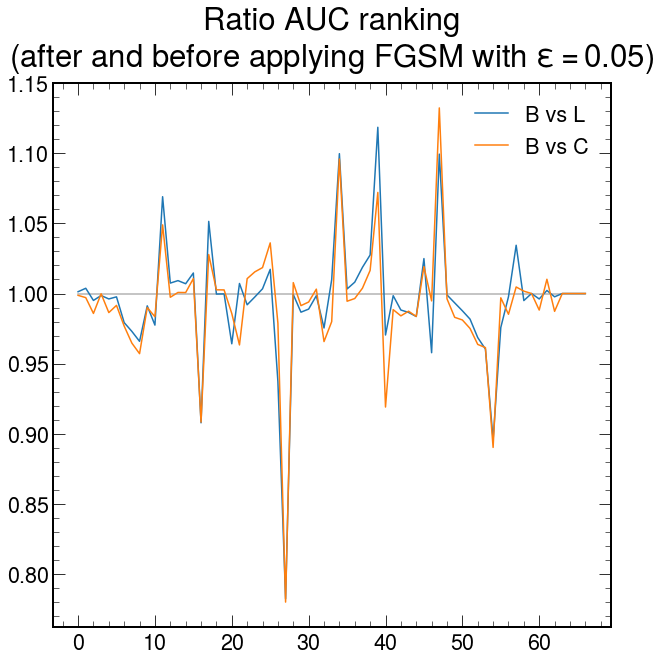

In [123]:
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.plot(df_fgsm['auc_bvl']/df_raw['auc_bvl'], label='B vs L')
plt.plot(df_fgsm['auc_bvc']/df_raw['auc_bvc'], label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying FGSM with $\epsilon=0.05$)', y=1.02)
plt.legend()
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_prototype_NFiles_{NUM_DATASETS}_MODE_fgsm_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

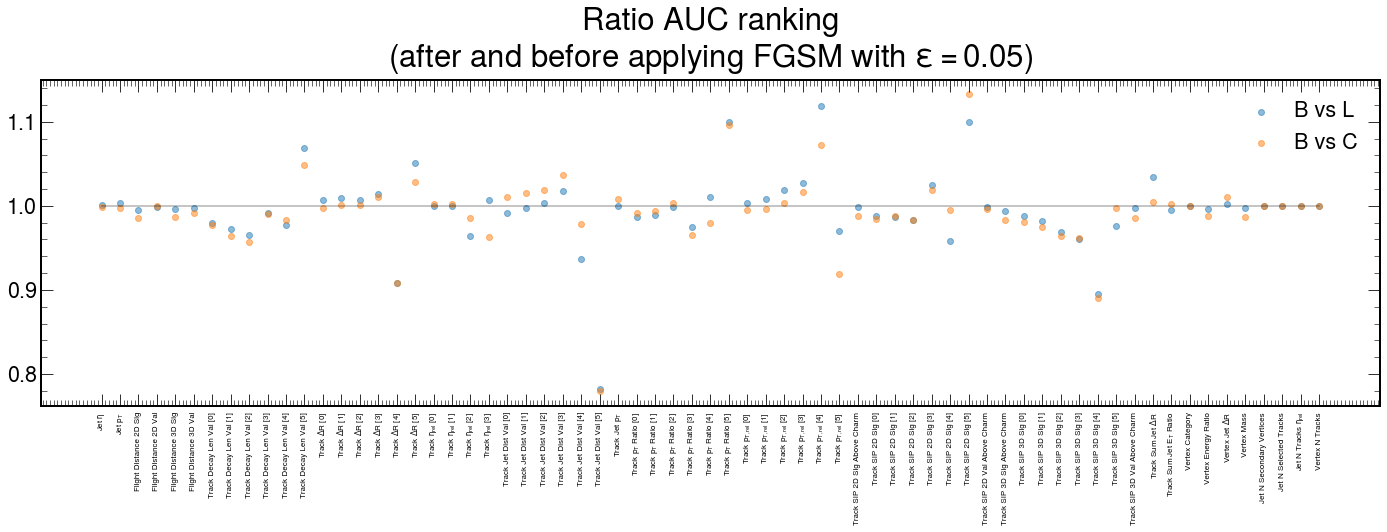

In [124]:
fig, ax = plt.subplots(figsize=(24, 6))
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.scatter(x=df_noise['input_name'],y=df_fgsm['auc_bvl']/df_raw['auc_bvl'], alpha=0.5,label='B vs L')
plt.scatter(x=df_noise['input_name'],y=df_fgsm['auc_bvc']/df_raw['auc_bvc'], alpha=0.5,label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying FGSM with $\epsilon=0.05$)', y=1.02)
ticksX = np.arange(67)
#ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(display_names, rotation=90, fontsize=8)
#ax.xaxis.set_ticks_position('none') 
plt.legend()
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_MODE_fgsm_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

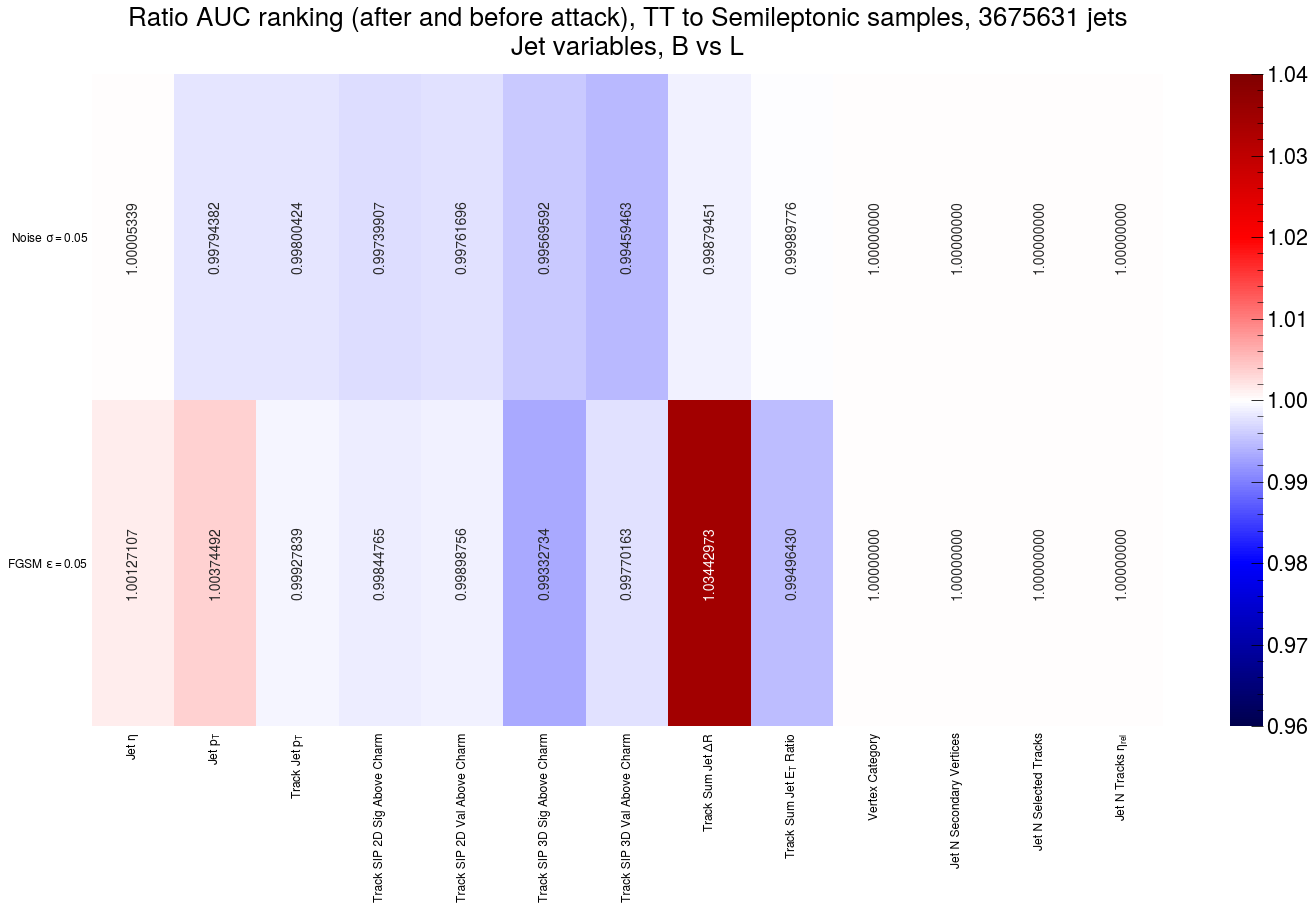

In [67]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvl[jetINDEX], fgsm_raw_005_bvl[jetINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(jetINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[jetINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nJet variables, B vs L', size=26, y=1.02)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_JET_BvL.svg', bbox_inches='tight', facecolor='w', transparent=False)

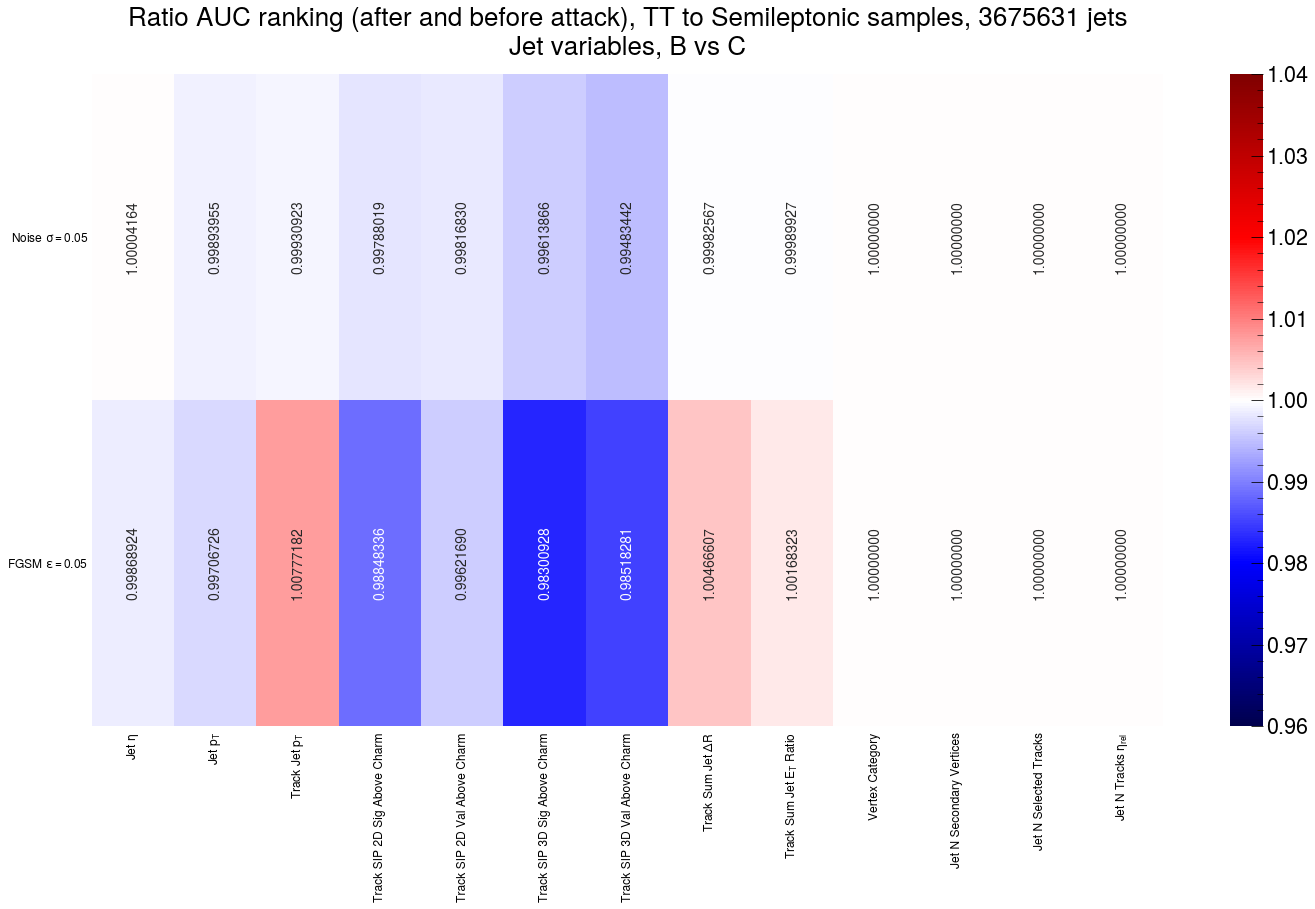

In [68]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvc[jetINDEX], fgsm_raw_005_bvc[jetINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(jetINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[jetINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nJet variables, B vs C', size=26, y=1.02)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_JET_BvC.svg', bbox_inches='tight', facecolor='w', transparent=False)

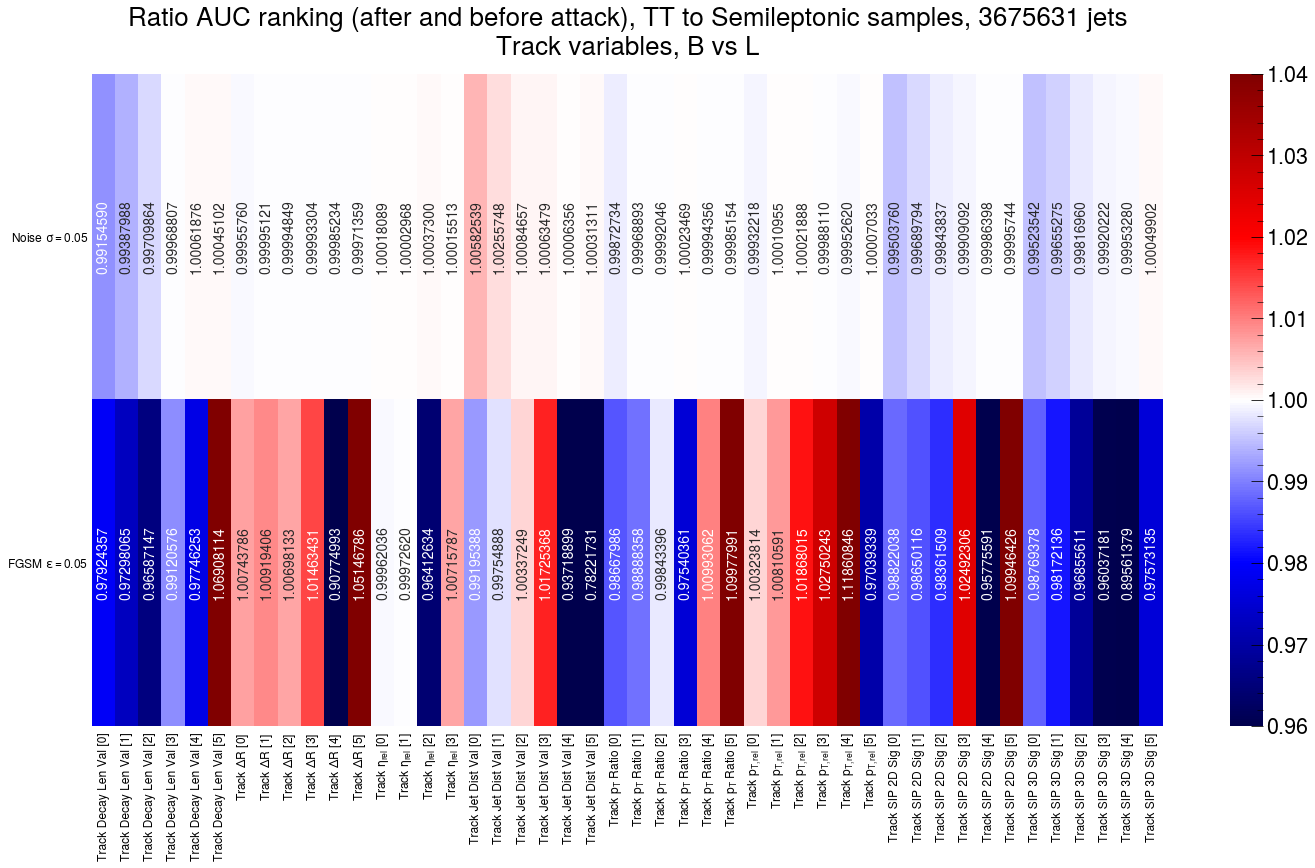

In [69]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvl[trackINDEX], fgsm_raw_005_bvl[trackINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(trackINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[trackINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nTrack variables, B vs L', size=26, y=1.02)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_TRACK_BvL.svg', bbox_inches='tight', facecolor='w', transparent=False)

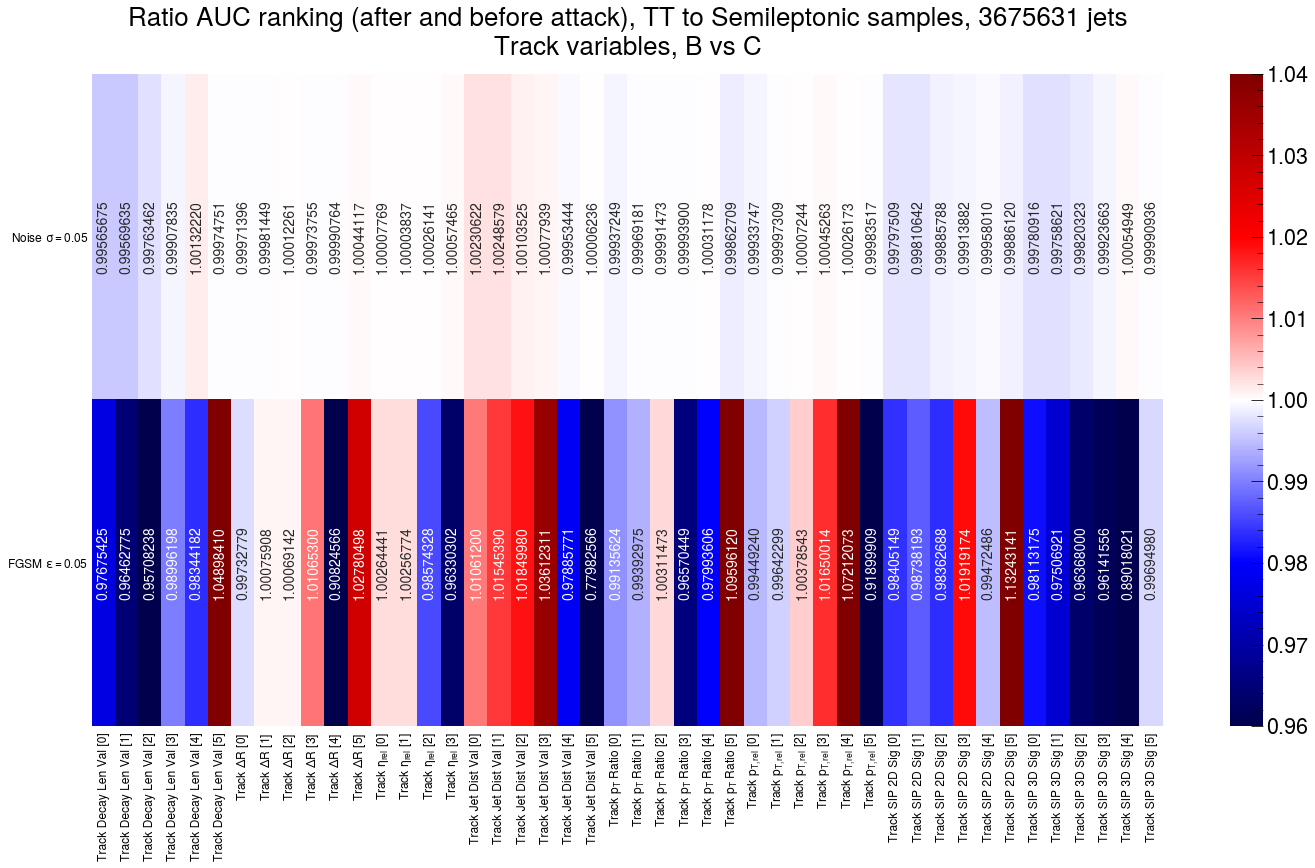

In [70]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvc[trackINDEX], fgsm_raw_005_bvc[trackINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(trackINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[trackINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nTrack variables, B vs C', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_TRACK_BvC.svg', bbox_inches='tight', facecolor='w', transparent=False)

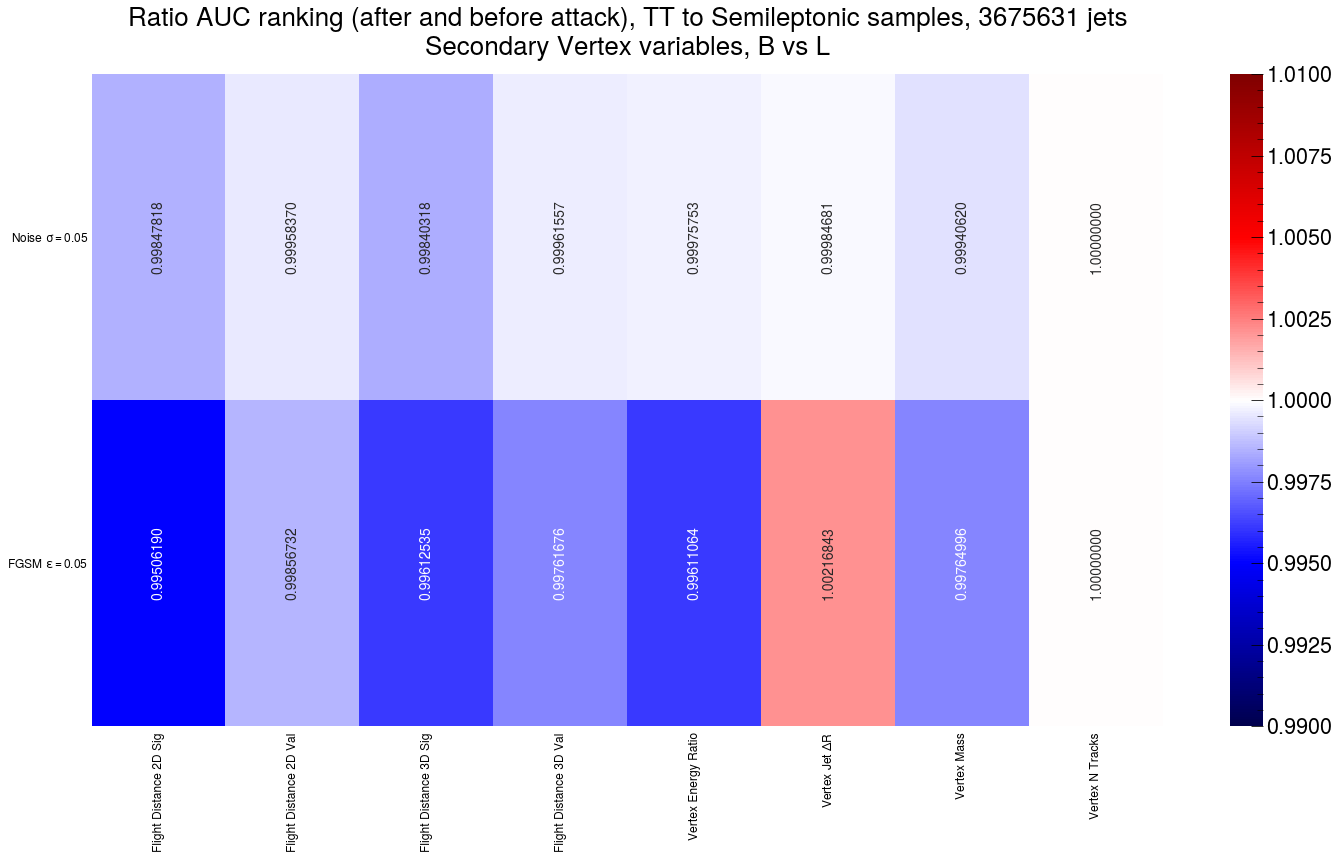

In [71]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvl[svINDEX], fgsm_raw_005_bvl[svINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.99, vmax=1.01,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(svINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[svINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nSecondary Vertex variables, B vs L', size=26, y=1.02)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_SV_BvL.svg', bbox_inches='tight', facecolor='w', transparent=False)

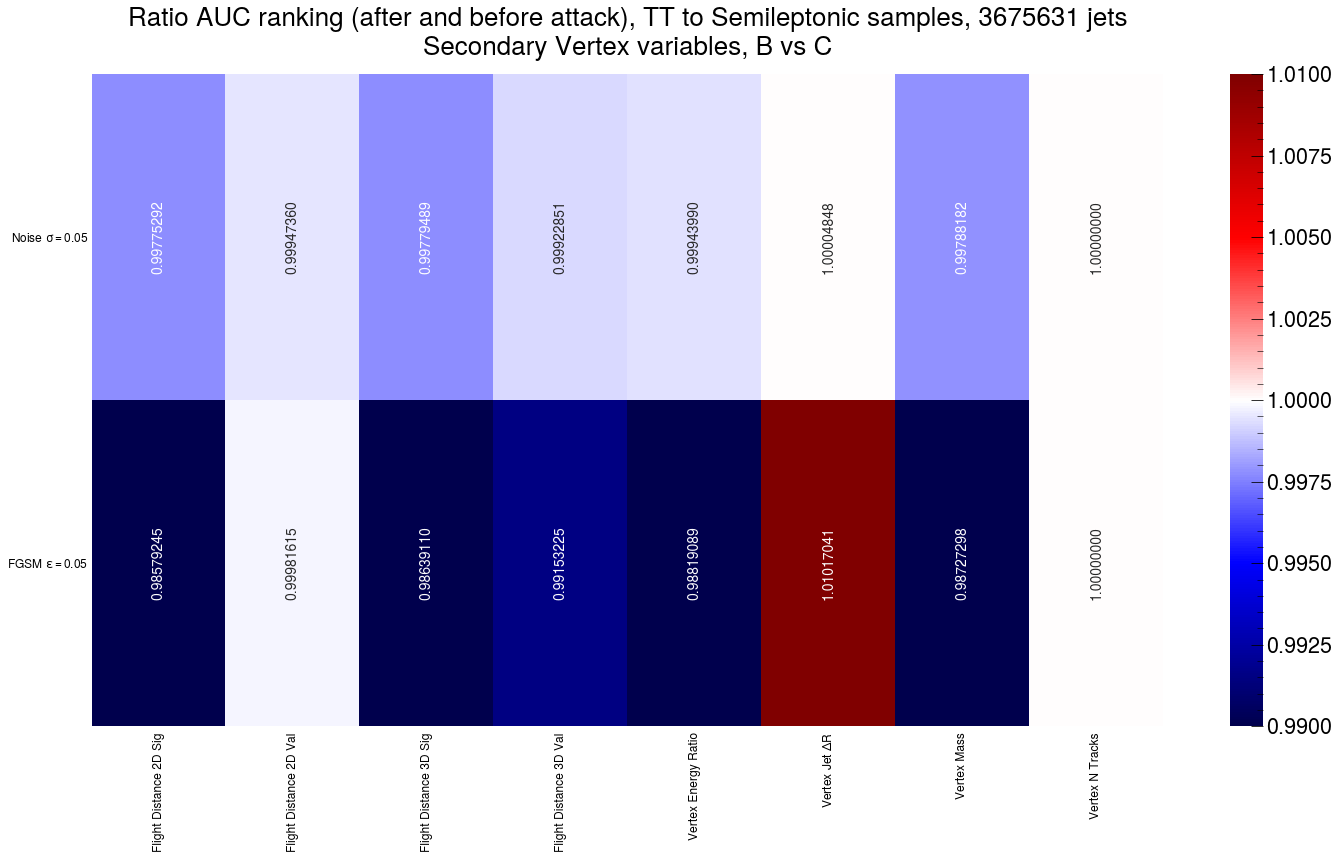

In [72]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvc[svINDEX], fgsm_raw_005_bvc[svINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.99, vmax=1.01,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(svINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[svINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nSecondary Vertex variables, B vs C', size=26, y=1.02)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_SV_BvC.svg', bbox_inches='tight', facecolor='w', transparent=False)